In [4]:
"""
20210225 mail roberto garcia
Te paso una muestra de datos que cumple los requisitos que nos comentabas. 
En el Excel aparecen los datos de la cuenta y los movimientos. 
Te he intentado mandar el dato lo más bruto posible para que tengas mayor margen para jugar con ellos.
En un escenario más real los datos que te pueden llegar del banco son los movimientos (importe, fecha y categoría)
y el saldo actual de la cuenta. 
Así que he intentado enviarte esos datos y alguno referente a la categoría que te pueda ayudar.
"""

'\n20210225 mail roberto garcia\nTe paso una muestra de datos que cumple los requisitos que nos comentabas. \nEn el Excel aparecen los datos de la cuenta y los movimientos. \nTe he intentado mandar el dato lo más bruto posible para que tengas mayor margen para jugar con ellos.\nEn un escenario más real los datos que te pueden llegar del banco son los movimientos (importe, fecha y categoría)\ny el saldo actual de la cuenta. \nAsí que he intentado enviarte esos datos y alguno referente a la categoría que te pueda ayudar.\n'

In [5]:
# Load data using read_excel
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame, to_datetime
import datetime
from matplotlib import pyplot
dataset_df = read_excel('Cuenta_124075.xlsx', sheet_name='_select_TRANSACTION_DATE_cast_a')

In [6]:
dataset_df

TRANSACTION_DATE  AMOUNT  CATEGORY_ID                     CATEGORY_NAME  \
0          2021-02-09 -120.00        115.0             category.deportes_115   
1          2021-02-09  -21.00        330.0                category.cuota_330   
2          2021-02-09  -35.00        330.0                category.cuota_330   
3          2021-02-09  -61.80        330.0                category.cuota_330   
4          2021-02-08 -300.00        461.0  category.movimiento_efectivo_461   
...               ...     ...          ...                               ...   
5341       2014-03-03 -123.00        330.0                category.cuota_330   
5342       2014-03-03 -123.00        330.0                category.cuota_330   
5343       2014-03-03 -137.04        330.0                category.cuota_330   
5344       2014-03-03  -73.80        330.0                category.cuota_330   
5345       2014-03-03 -179.66        211.0           category.ordinarios_211   

      CATEGORY_IS_FINANCIAL  CATEGORY_IS_TRANSFER  Unnamed: 6        ID  \
0                     False                 False         NaN  124075.0   
1                     False                 False         NaN       NaN   
2                     False                 False         NaN       NaN   
3                     False                 False         NaN       NaN   
4                      True                 False         NaN       NaN   
...                     ...                   ...         ...       ...   
5341                  False                 False         NaN       NaN   
5342                  False                 False         NaN       NaN   
5343                  False                 False         NaN       NaN   
5344                  False                 False         NaN       NaN   
5345                  False                 False         NaN       NaN   

      BALANCE BALANCE_DATE  
0      650.59   2021-02-09  
1         NaN          NaT  
2         NaN          NaT  
3         NaN          NaT  
4         NaN          NaT  
...       ...          ...  
5341      NaN          NaT  
5342      NaN          NaT  
5343      NaN          NaT  
5344      NaN          NaT  
5345      NaN          NaT  

[5346 rows x 10 columns]

In [7]:
type(dataset_df)

pandas.core.frame.DataFrame

In [8]:
dataset_df = dataset_df.iloc[:,0:2]

In [9]:
dataset_df

TRANSACTION_DATE  AMOUNT
0          2021-02-09 -120.00
1          2021-02-09  -21.00
2          2021-02-09  -35.00
3          2021-02-09  -61.80
4          2021-02-08 -300.00
...               ...     ...
5341       2014-03-03 -123.00
5342       2014-03-03 -123.00
5343       2014-03-03 -137.04
5344       2014-03-03  -73.80
5345       2014-03-03 -179.66

[5346 rows x 2 columns]

In [10]:
dataset_df=dataset_df.groupby(dataset_df.TRANSACTION_DATE).sum()

In [11]:
dataset_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-07          -40.00
2014-03-11        -1368.75
...                    ...
2021-02-03         -119.00
2021-02-04         -565.11
2021-02-05         -450.86
2021-02-08         -306.00
2021-02-09         -237.80

[1452 rows x 1 columns]

In [12]:
dataset_df.reset_index(level=0, inplace=True)

In [13]:
dataset_df

TRANSACTION_DATE    AMOUNT
0          2014-03-03  32297.41
1          2014-03-04    -70.00
2          2014-03-05    -21.00
3          2014-03-07    -40.00
4          2014-03-11  -1368.75
...               ...       ...
1447       2021-02-03   -119.00
1448       2021-02-04   -565.11
1449       2021-02-05   -450.86
1450       2021-02-08   -306.00
1451       2021-02-09   -237.80

[1452 rows x 2 columns]

In [14]:
dataset_df.TRANSACTION_DATE.min(), dataset_df.TRANSACTION_DATE.max()

(Timestamp('2014-03-03 00:00:00'), Timestamp('2021-02-09 00:00:00'))

In [602]:
range_of_dates = date_range(start=dataset_df.TRANSACTION_DATE.min(), end=dataset_df.TRANSACTION_DATE.max())

In [603]:
range_of_dates

DatetimeIndex(['2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-08', '2014-03-09', '2014-03-10',
               '2014-03-11', '2014-03-12',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=2536, freq='D')

In [604]:
dataset_df = dataset_df.set_index('TRANSACTION_DATE').reindex(range_of_dates).fillna(0.0).rename_axis('TRANSACTION_DATE').reset_index()

In [605]:
dataset_df

TRANSACTION_DATE    AMOUNT
0          2014-03-03  32297.41
1          2014-03-04    -70.00
2          2014-03-05    -21.00
3          2014-03-06      0.00
4          2014-03-07    -40.00
...               ...       ...
2531       2021-02-05   -450.86
2532       2021-02-06      0.00
2533       2021-02-07      0.00
2534       2021-02-08   -306.00
2535       2021-02-09   -237.80

[2536 rows x 2 columns]

In [606]:
dataset_df.AMOUNT.min(), dataset_df.AMOUNT.max()

(-170535.54, 221251.09)

In [607]:
dataset_df=dataset_df.set_index(dataset_df.iloc[:,0])

In [608]:
dataset_df

TRANSACTION_DATE    AMOUNT
TRANSACTION_DATE                           
2014-03-03             2014-03-03  32297.41
2014-03-04             2014-03-04    -70.00
2014-03-05             2014-03-05    -21.00
2014-03-06             2014-03-06      0.00
2014-03-07             2014-03-07    -40.00
...                           ...       ...
2021-02-05             2021-02-05   -450.86
2021-02-06             2021-02-06      0.00
2021-02-07             2021-02-07      0.00
2021-02-08             2021-02-08   -306.00
2021-02-09             2021-02-09   -237.80

[2536 rows x 2 columns]

In [609]:
dataset_df=dataset_df.drop(['TRANSACTION_DATE'], axis = 1)

In [610]:
dataset_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-06            0.00
2014-03-07          -40.00
...                    ...
2021-02-05         -450.86
2021-02-06            0.00
2021-02-07            0.00
2021-02-08         -306.00
2021-02-09         -237.80

[2536 rows x 1 columns]

In [611]:
# del(dataframe)
# del(dataset)

In [612]:
# ESTUDIO ESTADISTICO DE LA DISTRIBUCION DATASET SOBRETODO PARA QUITAR OUTLIERS

In [613]:
# Lesson 02: Load Time Series Data

In [614]:
# How to Load and Explore Time Series Data in Python
# https://machinelearningmastery.com/load-explore-time-series-data-python/

In [615]:
# Load Time Series Data

In [616]:
type(dataset_df)

pandas.core.frame.DataFrame

In [617]:
dataset_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-06            0.00
2014-03-07          -40.00
...                    ...
2021-02-05         -450.86
2021-02-06            0.00
2021-02-07            0.00
2021-02-08         -306.00
2021-02-09         -237.80

[2536 rows x 1 columns]

In [618]:
# dataset_ser = dataset_df.T.squeeze()
# dataset_df = DataFrame(dataset_ser)

In [619]:
dataset_df.T

TRANSACTION_DATE  2014-03-03  2014-03-04  2014-03-05  2014-03-06  2014-03-07  \
AMOUNT              32297.41       -70.0       -21.0         0.0       -40.0   

TRANSACTION_DATE  2014-03-08  2014-03-09  2014-03-10  2014-03-11  2014-03-12  \
AMOUNT                   0.0         0.0         0.0    -1368.75     -321.87   

TRANSACTION_DATE  ...  2021-01-31  2021-02-01  2021-02-02  2021-02-03  \
AMOUNT            ...         0.0     1110.89     -509.17      -119.0   

TRANSACTION_DATE  2021-02-04  2021-02-05  2021-02-06  2021-02-07  2021-02-08  \
AMOUNT               -565.11     -450.86         0.0         0.0      -306.0   

TRANSACTION_DATE  2021-02-09  
AMOUNT                -237.8  

[1 rows x 2536 columns]

In [620]:
dataset_ser = dataset_df.T.squeeze()

In [621]:
dataset_ser

TRANSACTION_DATE
2014-03-03    32297.41
2014-03-04      -70.00
2014-03-05      -21.00
2014-03-06        0.00
2014-03-07      -40.00
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 2536, dtype: float64

In [622]:
type(dataset_ser)

pandas.core.series.Series

In [623]:
dataset_ser.head()

TRANSACTION_DATE
2014-03-03    32297.41
2014-03-04      -70.00
2014-03-05      -21.00
2014-03-06        0.00
2014-03-07      -40.00
Name: AMOUNT, dtype: float64

In [624]:
dataset_ser.head(10)

TRANSACTION_DATE
2014-03-03    32297.41
2014-03-04      -70.00
2014-03-05      -21.00
2014-03-06        0.00
2014-03-07      -40.00
2014-03-08        0.00
2014-03-09        0.00
2014-03-10        0.00
2014-03-11    -1368.75
2014-03-12     -321.87
Name: AMOUNT, dtype: float64

In [625]:
dataset_df = DataFrame(dataset_ser)

In [626]:
dataset_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-06            0.00
2014-03-07          -40.00
...                    ...
2021-02-05         -450.86
2021-02-06            0.00
2021-02-07            0.00
2021-02-08         -306.00
2021-02-09         -237.80

[2536 rows x 1 columns]

In [627]:
# Exploring Time Series Data

In [628]:
# Peek at the Data

In [629]:
dataset_ser.head(10)

TRANSACTION_DATE
2014-03-03    32297.41
2014-03-04      -70.00
2014-03-05      -21.00
2014-03-06        0.00
2014-03-07      -40.00
2014-03-08        0.00
2014-03-09        0.00
2014-03-10        0.00
2014-03-11    -1368.75
2014-03-12     -321.87
Name: AMOUNT, dtype: float64

In [630]:
# Number of Observations

In [631]:
dataset_ser.size

2536

In [632]:
# Querying By Time

In [633]:
dataset_ser['2014-04']

TRANSACTION_DATE
2014-04-01   -2167.99
2014-04-02     -24.00
2014-04-03    1587.50
2014-04-04     -40.00
2014-04-05       0.00
2014-04-06       0.00
2014-04-07    -273.53
2014-04-08       0.00
2014-04-09       0.00
2014-04-10    -216.00
2014-04-11   -2373.39
2014-04-12       0.00
2014-04-13       0.00
2014-04-14   -3601.96
2014-04-15       0.00
2014-04-16    -882.62
2014-04-17       0.00
2014-04-18       0.00
2014-04-19       0.00
2014-04-20       0.00
2014-04-21    -500.00
2014-04-22       0.00
2014-04-23     672.00
2014-04-24    4356.14
2014-04-25       0.00
2014-04-26       0.00
2014-04-27       0.00
2014-04-28   -3000.00
2014-04-29       0.00
2014-04-30       0.00
Name: AMOUNT, dtype: float64

In [634]:
# Descriptive Statistics

In [635]:
dataset_ser.describe()

count      2536.000000
mean         -9.495524
std        7789.229290
min     -170535.540000
25%        -307.125000
50%           0.000000
75%           0.000000
max      221251.090000
Name: AMOUNT, dtype: float64

In [636]:
# Plotting Time Series

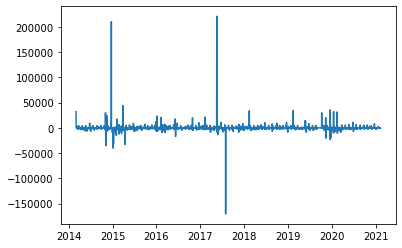

In [637]:
from matplotlib import pyplot
pyplot.plot(dataset_ser)
pyplot.show()

In [638]:
# Lesson 03: Data Visualization

In [639]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [640]:
# Time Series Visualization

In [641]:
# Minimum Daily Temperatures Dataset

In [642]:
dataset_ser

TRANSACTION_DATE
2014-03-03    32297.41
2014-03-04      -70.00
2014-03-05      -21.00
2014-03-06        0.00
2014-03-07      -40.00
                ...   
2021-02-05     -450.86
2021-02-06        0.00
2021-02-07        0.00
2021-02-08     -306.00
2021-02-09     -237.80
Name: AMOUNT, Length: 2536, dtype: float64

In [643]:
# 1. Time Series Line Plot

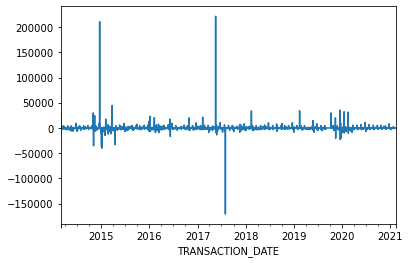

In [644]:
from matplotlib import pyplot
dataset_ser.plot()
pyplot.show()

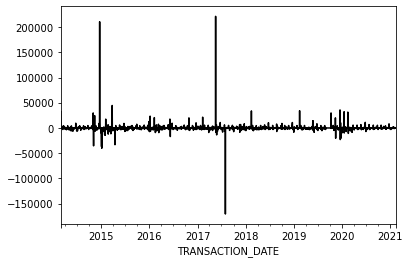

In [645]:
dataset_ser.plot(style='k')
pyplot.show()

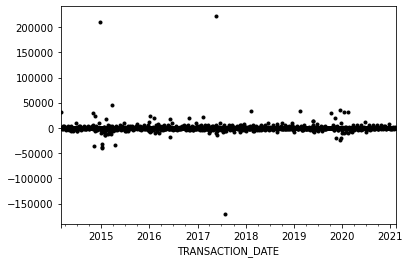

In [646]:
dataset_ser.plot(style='k.')
pyplot.show()

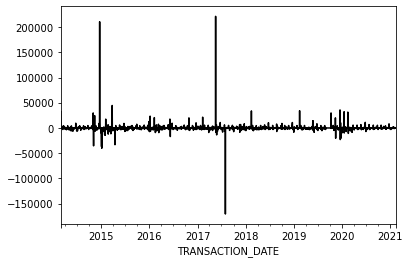

In [647]:
dataset_ser.plot(style='k-')
pyplot.show()

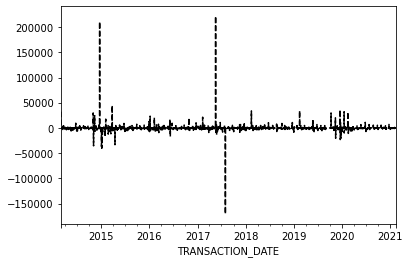

In [648]:
dataset_ser.plot(style='k--')
pyplot.show()

In [649]:
# para hacer subplots por años completos lo hare cuando tenga años completos, es decir cuando haya quitado 2015 y 2021

In [650]:
# del(dataset_ser_2015_2020_ser)

In [651]:
dataset_2015_2020_ser = dataset_ser.truncate('2015-01-01', '2020-12-31', copy = False)

In [652]:
dataset_2015_2020_ser

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
                ...   
2020-12-27        0.00
2020-12-28     -300.00
2020-12-29      -54.08
2020-12-30      -52.76
2020-12-31    -2763.56
Name: AMOUNT, Length: 2192, dtype: float64

In [653]:
dataset_2015_2020_ser.min(), dataset_2015_2020_ser.max()

(-170535.54, 221251.09)

In [654]:
dataset_2015_2020_ser.size

2192

In [655]:
# 365 * 6 = 2190 pero tengo 2192 observaciones ya que 2016 y 2020 fueron años bisiestos y tengo datos el 29 de febrero

In [656]:
dataset_2015_2020_ser['2016-02']

TRANSACTION_DATE
2016-02-01    -3956.68
2016-02-02    -3000.00
2016-02-03        0.00
2016-02-04      -77.00
2016-02-05        0.00
2016-02-06        0.00
2016-02-07        0.00
2016-02-08        0.00
2016-02-09    20517.70
2016-02-10        0.00
2016-02-11    -1355.46
2016-02-12        0.00
2016-02-13        0.00
2016-02-14        0.00
2016-02-15     -796.11
2016-02-16     -662.65
2016-02-17    -9103.04
2016-02-18      -71.68
2016-02-19     1250.00
2016-02-20        0.00
2016-02-21        0.00
2016-02-22     -221.50
2016-02-23      787.50
2016-02-24     6152.71
2016-02-25        0.00
2016-02-26    -5500.00
2016-02-27        0.00
2016-02-28        0.00
2016-02-29     -839.82
Name: AMOUNT, dtype: float64

In [657]:
dataset_2015_2020_ser['2020-02']

TRANSACTION_DATE
2020-02-01        0.00
2020-02-02        0.00
2020-02-03     1038.38
2020-02-04     -472.00
2020-02-05     -119.00
2020-02-06        0.00
2020-02-07     -740.41
2020-02-08        0.00
2020-02-09        0.00
2020-02-10     -384.64
2020-02-11        0.00
2020-02-12     -919.32
2020-02-13    31462.40
2020-02-14      361.79
2020-02-15        0.00
2020-02-16        0.00
2020-02-17   -10785.10
2020-02-18        0.00
2020-02-19        0.00
2020-02-20        0.00
2020-02-21        0.00
2020-02-22        0.00
2020-02-23        0.00
2020-02-24     1475.11
2020-02-25        0.00
2020-02-26       -3.65
2020-02-27        0.00
2020-02-28     -642.77
2020-02-29        0.00
Name: AMOUNT, dtype: float64

In [658]:
# la transaccion del dia 2016-02-29 la asigno al 2016-02-28 y borro 2016-02-29
# la transaccion del dia 2020-02-29 la borro

In [659]:
dataset_2015_2020_ser['2016-02-28']=dataset_2015_2020_ser['2016-02-29']

In [660]:
dataset_2015_2020_ser['2016-02']

TRANSACTION_DATE
2016-02-01    -3956.68
2016-02-02    -3000.00
2016-02-03        0.00
2016-02-04      -77.00
2016-02-05        0.00
2016-02-06        0.00
2016-02-07        0.00
2016-02-08        0.00
2016-02-09    20517.70
2016-02-10        0.00
2016-02-11    -1355.46
2016-02-12        0.00
2016-02-13        0.00
2016-02-14        0.00
2016-02-15     -796.11
2016-02-16     -662.65
2016-02-17    -9103.04
2016-02-18      -71.68
2016-02-19     1250.00
2016-02-20        0.00
2016-02-21        0.00
2016-02-22     -221.50
2016-02-23      787.50
2016-02-24     6152.71
2016-02-25        0.00
2016-02-26    -5500.00
2016-02-27        0.00
2016-02-28     -839.82
2016-02-29     -839.82
Name: AMOUNT, dtype: float64

In [661]:
dataset_2015_2020_df = DataFrame(dataset_2015_2020_ser)

In [662]:
#del(dataset_ser_2015_2020_df)

In [663]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE          
2015-01-01            0.00
2015-01-02        -4981.47
2015-01-03            0.00
2015-01-04            0.00
2015-01-05       -36900.83
...                    ...
2020-12-27            0.00
2020-12-28         -300.00
2020-12-29          -54.08
2020-12-30          -52.76
2020-12-31        -2763.56

[2192 rows x 1 columns]

In [664]:
dataset_2015_2020_df=dataset_2015_2020_df.reset_index()

In [665]:
dataset_2015_2020_df

TRANSACTION_DATE    AMOUNT
0          2015-01-01      0.00
1          2015-01-02  -4981.47
2          2015-01-03      0.00
3          2015-01-04      0.00
4          2015-01-05 -36900.83
...               ...       ...
2187       2020-12-27      0.00
2188       2020-12-28   -300.00
2189       2020-12-29    -54.08
2190       2020-12-30    -52.76
2191       2020-12-31  -2763.56

[2192 rows x 2 columns]

In [666]:
dataset_2015_2020_df[dataset_2015_2020_df['TRANSACTION_DATE']=='2016-02-29'].index.values

array([424], dtype=int64)

In [667]:
dataset_2015_2020_df=dataset_2015_2020_df.drop(index=424)

In [668]:
dataset_2015_2020_df[dataset_2015_2020_df['TRANSACTION_DATE']=='2020-02-29'].index.values

array([1885], dtype=int64)

In [669]:
dataset_2015_2020_df=dataset_2015_2020_df.drop(index=1885)

In [670]:
dataset_2015_2020_df

TRANSACTION_DATE    AMOUNT
0          2015-01-01      0.00
1          2015-01-02  -4981.47
2          2015-01-03      0.00
3          2015-01-04      0.00
4          2015-01-05 -36900.83
...               ...       ...
2187       2020-12-27      0.00
2188       2020-12-28   -300.00
2189       2020-12-29    -54.08
2190       2020-12-30    -52.76
2191       2020-12-31  -2763.56

[2190 rows x 2 columns]

In [671]:
dataset_2015_2020_df=dataset_2015_2020_df.set_index(dataset_2015_2020_df.iloc[:,0])

In [672]:
dataset_2015_2020_df

TRANSACTION_DATE    AMOUNT
TRANSACTION_DATE                           
2015-01-01             2015-01-01      0.00
2015-01-02             2015-01-02  -4981.47
2015-01-03             2015-01-03      0.00
2015-01-04             2015-01-04      0.00
2015-01-05             2015-01-05 -36900.83
...                           ...       ...
2020-12-27             2020-12-27      0.00
2020-12-28             2020-12-28   -300.00
2020-12-29             2020-12-29    -54.08
2020-12-30             2020-12-30    -52.76
2020-12-31             2020-12-31  -2763.56

[2190 rows x 2 columns]

In [673]:
dataset_2015_2020_df=dataset_2015_2020_df.drop(['TRANSACTION_DATE'], axis = 1)

In [674]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE          
2015-01-01            0.00
2015-01-02        -4981.47
2015-01-03            0.00
2015-01-04            0.00
2015-01-05       -36900.83
...                    ...
2020-12-27            0.00
2020-12-28         -300.00
2020-12-29          -54.08
2020-12-30          -52.76
2020-12-31        -2763.56

[2190 rows x 1 columns]

In [675]:
dataset_2015_2020_df.loc['2016-02'], dataset_2015_2020_df.loc['2020-02']

(                    AMOUNT
 TRANSACTION_DATE          
 2016-02-01        -3956.68
 2016-02-02        -3000.00
 2016-02-03            0.00
 2016-02-04          -77.00
 2016-02-05            0.00
 2016-02-06            0.00
 2016-02-07            0.00
 2016-02-08            0.00
 2016-02-09        20517.70
 2016-02-10            0.00
 2016-02-11        -1355.46
 2016-02-12            0.00
 2016-02-13            0.00
 2016-02-14            0.00
 2016-02-15         -796.11
 2016-02-16         -662.65
 2016-02-17        -9103.04
 2016-02-18          -71.68
 2016-02-19         1250.00
 2016-02-20            0.00
 2016-02-21            0.00
 2016-02-22         -221.50
 2016-02-23          787.50
 2016-02-24         6152.71
 2016-02-25            0.00
 2016-02-26        -5500.00
 2016-02-27            0.00
 2016-02-28         -839.82,
                     AMOUNT
 TRANSACTION_DATE          
 2020-02-01            0.00
 2020-02-02            0.00
 2020-02-03         1038.38
 2020-02-04        

In [676]:
dataset_2015_2020_ser = dataset_2015_2020_df.T.squeeze()

In [677]:
dataset_2015_2020_ser

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
                ...   
2020-12-27        0.00
2020-12-28     -300.00
2020-12-29      -54.08
2020-12-30      -52.76
2020-12-31    -2763.56
Name: AMOUNT, Length: 2190, dtype: float64

In [678]:
# A CONTINUACION REPETIMOS EL ESTUDIO ESTADISTICO DEL CURSO CON ESTE DATASET MAS PREPARADO

In [679]:
# Lesson 02: Load Time Series Data

In [680]:
# How to Load and Explore Time Series Data in Python
# https://machinelearningmastery.com/load-explore-time-series-data-python/

In [681]:
# Daily Female Births Dataset

In [682]:
# Load Time Series Data

In [683]:
type(dataset_2015_2020_ser)

pandas.core.series.Series

In [684]:
print(type(dataset_2015_2020_ser))

<class 'pandas.core.series.Series'>


In [685]:
dataset_2015_2020_ser.head()

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
Name: AMOUNT, dtype: float64

In [686]:
dataset_2015_2020_df = DataFrame(dataset_2015_2020_ser)

In [687]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE          
2015-01-01            0.00
2015-01-02        -4981.47
2015-01-03            0.00
2015-01-04            0.00
2015-01-05       -36900.83
...                    ...
2020-12-27            0.00
2020-12-28         -300.00
2020-12-29          -54.08
2020-12-30          -52.76
2020-12-31        -2763.56

[2190 rows x 1 columns]

In [688]:
# Exploring Time Series Data

In [689]:
# Peek at the Data

In [690]:
dataset_2015_2020_ser.head(10)

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
2015-01-06        0.00
2015-01-07   -40199.43
2015-01-08        0.00
2015-01-09   -31290.39
2015-01-10        0.00
Name: AMOUNT, dtype: float64

In [691]:
dataset_2015_2020_ser.tail(10)

TRANSACTION_DATE
2020-12-22    -146.88
2020-12-23      92.00
2020-12-24     -99.52
2020-12-25       0.00
2020-12-26       0.00
2020-12-27       0.00
2020-12-28    -300.00
2020-12-29     -54.08
2020-12-30     -52.76
2020-12-31   -2763.56
Name: AMOUNT, dtype: float64

In [692]:
# Number of Observations

In [693]:
dataset_2015_2020_ser.size

2190

In [694]:
# Querying By Time

In [695]:
dataset_2015_2020_ser['2016-02'], dataset_2015_2020_ser['2020-02']

(TRANSACTION_DATE
 2016-02-01    -3956.68
 2016-02-02    -3000.00
 2016-02-03        0.00
 2016-02-04      -77.00
 2016-02-05        0.00
 2016-02-06        0.00
 2016-02-07        0.00
 2016-02-08        0.00
 2016-02-09    20517.70
 2016-02-10        0.00
 2016-02-11    -1355.46
 2016-02-12        0.00
 2016-02-13        0.00
 2016-02-14        0.00
 2016-02-15     -796.11
 2016-02-16     -662.65
 2016-02-17    -9103.04
 2016-02-18      -71.68
 2016-02-19     1250.00
 2016-02-20        0.00
 2016-02-21        0.00
 2016-02-22     -221.50
 2016-02-23      787.50
 2016-02-24     6152.71
 2016-02-25        0.00
 2016-02-26    -5500.00
 2016-02-27        0.00
 2016-02-28     -839.82
 Name: AMOUNT, dtype: float64,
 TRANSACTION_DATE
 2020-02-01        0.00
 2020-02-02        0.00
 2020-02-03     1038.38
 2020-02-04     -472.00
 2020-02-05     -119.00
 2020-02-06        0.00
 2020-02-07     -740.41
 2020-02-08        0.00
 2020-02-09        0.00
 2020-02-10     -384.64
 2020-02-11        0.

In [696]:
# Descriptive Statistics

In [697]:
dataset_2015_2020_ser.describe

<bound method NDFrame.describe of TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
                ...   
2020-12-27        0.00
2020-12-28     -300.00
2020-12-29      -54.08
2020-12-30      -52.76
2020-12-31    -2763.56
Name: AMOUNT, Length: 2190, dtype: float64>

In [698]:
dataset_2015_2020_ser.describe()

count      2190.000000
mean       -105.191420
std        6917.657232
min     -170535.540000
25%        -328.860000
50%           0.000000
75%           0.000000
max      221251.090000
Name: AMOUNT, dtype: float64

In [699]:
# Plotting Time Series

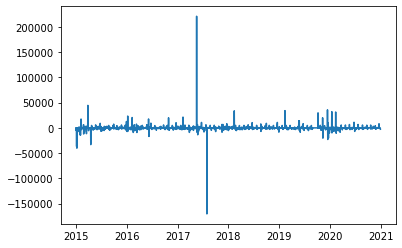

In [700]:
from pandas import read_csv
from matplotlib import pyplot
pyplot.plot(dataset_2015_2020_ser)
pyplot.show()

In [701]:
# Lesson 03: Data Visualization

In [702]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [703]:
# Minimum Daily Temperatures Dataset

In [704]:
dataset_2015_2020_ser.head(10)

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
2015-01-06        0.00
2015-01-07   -40199.43
2015-01-08        0.00
2015-01-09   -31290.39
2015-01-10        0.00
Name: AMOUNT, dtype: float64

In [705]:
dataset_2015_2020_ser

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
                ...   
2020-12-27        0.00
2020-12-28     -300.00
2020-12-29      -54.08
2020-12-30      -52.76
2020-12-31    -2763.56
Name: AMOUNT, Length: 2190, dtype: float64

In [706]:
# 1. Time Series Line Plot

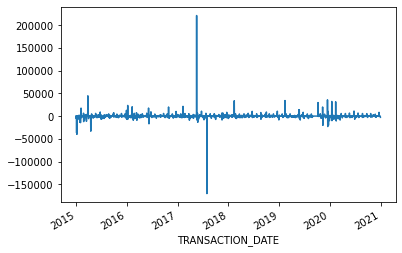

In [707]:
from matplotlib import pyplot
dataset_2015_2020_ser.plot()
pyplot.show()

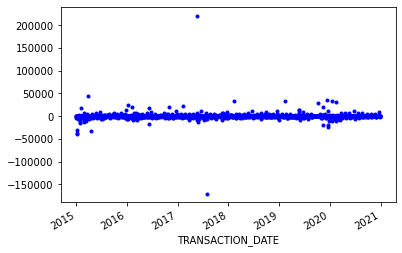

In [708]:
dataset_2015_2020_ser.plot(style='b.')
pyplot.show()

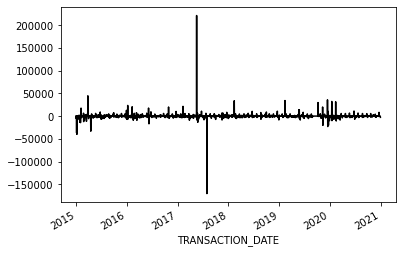

In [709]:
dataset_2015_2020_ser.plot(style='k-')
pyplot.show()

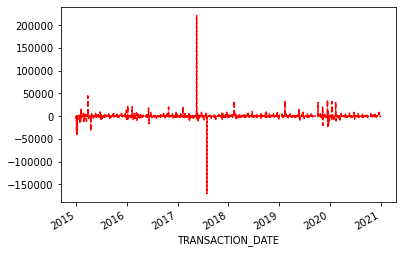

In [710]:
dataset_2015_2020_ser.plot(style='r--')
pyplot.show()

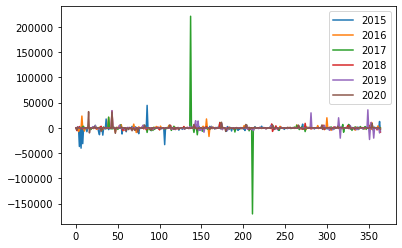

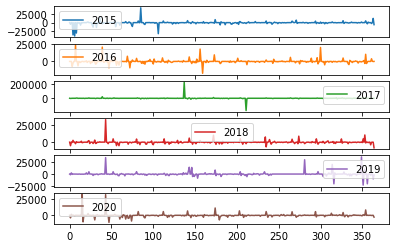

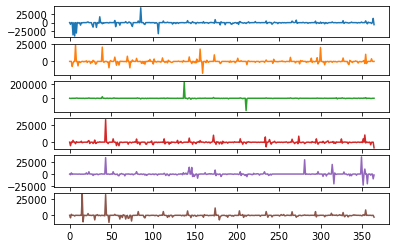

In [711]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = dataset_2015_2020_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=False, legend=True)
years.plot(subplots=True, legend=True)
years.plot(subplots=True, legend=False)
pyplot.show()

In [712]:
years

2015     2016     2017     2018      2019     2020
0        0.00     0.00     0.00     0.00      0.00     0.00
1    -4981.47     0.00 -2089.54 -5268.51  -1450.02 -3878.40
2        0.00     0.00  -468.30    72.95   2365.93  1513.50
3        0.00 -7234.23   -99.75  -471.23   -600.20     0.00
4   -36900.83 -2500.00     0.00  2753.27      0.00     0.00
..        ...      ...      ...      ...       ...      ...
360      0.00   -10.79 -2990.00 -3948.28  -2375.64     0.00
361  -2682.28  3781.73 -2729.00  -186.11      0.00  -300.00
362      0.00   200.00  -204.54     0.00      0.00   -54.08
363  12681.48  -143.80     0.00     0.00 -10023.91   -52.76
364  -6031.35     0.00     0.00 -8458.26  -1985.54 -2763.56

[365 rows x 6 columns]

In [713]:
years.columns

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64')

In [714]:
type(years)

pandas.core.frame.DataFrame

In [716]:
years.iloc[:,0]

0          0.00
1      -4981.47
2          0.00
3          0.00
4     -36900.83
         ...   
360        0.00
361    -2682.28
362        0.00
363    12681.48
364    -6031.35
Name: 2015, Length: 365, dtype: float64

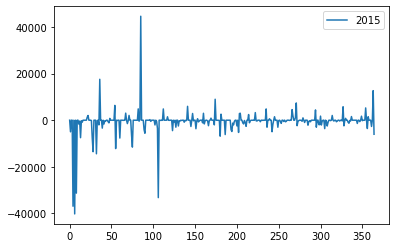

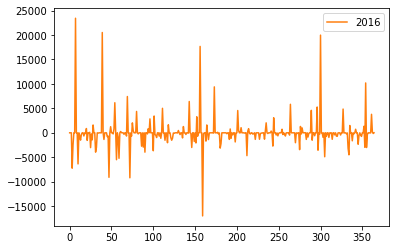

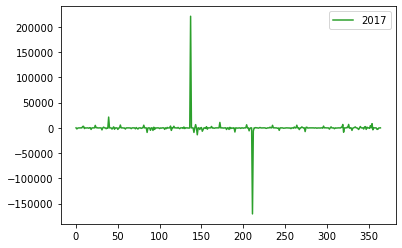

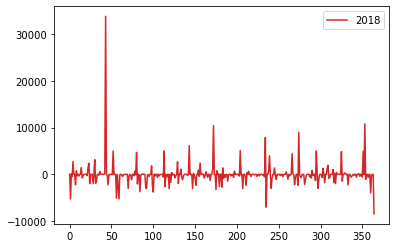

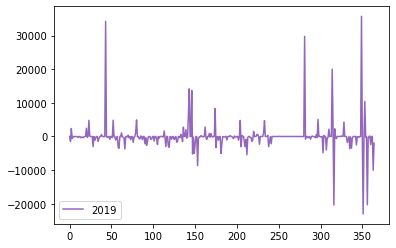

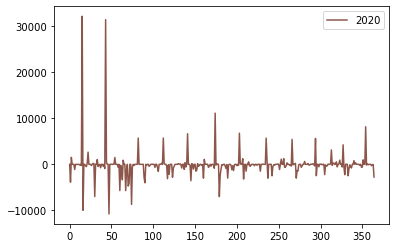

In [717]:
position = range(0,6)
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']

for i,j in zip(position,color):
    years.iloc[:,i].plot(style=j, legend=True)
    pyplot.show()

In [718]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE          
2015-01-01            0.00
2015-01-02        -4981.47
2015-01-03            0.00
2015-01-04            0.00
2015-01-05       -36900.83
...                    ...
2020-12-27            0.00
2020-12-28         -300.00
2020-12-29          -54.08
2020-12-30          -52.76
2020-12-31        -2763.56

[2190 rows x 1 columns]

In [719]:
"""
vamos a considerar outliers todas las transacciones mayores a +50000 eur y menores de -50000 eur que principalmente serán 2 en
2017 y luego volvemos a recomenzar el estudio estadistico.
"""

'\nvamos a considerar outliers todas las transacciones mayores a +50000 eur y menores de -50000 eur que principalmente serán 2 en\n2017 y luego volvemos a recomenzar el estudio estadistico.\n'

In [720]:
dataset_2015_2020_df.loc['2017']>=0

AMOUNT
TRANSACTION_DATE        
2017-01-01          True
2017-01-02         False
2017-01-03         False
2017-01-04         False
2017-01-05          True
...                  ...
2017-12-27         False
2017-12-28         False
2017-12-29         False
2017-12-30          True
2017-12-31          True

[365 rows x 1 columns]

In [721]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser>50000)

In [722]:
prueba_ser.dropna()

TRANSACTION_DATE
2017-05-18    221251.09
Name: AMOUNT, dtype: float64

In [723]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser<-50000)

In [724]:
prueba_ser.dropna()

TRANSACTION_DATE
2017-07-31   -170535.54
Name: AMOUNT, dtype: float64

In [725]:
dataset_2015_2020_ser['2017-05-18']=0

In [726]:
dataset_2015_2020_ser['2017-07-31']=0

In [727]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser>50000)

In [728]:
prueba_ser.dropna()

Series([], Name: AMOUNT, dtype: float64)

In [729]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser<-50000)

In [730]:
prueba_ser.dropna()

Series([], Name: AMOUNT, dtype: float64)

In [731]:
del(prueba_ser)

In [732]:
dataset_2015_2020_df = DataFrame(dataset_2015_2020_ser)

In [733]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [734]:
# Time Series Visualization

In [735]:
# Minimum Daily Temperatures Dataset

In [736]:
dataset_2015_2020_ser

TRANSACTION_DATE
2015-01-01        0.00
2015-01-02    -4981.47
2015-01-03        0.00
2015-01-04        0.00
2015-01-05   -36900.83
                ...   
2020-12-27        0.00
2020-12-28     -300.00
2020-12-29      -54.08
2020-12-30      -52.76
2020-12-31    -2763.56
Name: AMOUNT, Length: 2190, dtype: float64

In [737]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE          
2015-01-01            0.00
2015-01-02        -4981.47
2015-01-03            0.00
2015-01-04            0.00
2015-01-05       -36900.83
...                    ...
2020-12-27            0.00
2020-12-28         -300.00
2020-12-29          -54.08
2020-12-30          -52.76
2020-12-31        -2763.56

[2190 rows x 1 columns]

In [738]:
# 1. Time Series Line Plot

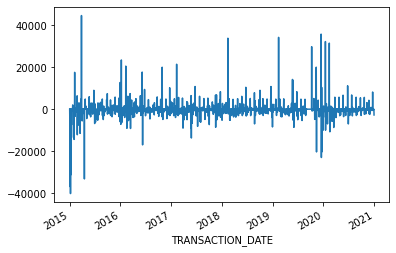

In [739]:
from matplotlib import pyplot
dataset_2015_2020_ser.plot()
pyplot.show()

In [740]:
"""
ahora vamos que tenemos los datos mucho mas agrupados con lo que obtendremos analisis mas fiables y la serie será más fácil de
modelar.
"""

'\nahora vamos que tenemos los datos mucho mas agrupados con lo que obtendremos analisis mas fiables y la serie será más fácil de\nmodelar.\n'

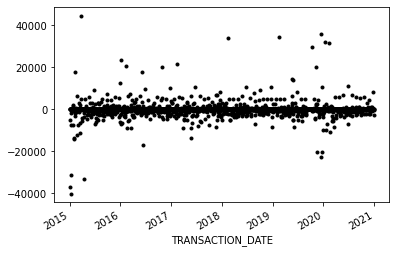

In [741]:
dataset_2015_2020_ser.plot(style='.', color='black')
pyplot.show()

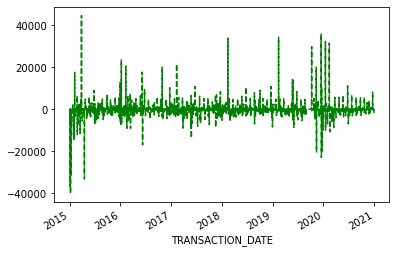

In [742]:
dataset_2015_2020_ser.plot(style='--', color='green')
pyplot.show()

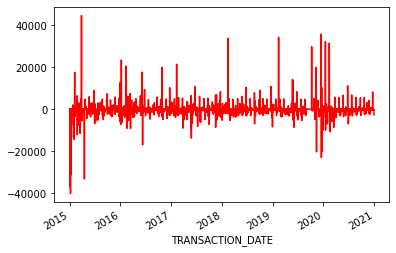

In [743]:
dataset_2015_2020_ser.plot(style='-', color='red')
pyplot.show()

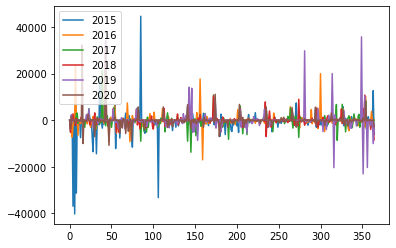

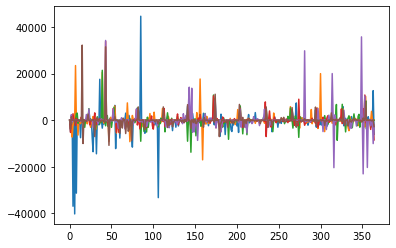

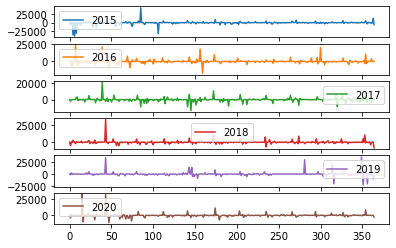

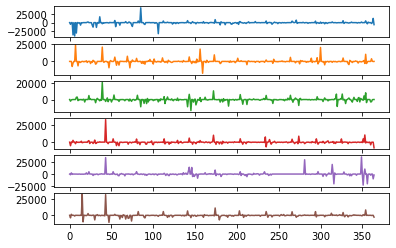

In [744]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = dataset_2015_2020_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=False, legend=True)
years.plot(subplots=False, legend=False)
years.plot(subplots=True, legend=True)
years.plot(subplots=True, legend=False)
pyplot.show()

In [745]:
"""
vemos ahora que los datos de los 5 años son más parecidos y la serie será entonces más facil de modelizar
"""

'\nvemos ahora que los datos de los 5 años son más parecidos y la serie será entonces más facil de modelizar\n'

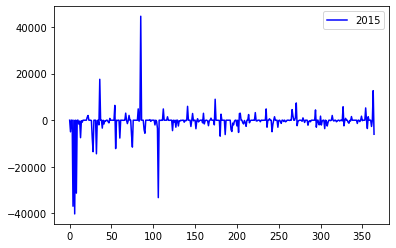

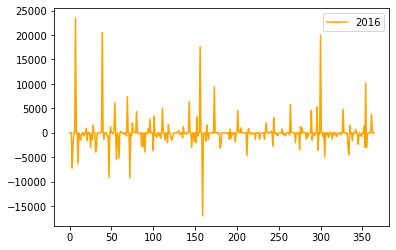

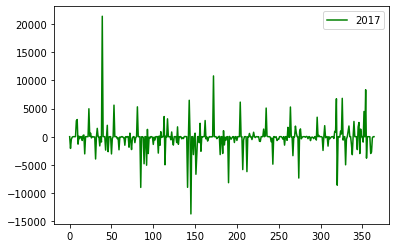

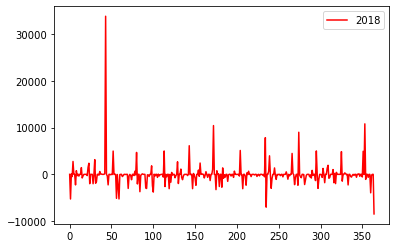

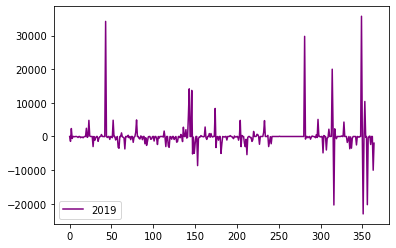

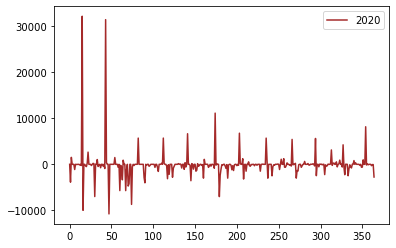

In [746]:
position = range(0,6)
color = ['blue','orange','green','red','purple','brown']

for i,j in zip(position,color):
    years.iloc[:,i].plot(color=j, legend=True)
    pyplot.show()

In [747]:
# 2. Time Series Histogram and Density Plots

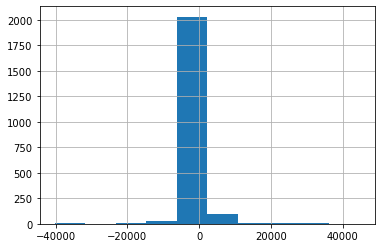

In [748]:
from matplotlib import pyplot
dataset_2015_2020_ser.hist()
pyplot.show()

In [749]:
"""
Este diagrama de barras nos muestra que la mayoria de las transacciones se encuentran en valores en el intervalo (-10000,10000)
"""

'\nEste diagrama de barras nos muestra que la mayoria de las transacciones se encuentran en valores en el intervalo (-10000,10000)\n'

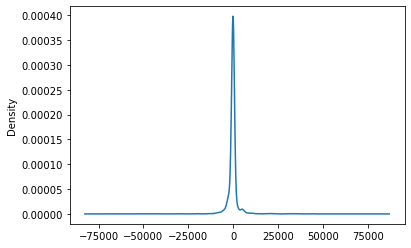

In [750]:
from matplotlib import pyplot
dataset_2015_2020_ser.plot(kind='kde')
pyplot.show()

In [751]:
"""
Vemos que nos sale un density plot tremendamente picudo lo que confirma nuestra hipotesis de que la mayoria de las
transacciones se encuentran en valores en el intervalo (-10000,10000).
Eso quiere decir que fuera del rango anteriormente mensionado tendremos muchos outliers.
"""

'\nVemos que nos sale un density plot tremendamente picudo lo que confirma nuestra hipotesis de que la mayoria de las\ntransacciones se encuentran en valores en el intervalo (-10000,10000).\nEso quiere decir que fuera del rango anteriormente mensionado tendremos muchos outliers.\n'

In [752]:
# 3. Time Series Box and Whisker Plots by Interval

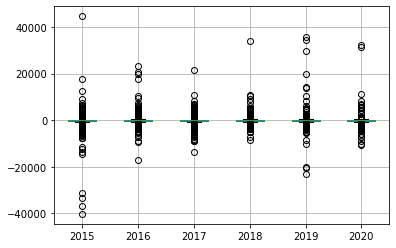

In [753]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = dataset_2015_2020_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

In [754]:
dataset_2015_2020_ser.describe()

count     2190.000000
mean      -128.349205
std       3492.869871
min     -40199.430000
25%       -327.732500
50%          0.000000
75%          0.000000
max      44595.050000
Name: AMOUNT, dtype: float64

In [755]:
"""
Tras haber ploteado los boxplots y sabiendo que en una distribucion normal el 99.7% de los datos estan en mean +/- 3*std
entonces si quitamos aquellas transacciones de valor mayor a mean + 3*std = -128.34 + 3*3492.86 = 10350.260408 y de valor menor
a mean - 3*std = -128.34 - 3*3492.86 = -10606.958818 tendremos, al final, una serie temporal mucho más facil de modelizar.
"""

'\nTras haber ploteado los boxplots y sabiendo que en una distribucion normal el 99.7% de los datos estan en mean +/- 3*std\nentonces si quitamos aquellas transacciones de valor mayor a mean + 3*std = -128.34 + 3*3492.86 = 10350.260408 y de valor menor\na mean - 3*std = -128.34 - 3*3492.86 = -10606.958818 tendremos, al final, una serie temporal mucho más facil de modelizar.\n'

In [756]:
"""
Por tanto, quitaremos del dataset todas aquellas transacciones de valor mayor a 10351 yu de valor menor a -10607.
Y luego volveremos a repetir el estudio estadistico.
"""

'\nPor tanto, quitaremos del dataset todas aquellas transacciones de valor mayor a 10351 yu de valor menor a -10607.\nY luego volveremos a repetir el estudio estadistico.\n'

In [757]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser>10350.260408)

In [758]:
prueba_ser.dropna()

TRANSACTION_DATE
2015-02-06    17549.00
2015-03-27    44595.05
2015-12-30    12681.48
2016-01-08    23434.00
2016-02-09    20517.70
2016-06-06    17669.58
2016-10-28    19979.31
2017-02-09    21402.63
2017-06-22    10797.91
2018-02-13    33796.22
2018-06-22    10425.59
2018-12-20    10793.22
2019-02-13    34208.74
2019-05-24    14162.00
2019-05-27    13701.49
2019-10-09    29768.00
2019-11-11    20000.00
2019-12-16    35741.50
2019-12-20    10409.88
2020-01-16    32201.93
2020-02-13    31462.40
2020-06-24    11135.29
Name: AMOUNT, dtype: float64

In [759]:
prueba_lista=prueba_ser.dropna().index.tolist()

In [760]:
prueba_lista

[Timestamp('2015-02-06 00:00:00'),
 Timestamp('2015-03-27 00:00:00'),
 Timestamp('2015-12-30 00:00:00'),
 Timestamp('2016-01-08 00:00:00'),
 Timestamp('2016-02-09 00:00:00'),
 Timestamp('2016-06-06 00:00:00'),
 Timestamp('2016-10-28 00:00:00'),
 Timestamp('2017-02-09 00:00:00'),
 Timestamp('2017-06-22 00:00:00'),
 Timestamp('2018-02-13 00:00:00'),
 Timestamp('2018-06-22 00:00:00'),
 Timestamp('2018-12-20 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-05-24 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-10-09 00:00:00'),
 Timestamp('2019-11-11 00:00:00'),
 Timestamp('2019-12-16 00:00:00'),
 Timestamp('2019-12-20 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-06-24 00:00:00')]

In [761]:
for i in prueba_lista:
    dataset_2015_2020_ser[i]=0    

In [762]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser>10350.260408)
prueba_ser.dropna()

Series([], Name: AMOUNT, dtype: float64)

In [763]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser<-10606.958818)

In [764]:
prueba_ser.dropna()

TRANSACTION_DATE
2015-01-05   -36900.83
2015-01-07   -40199.43
2015-01-09   -31290.39
2015-01-29   -13522.85
2015-02-02   -14403.81
2015-02-25   -12176.22
2015-03-17   -11537.44
2015-04-17   -33215.19
2016-06-09   -17000.00
2017-05-26   -13730.50
2019-11-13   -20356.83
2019-12-18   -23013.50
2019-12-23   -20272.08
2020-02-17   -10785.10
Name: AMOUNT, dtype: float64

In [765]:
prueba_lista=prueba_ser.dropna().index.tolist()

In [766]:
prueba_lista

[Timestamp('2015-01-05 00:00:00'),
 Timestamp('2015-01-07 00:00:00'),
 Timestamp('2015-01-09 00:00:00'),
 Timestamp('2015-01-29 00:00:00'),
 Timestamp('2015-02-02 00:00:00'),
 Timestamp('2015-02-25 00:00:00'),
 Timestamp('2015-03-17 00:00:00'),
 Timestamp('2015-04-17 00:00:00'),
 Timestamp('2016-06-09 00:00:00'),
 Timestamp('2017-05-26 00:00:00'),
 Timestamp('2019-11-13 00:00:00'),
 Timestamp('2019-12-18 00:00:00'),
 Timestamp('2019-12-23 00:00:00'),
 Timestamp('2020-02-17 00:00:00')]

In [767]:
for i in prueba_lista:
    dataset_2015_2020_ser[i]=0

In [768]:
prueba_ser=dataset_2015_2020_ser.where(dataset_2015_2020_ser<-10606.958818)
prueba_ser.dropna()

Series([], Name: AMOUNT, dtype: float64)

In [769]:
dataset_2015_2020_df=DataFrame(dataset_2015_2020_ser)

In [770]:
dataset_2015_2020_ser

TRANSACTION_DATE
2015-01-01       0.00
2015-01-02   -4981.47
2015-01-03       0.00
2015-01-04       0.00
2015-01-05       0.00
               ...   
2020-12-27       0.00
2020-12-28    -300.00
2020-12-29     -54.08
2020-12-30     -52.76
2020-12-31   -2763.56
Name: AMOUNT, Length: 2190, dtype: float64

In [771]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE         
2015-01-01           0.00
2015-01-02       -4981.47
2015-01-03           0.00
2015-01-04           0.00
2015-01-05           0.00
...                   ...
2020-12-27           0.00
2020-12-28        -300.00
2020-12-29         -54.08
2020-12-30         -52.76
2020-12-31       -2763.56

[2190 rows x 1 columns]

In [772]:
"""
A continuacion podemos repetir el estudio estadístico y nos deberiamos encontrar unos datos de valores más parecidos y, por 
tanto, dando luegar a una serie mucho más facil de modelizar.
"""

'\nA continuacion podemos repetir el estudio estadístico y nos deberiamos encontrar unos datos de valores más parecidos y, por \ntanto, dando luegar a una serie mucho más facil de modelizar.\n'

In [773]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [774]:
# Time Series Visualization

In [775]:
# Minimum Daily Temperatures Dataset

In [776]:
# 1. Time Series Line Plot

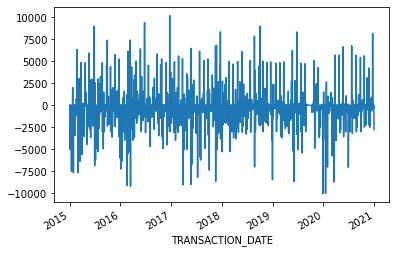

In [777]:
from matplotlib import pyplot
dataset_2015_2020_ser.plot()
pyplot.show()

In [778]:
"""
ahora vemos unos datos de transacciones mucho más uniformes y agrupados que darán lugar a una serie temporal más fácil de
modelizar.
"""

'\nahora vemos unos datos de transacciones mucho más uniformes y agrupados que darán lugar a una serie temporal más fácil de\nmodelizar.\n'

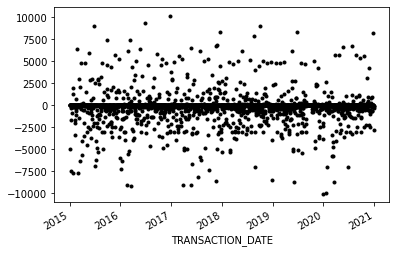

In [779]:
dataset_2015_2020_ser.plot(style='.', color='black')
pyplot.show()

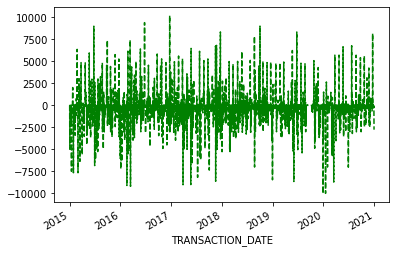

In [780]:
dataset_2015_2020_ser.plot(style='--', color='green')
pyplot.show()

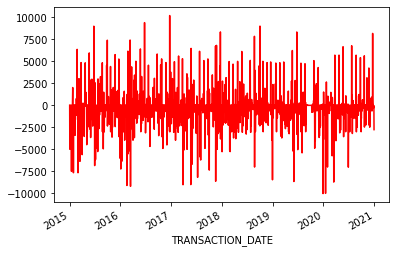

In [781]:
dataset_2015_2020_ser.plot(style='-', color='red')
pyplot.show()

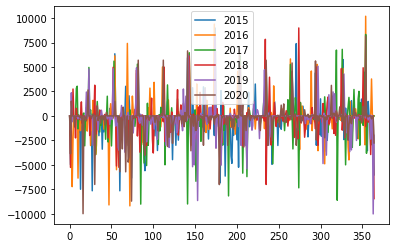

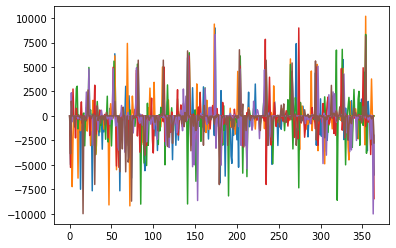

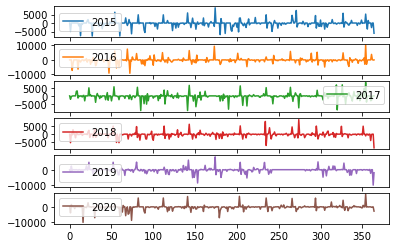

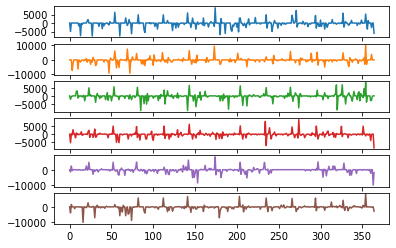

In [782]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = dataset_2015_2020_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=False, legend=True)
years.plot(subplots=False, legend=False)
years.plot(subplots=True, legend=True)
years.plot(subplots=True, legend=False)
pyplot.show()

In [783]:
"""
vemos ahora que los datos de los 5 años son aún más parecidos y están mucho más superpuestos con lo que la serie será entonces
más facil de modelizar
"""

'\nvemos ahora que los datos de los 5 años son aún más parecidos y están mucho más superpuestos con lo que la serie será entonces\nmás facil de modelizar\n'

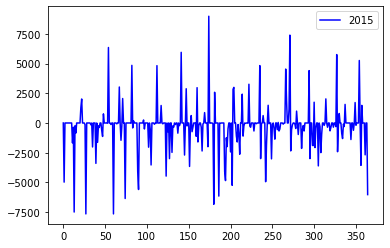

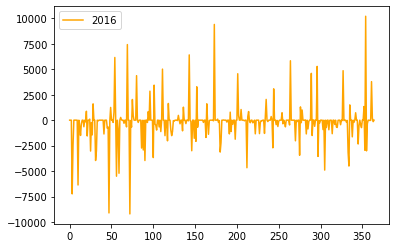

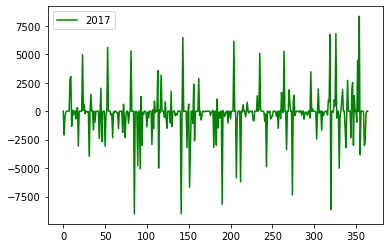

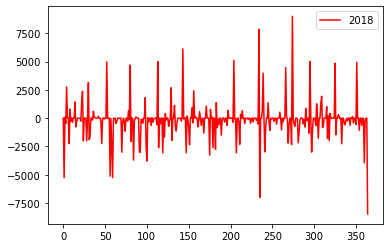

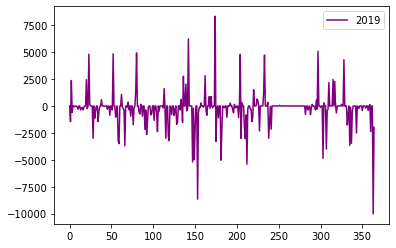

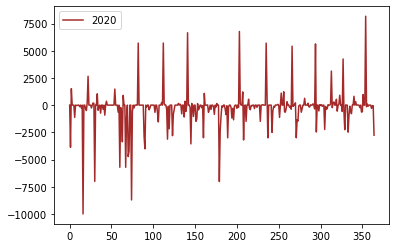

In [784]:
position = range(0,6)
color = ['blue','orange','green','red','purple','brown']

for i,j in zip(position,color):
    years.iloc[:,i].plot(color=j, legend=True)
    pyplot.show()

In [785]:
# 2. Time Series Histogram and Density Plots

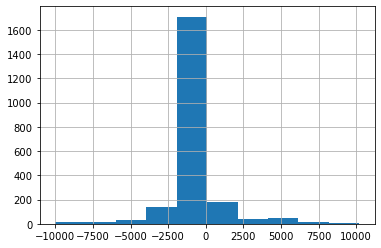

In [786]:
from matplotlib import pyplot
dataset_2015_2020_ser.hist()
pyplot.show()

In [787]:
"""
Vemos ahora que el grafico de barras se ha ensanchado un poco más con respecto al anterior aunque la distribucion sigue siendo
demasiado picuda para ser una gausiana.
También vemos que la mayor parte de las transacciones son negativas y de valores superiores a aproximadamente -2000 eur
"""

'\nVemos ahora que el grafico de barras se ha ensanchado un poco más con respecto al anterior aunque la distribucion sigue siendo\ndemasiado picuda para ser una gausiana.\nTambién vemos que la mayor parte de las transacciones son negativas y de valores superiores a aproximadamente -2000 eur\n'

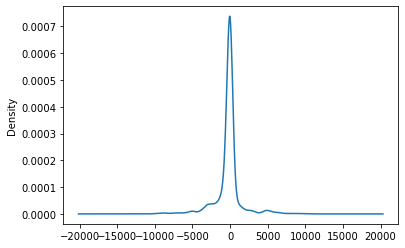

In [788]:
from matplotlib import pyplot
dataset_2015_2020_ser.plot(kind='kde')
pyplot.show()

In [789]:
"""
Nos sigue saliendo un density plot demasiado picudo para considerar la distribucion como gausiana pero es mucho más abierto
que el anterior density plot.
Vemos que nos sale un density plot tremendamente picudo lo que confirma nuestra hipotesis de que la mayoria de las
transacciones se encuentran en valores en el intervalo (-2000,0).
Ahora tendremos menos outliers y se alejaran menos de la media.
"""

'\nNos sigue saliendo un density plot demasiado picudo para considerar la distribucion como gausiana pero es mucho más abierto\nque el anterior density plot.\nVemos que nos sale un density plot tremendamente picudo lo que confirma nuestra hipotesis de que la mayoria de las\ntransacciones se encuentran en valores en el intervalo (-2000,0).\nAhora tendremos menos outliers y se alejaran menos de la media.\n'

In [790]:
# 3. Time Series Box and Whisker Plots by Interval

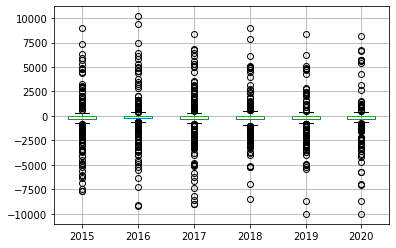

In [791]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = dataset_2015_2020_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

In [792]:
"""
Este boxplot sigue considerando muchisimos outliers porque la inmensa mayoria de las transacciones se deben encontrar en el 
rango (-2000,0) o incluso (-1000,0).
Pero ahora incluso los outliers estan mucho mas agrupados que antes.

También vemos que los boxplots de los 5 años se parecen muchísimo con lo que tenemos esperanza de encontrar repetitibilidad y,
por tanto, estacionalidad en la serie temporal a lo largo de los años.

Si imprimimos los parametros caractristicos de esta distribucion saldremos de dudas.
"""

'\nEste boxplot sigue considerando muchisimos outliers porque la inmensa mayoria de las transacciones se deben encontrar en el \nrango (-2000,0) o incluso (-1000,0).\nPero ahora incluso los outliers estan mucho mas agrupados que antes.\n\nTambién vemos que los boxplots de los 5 años se parecen muchísimo con lo que tenemos esperanza de encontrar repetitibilidad y,\npor tanto, estacionalidad en la serie temporal a lo largo de los años.\n\nSi imprimimos los parametros caractristicos de esta distribucion saldremos de dudas.\n'

In [793]:
dataset_2015_2020_ser.describe()

count     2190.000000
mean      -209.640872
std       1723.591611
min     -10023.910000
25%       -300.285000
50%          0.000000
75%          0.000000
max      10198.500000
Name: AMOUNT, dtype: float64

In [794]:
"""
Confirmando nuestras hipotesis anteriores vemos que el rango intercuartilico es IQR=(-300.285,0) siendo la mean=-209.640872
y la median=0.

No obstante, a pesar de tener tantos outliers no vamos a quitar más observaciones de la distribución.
"""

'\nConfirmando nuestras hipotesis anteriores vemos que el rango intercuartilico es IQR=(-300.285,0) siendo la mean=-209.640872\ny la median=0.\n\nNo obstante, a pesar de tener tantos outliers no vamos a quitar más observaciones de la distribución.\n'

In [795]:
"""
ahora, por si sacamos más conclusion de la estacionalidad vamos a sacar los boxplots de los doce meses de cada año
"""

'\nahora, por si sacamos más conclusion de la estacionalidad vamos a sacar los boxplots de los doce meses de cada año\n'

Año:2015


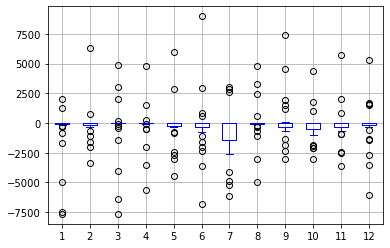

Año:2016


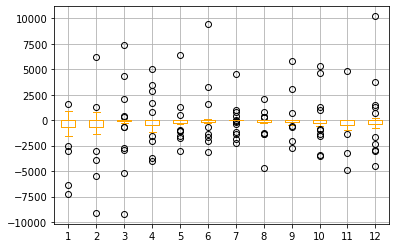

Año:2017


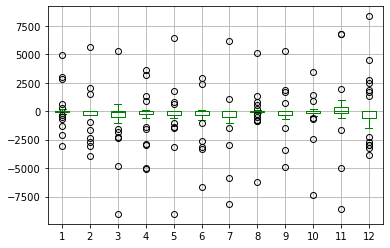

Año:2018


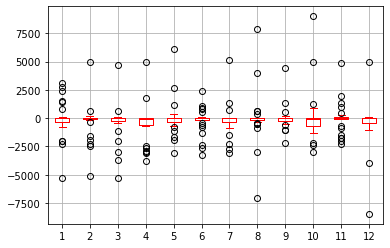

Año:2019


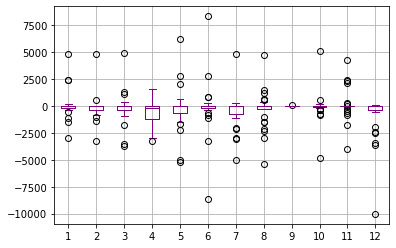

Año:2020


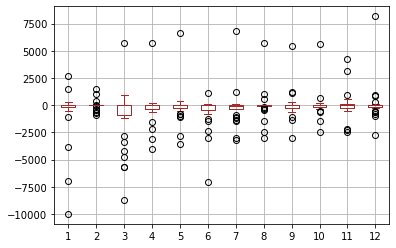

In [796]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
color = ['blue','orange','green','red','purple','brown']
times = ['2015', '2016','2017', '2018', '2019', '2020']
for n,j in zip(times,color):
    one_year = dataset_2015_2020_ser[n]
    groups = one_year.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = range(1,13)
    print('Año:' + n)
    months.boxplot(color=j)
    pyplot.show()

In [797]:
"""
Imprimiendo los boxplot de los 6 años por meses es posible que se aprecie repetibilidad en los datos pero no se puede 
identificar a simple vista la estacionalidad..

No obstante seguiremos trabajando con este dataset.
"""

'\nImprimiendo los boxplot de los 6 años por meses es posible que se aprecie repetibilidad en los datos pero no se puede \nidentificar a simple vista la estacionalidad..\n\nNo obstante seguiremos trabajando con este dataset.\n'

In [798]:
# 4. Time Series Heat Maps

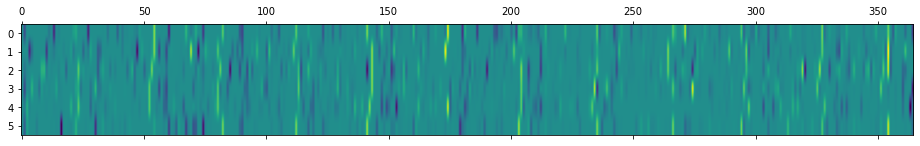

In [799]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = dataset_2015_2020_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

In [800]:
"""
EUREKA: Aquí si se peden ver indicios más claros de estacionalidad en las lineas amarillas verticales a lo largo de los 6 años.

Vamos a pintar los heatmaps de cada año por meses a ver que informacion podemos sacar:
"""

'\nEUREKA: Aquí si se peden ver indicios más claros de estacionalidad en las lineas amarillas verticales a lo largo de los 6 años.\n\nVamos a pintar los heatmaps de cada año por meses a ver que informacion podemos sacar:\n'

year 2015


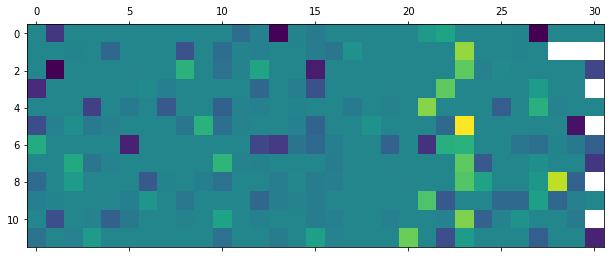

year 2016


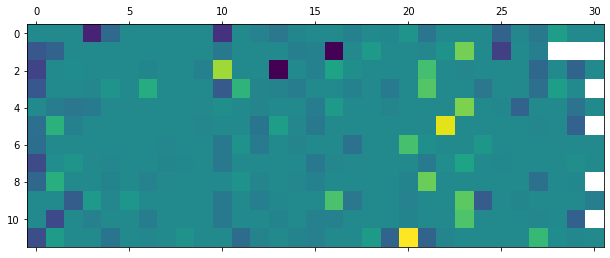

year 2017


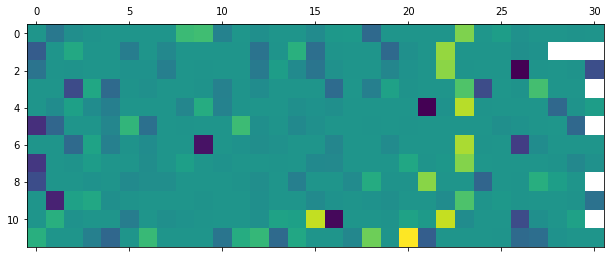

year 2018


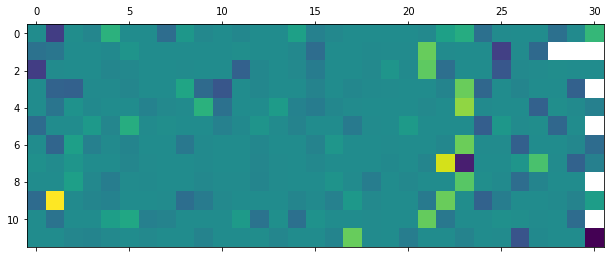

year 2019


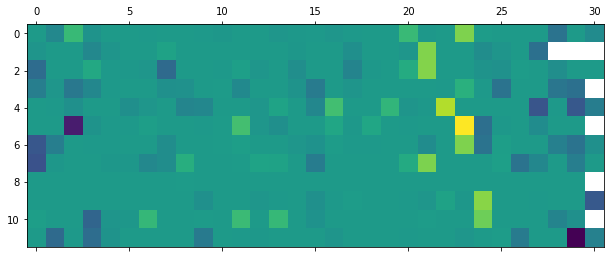

year 2020


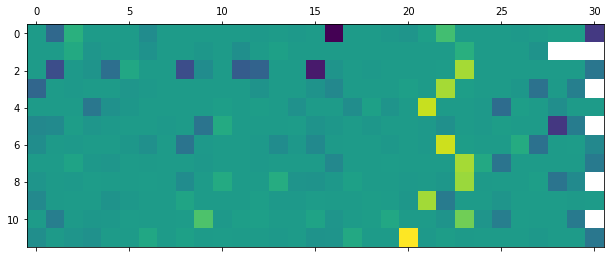

In [801]:
from pandas import read_csv
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
times = ['2015', '2016','2017', '2018', '2019', '2020']
for n in times:
    one_year = dataset_2015_2020_ser[n]
    groups = one_year.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = range(1,13)
    months = months.T
    print('year ' + n)
    pyplot.matshow(months, interpolation=None, aspect='auto')
    pyplot.show()

In [802]:
"""
Vemos que hay una estacionalidad clara todos los meses de todos los años entre los días 21 y 24 de cada mes.

Y los demás valores del mes son bastante uniformes en color verde claro
"""

'\nVemos que hay una estacionalidad clara todos los meses de todos los años entre los días 21 y 24 de cada mes.\n\nY los demás valores del mes son bastante uniformes en color verde claro\n'

In [803]:
# 5. Time Series Lag Scatter Plots

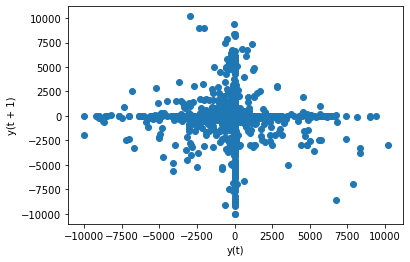

In [804]:
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(dataset_2015_2020_ser)
pyplot.show()

In [805]:
"""
Aqui vemos que no hay correlacion entre y(t+1) e y(t)
"""

'\nAqui vemos que no hay correlacion entre y(t+1) e y(t)\n'

In [1]:
"""
Ahora vamos a hacer lagplots entre y(t+1) y sus 12 lags anteriores hasta y(t-12)
"""

'\nAhora vamos a hacer lagplots entre y(t+1) y sus 12 lags anteriores hasta y(t-12)\n'

t+1 vs t-1


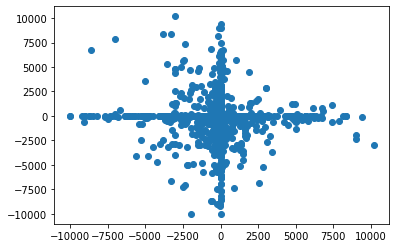

t+1 vs t-2


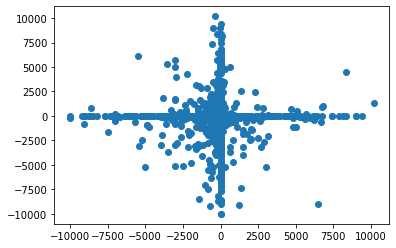

t+1 vs t-3


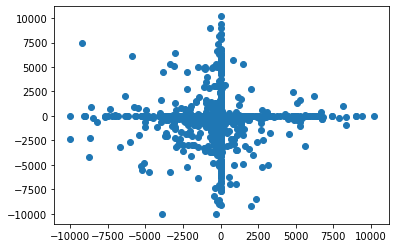

t+1 vs t-4


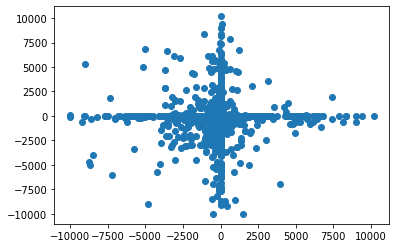

t+1 vs t-5


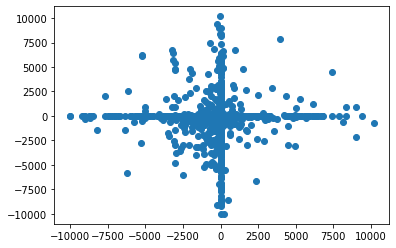

t+1 vs t-6


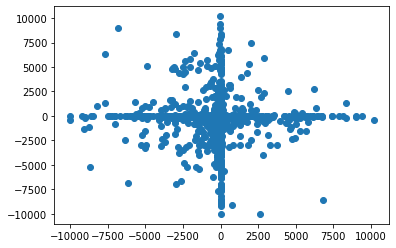

t+1 vs t-7


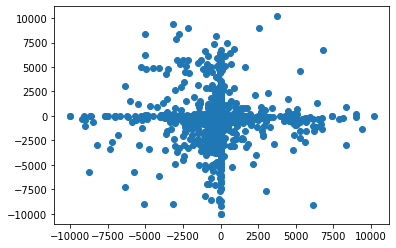

t+1 vs t-8


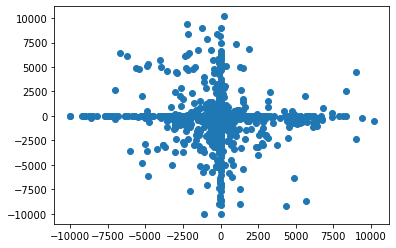

t+1 vs t-9


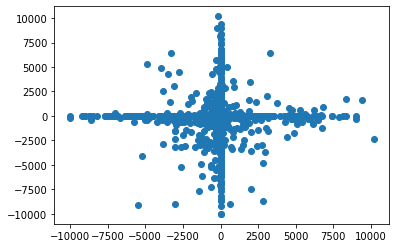

t+1 vs t-10


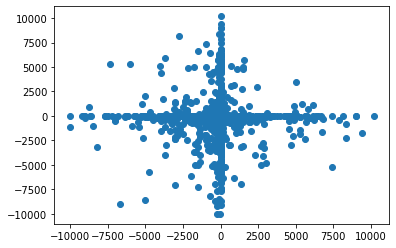

t+1 vs t-11


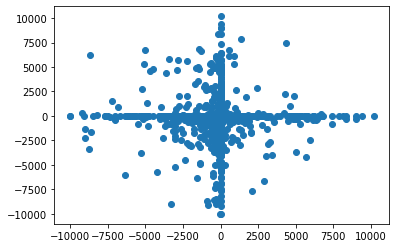

t+1 vs t-12


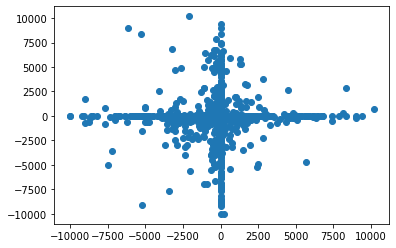

In [807]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
values = DataFrame(dataset_2015_2020_ser.values)
lags = 12
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [808]:
"""
Vemos que no hay correlacion entre una observacion y la misma hasta en 12 instantes anteriores teniendo todos los lag scatter
plots valores muy parecidos.
"""

'\nVemos que no hay correlacion entre una observacion y la misma hasta en 12 instantes anteriores teniendo todos los lag scatter\nplots valores muy parecidos.\n'

In [809]:
# 6. Time Series Autocorrelation Plots

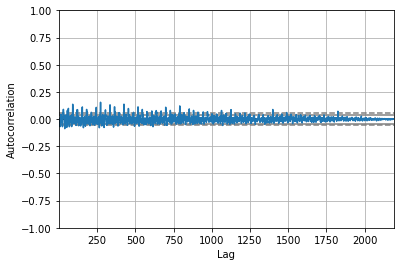

In [810]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataset_2015_2020_ser)
pyplot.show()

In [811]:
"""
Vemos que hay ciclos de correlacion positiva y negativa débil. Más correlación positiva que negativa y esta se va perdiendo a
medida que vamos atrás en el tiempo.
"""

'\nVemos que hay ciclos de correlacion positiva y negativa débil. Más correlación positiva que negativa y esta se va perdiendo a\nmedida que vamos atrás en el tiempo.\n'

In [812]:
dataset_2015_2020_ser

TRANSACTION_DATE
2015-01-01       0.00
2015-01-02   -4981.47
2015-01-03       0.00
2015-01-04       0.00
2015-01-05       0.00
               ...   
2020-12-27       0.00
2020-12-28    -300.00
2020-12-29     -54.08
2020-12-30     -52.76
2020-12-31   -2763.56
Name: AMOUNT, Length: 2190, dtype: float64

In [813]:
dataset_2015_2020_df

AMOUNT
TRANSACTION_DATE         
2015-01-01           0.00
2015-01-02       -4981.47
2015-01-03           0.00
2015-01-04           0.00
2015-01-05           0.00
...                   ...
2020-12-27           0.00
2020-12-28        -300.00
2020-12-29         -54.08
2020-12-30         -52.76
2020-12-31       -2763.56

[2190 rows x 1 columns]

In [2]:
# nos guardamos este dataframe en un csv antes de continuar

In [818]:
dataset_2015_2020_df.to_csv(path_or_buf='transactions_clean_2015_2020.csv')

In [819]:
"""
A CONTINUACION CON ESTE DATASET VAMOS A CONSTRUIR UN DATASET DE BALANCE DE LA CUENTA SOBRE LA QUE HAREMOS UN ESTUDIO ESTADISTICO
Y APLICAREMOS LA LIBRERIA PROPHET DE FACEBOOK A VER SI PODEMOS SACAR PREDICCIONES DE LA SERIE TEMPORAL.
PRIMERO POR DIAS Y LUEGO POR SEMANAS.
"""

'\nA CONTINUACION CON ESTE DATASET VAMOS A CONSTRUIR UN DATASET DE BALANCE DE LA CUENTA SOBRE LA QUE HAREMOS UN ESTUDIO ESTADISTICO\nY APLICAREMOS LA LIBRERIA PROPHET DE FACEBOOK A VER SI PODEMOS SACAR PREDICCIONES DE LA SERIE TEMPORAL.\nPRIMERO POR DIAS Y LUEGO POR SEMANAS.\n'

In [820]:
"""
antes de continuar para recrear un balance lo más realista posible voy a crear el dataset real de balance con todas las
transacciones para saber el saldo de la cuenta el 2015-01-01 (sabiendo que el balance de la cuenta el 2021-02-09 era de
650.59 eur).
"""

'\nantes de continuar para recrear un balance lo más realista posible voy a crear el dataset real de balance con todas las\ntransacciones para saber el saldo de la cuenta el 2015-01-01 (sabiendo que el balance de la cuenta el 2021-02-09 era de\n650.59 eur).\n'

In [821]:
# Load data using read_csv
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame
import datetime
from matplotlib import pyplot
# series = read_csv('daily-total-female-births-in-cal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
transactions_original_df = read_excel('Cuenta_124075.xlsx', sheet_name='_select_TRANSACTION_DATE_cast_a')

In [822]:
transactions_original_df

TRANSACTION_DATE  AMOUNT  CATEGORY_ID                     CATEGORY_NAME  \
0          2021-02-09 -120.00        115.0             category.deportes_115   
1          2021-02-09  -21.00        330.0                category.cuota_330   
2          2021-02-09  -35.00        330.0                category.cuota_330   
3          2021-02-09  -61.80        330.0                category.cuota_330   
4          2021-02-08 -300.00        461.0  category.movimiento_efectivo_461   
...               ...     ...          ...                               ...   
5341       2014-03-03 -123.00        330.0                category.cuota_330   
5342       2014-03-03 -123.00        330.0                category.cuota_330   
5343       2014-03-03 -137.04        330.0                category.cuota_330   
5344       2014-03-03  -73.80        330.0                category.cuota_330   
5345       2014-03-03 -179.66        211.0           category.ordinarios_211   

      CATEGORY_IS_FINANCIAL  CATEGORY_IS_TRANSFER  Unnamed: 6        ID  \
0                     False                 False         NaN  124075.0   
1                     False                 False         NaN       NaN   
2                     False                 False         NaN       NaN   
3                     False                 False         NaN       NaN   
4                      True                 False         NaN       NaN   
...                     ...                   ...         ...       ...   
5341                  False                 False         NaN       NaN   
5342                  False                 False         NaN       NaN   
5343                  False                 False         NaN       NaN   
5344                  False                 False         NaN       NaN   
5345                  False                 False         NaN       NaN   

      BALANCE BALANCE_DATE  
0      650.59   2021-02-09  
1         NaN          NaT  
2         NaN          NaT  
3         NaN          NaT  
4         NaN          NaT  
...       ...          ...  
5341      NaN          NaT  
5342      NaN          NaT  
5343      NaN          NaT  
5344      NaN          NaT  
5345      NaN          NaT  

[5346 rows x 10 columns]

In [823]:
transactions_original_df = transactions_original_df.iloc[:,0:2]

In [824]:
transactions_original_df

TRANSACTION_DATE  AMOUNT
0          2021-02-09 -120.00
1          2021-02-09  -21.00
2          2021-02-09  -35.00
3          2021-02-09  -61.80
4          2021-02-08 -300.00
...               ...     ...
5341       2014-03-03 -123.00
5342       2014-03-03 -123.00
5343       2014-03-03 -137.04
5344       2014-03-03  -73.80
5345       2014-03-03 -179.66

[5346 rows x 2 columns]

In [825]:
transactions_original_df=transactions_original_df.groupby(transactions_original_df.TRANSACTION_DATE).sum()

In [826]:
transactions_original_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-07          -40.00
2014-03-11        -1368.75
...                    ...
2021-02-03         -119.00
2021-02-04         -565.11
2021-02-05         -450.86
2021-02-08         -306.00
2021-02-09         -237.80

[1452 rows x 1 columns]

In [827]:
transactions_original_df.reset_index(level=0, inplace=True)

In [828]:
transactions_original_df

TRANSACTION_DATE    AMOUNT
0          2014-03-03  32297.41
1          2014-03-04    -70.00
2          2014-03-05    -21.00
3          2014-03-07    -40.00
4          2014-03-11  -1368.75
...               ...       ...
1447       2021-02-03   -119.00
1448       2021-02-04   -565.11
1449       2021-02-05   -450.86
1450       2021-02-08   -306.00
1451       2021-02-09   -237.80

[1452 rows x 2 columns]

In [829]:
range_of_dates = date_range(start=transactions_original_df.TRANSACTION_DATE.min(), \
                            end=transactions_original_df.TRANSACTION_DATE.max())

In [830]:
range_of_dates

DatetimeIndex(['2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-08', '2014-03-09', '2014-03-10',
               '2014-03-11', '2014-03-12',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=2536, freq='D')

In [831]:
transactions_original_df = transactions_original_df.set_index('TRANSACTION_DATE').reindex(range_of_dates).fillna(0.0).rename_axis('TRANSACTION_DATE').reset_index()

In [832]:
transactions_original_df

TRANSACTION_DATE    AMOUNT
0          2014-03-03  32297.41
1          2014-03-04    -70.00
2          2014-03-05    -21.00
3          2014-03-06      0.00
4          2014-03-07    -40.00
...               ...       ...
2531       2021-02-05   -450.86
2532       2021-02-06      0.00
2533       2021-02-07      0.00
2534       2021-02-08   -306.00
2535       2021-02-09   -237.80

[2536 rows x 2 columns]

In [833]:
transactions_original_df["DATE"]=transactions_original_df["TRANSACTION_DATE"]

In [834]:
transactions_original_df

TRANSACTION_DATE    AMOUNT       DATE
0          2014-03-03  32297.41 2014-03-03
1          2014-03-04    -70.00 2014-03-04
2          2014-03-05    -21.00 2014-03-05
3          2014-03-06      0.00 2014-03-06
4          2014-03-07    -40.00 2014-03-07
...               ...       ...        ...
2531       2021-02-05   -450.86 2021-02-05
2532       2021-02-06      0.00 2021-02-06
2533       2021-02-07      0.00 2021-02-07
2534       2021-02-08   -306.00 2021-02-08
2535       2021-02-09   -237.80 2021-02-09

[2536 rows x 3 columns]

In [835]:
transactions_original_df["BALANCE"]=0

In [836]:
transactions_original_df

TRANSACTION_DATE    AMOUNT       DATE  BALANCE
0          2014-03-03  32297.41 2014-03-03        0
1          2014-03-04    -70.00 2014-03-04        0
2          2014-03-05    -21.00 2014-03-05        0
3          2014-03-06      0.00 2014-03-06        0
4          2014-03-07    -40.00 2014-03-07        0
...               ...       ...        ...      ...
2531       2021-02-05   -450.86 2021-02-05        0
2532       2021-02-06      0.00 2021-02-06        0
2533       2021-02-07      0.00 2021-02-07        0
2534       2021-02-08   -306.00 2021-02-08        0
2535       2021-02-09   -237.80 2021-02-09        0

[2536 rows x 4 columns]

In [837]:
"""
asumo que la cuenta el 2014-03-03 tiene un balance inicial de cero euros que luego corregire con el balance de
650.59 eur el 2021-02-09 para calcular el balance el 2015-01-01 y así corregir con ese valor en el dataset del balance
que voy a usar para estimar la serie temporal.
"""

'\nasumo que la cuenta el 2014-03-03 tiene un balance inicial de cero euros que luego corregire con el balance de\n650.59 eur el 2021-02-09 para calcular el balance el 2015-01-01 y así corregir con ese valor en el dataset del balance\nque voy a usar para estimar la serie temporal.\n'

In [838]:
for i in range(transactions_original_df.index[0],transactions_original_df.index[-1]):
    transactions_original_df.loc[i+1,'BALANCE'] = transactions_original_df.loc[i,'BALANCE'] + \
    transactions_original_df.loc[i,'AMOUNT']

In [839]:
transactions_original_df

TRANSACTION_DATE    AMOUNT       DATE   BALANCE
0          2014-03-03  32297.41 2014-03-03      0.00
1          2014-03-04    -70.00 2014-03-04  32297.41
2          2014-03-05    -21.00 2014-03-05  32227.41
3          2014-03-06      0.00 2014-03-06  32206.41
4          2014-03-07    -40.00 2014-03-07  32206.41
...               ...       ...        ...       ...
2531       2021-02-05   -450.86 2021-02-05 -23085.99
2532       2021-02-06      0.00 2021-02-06 -23536.85
2533       2021-02-07      0.00 2021-02-07 -23536.85
2534       2021-02-08   -306.00 2021-02-08 -23536.85
2535       2021-02-09   -237.80 2021-02-09 -23842.85

[2536 rows x 4 columns]

In [840]:
transactions_original_df=transactions_original_df.drop(['TRANSACTION_DATE','AMOUNT'], axis = 1)

In [841]:
transactions_original_df

DATE   BALANCE
0    2014-03-03      0.00
1    2014-03-04  32297.41
2    2014-03-05  32227.41
3    2014-03-06  32206.41
4    2014-03-07  32206.41
...         ...       ...
2531 2021-02-05 -23085.99
2532 2021-02-06 -23536.85
2533 2021-02-07 -23536.85
2534 2021-02-08 -23536.85
2535 2021-02-09 -23842.85

[2536 rows x 2 columns]

In [842]:
balance_original_df=transactions_original_df

In [843]:
balance_original_df

DATE   BALANCE
0    2014-03-03      0.00
1    2014-03-04  32297.41
2    2014-03-05  32227.41
3    2014-03-06  32206.41
4    2014-03-07  32206.41
...         ...       ...
2531 2021-02-05 -23085.99
2532 2021-02-06 -23536.85
2533 2021-02-07 -23536.85
2534 2021-02-08 -23536.85
2535 2021-02-09 -23842.85

[2536 rows x 2 columns]

In [844]:
del(transactions_original_df)

In [845]:
balance_original_df=balance_original_df.set_index(balance_original_df.iloc[:,0])

In [846]:
balance_original_df

DATE   BALANCE
DATE                           
2014-03-03 2014-03-03      0.00
2014-03-04 2014-03-04  32297.41
2014-03-05 2014-03-05  32227.41
2014-03-06 2014-03-06  32206.41
2014-03-07 2014-03-07  32206.41
...               ...       ...
2021-02-05 2021-02-05 -23085.99
2021-02-06 2021-02-06 -23536.85
2021-02-07 2021-02-07 -23536.85
2021-02-08 2021-02-08 -23536.85
2021-02-09 2021-02-09 -23842.85

[2536 rows x 2 columns]

In [847]:
balance_original_df=balance_original_df.drop(['DATE'], axis = 1)

In [848]:
balance_original_df

BALANCE
DATE                
2014-03-03      0.00
2014-03-04  32297.41
2014-03-05  32227.41
2014-03-06  32206.41
2014-03-07  32206.41
...              ...
2021-02-05 -23085.99
2021-02-06 -23536.85
2021-02-07 -23536.85
2021-02-08 -23536.85
2021-02-09 -23842.85

[2536 rows x 1 columns]

In [849]:
"""
de acuerdo al excel 'Cuenta_124075.xlsx' el 2021-02-09 la cuenta tenia 650.59 eur luego a los -23842.85 eur que ahora tiene el 
dataframe el 2021-02-09 tengo que sumar 24493.44 eur para obtener 650.59 eur ese dia.
Y esa operacion la tengo que hacer en la columna balance para todas sus filas.
-23842.85 + 24493.44 = 650.59 eur
"""

"\nde acuerdo al excel 'Cuenta_124075.xlsx' el 2021-02-09 la cuenta tenia 650.59 eur luego a los -23842.85 eur que ahora tiene el \ndataframe el 2021-02-09 tengo que sumar 24493.44 eur para obtener 650.59 eur ese dia.\nY esa operacion la tengo que hacer en la columna balance para todas sus filas.\n-23842.85 + 24493.44 = 650.59 eur\n"

In [850]:
balance_original_df['BALANCE'] = balance_original_df['BALANCE'] + 24493.44

In [851]:
balance_original_df

BALANCE
DATE                
2014-03-03  24493.44
2014-03-04  56790.85
2014-03-05  56720.85
2014-03-06  56699.85
2014-03-07  56699.85
...              ...
2021-02-05   1407.45
2021-02-06    956.59
2021-02-07    956.59
2021-02-08    956.59
2021-02-09    650.59

[2536 rows x 1 columns]

In [852]:
# me voy a guardar este dataframe en un csv

In [853]:
balance_original_df.to_csv(path_or_buf='balance_original.csv')

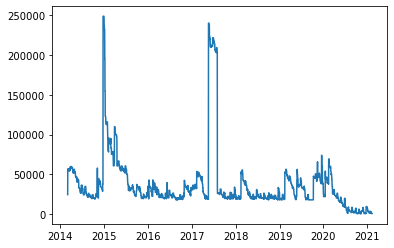

In [854]:
pyplot.plot(balance_original_df)
pyplot.show()

In [855]:
balance_original_df.reset_index(level=0, inplace=True)

In [856]:
balance_original_df

DATE   BALANCE
0    2014-03-03  24493.44
1    2014-03-04  56790.85
2    2014-03-05  56720.85
3    2014-03-06  56699.85
4    2014-03-07  56699.85
...         ...       ...
2531 2021-02-05   1407.45
2532 2021-02-06    956.59
2533 2021-02-07    956.59
2534 2021-02-08    956.59
2535 2021-02-09    650.59

[2536 rows x 2 columns]

In [857]:
balance_original_df=balance_original_df.set_index(balance_original_df.iloc[:,0])

In [858]:
balance_original_df

DATE   BALANCE
DATE                           
2014-03-03 2014-03-03  24493.44
2014-03-04 2014-03-04  56790.85
2014-03-05 2014-03-05  56720.85
2014-03-06 2014-03-06  56699.85
2014-03-07 2014-03-07  56699.85
...               ...       ...
2021-02-05 2021-02-05   1407.45
2021-02-06 2021-02-06    956.59
2021-02-07 2021-02-07    956.59
2021-02-08 2021-02-08    956.59
2021-02-09 2021-02-09    650.59

[2536 rows x 2 columns]

In [860]:
balance_original_df=balance_original_df.drop(['DATE'], axis = 1)

In [861]:
balance_original_df

BALANCE
DATE                
2014-03-03  24493.44
2014-03-04  56790.85
2014-03-05  56720.85
2014-03-06  56699.85
2014-03-07  56699.85
...              ...
2021-02-05   1407.45
2021-02-06    956.59
2021-02-07    956.59
2021-02-08    956.59
2021-02-09    650.59

[2536 rows x 1 columns]

In [589]:
# Mejor sacar el valor del balance el '2015-01-01' como un valor de una serie

In [864]:
balance_original_ser = balance_original_df.T.squeeze()

In [865]:
balance_original_ser

DATE
2014-03-03    24493.44
2014-03-04    56790.85
2014-03-05    56720.85
2014-03-06    56699.85
2014-03-07    56699.85
                ...   
2021-02-05     1407.45
2021-02-06      956.59
2021-02-07      956.59
2021-02-08      956.59
2021-02-09      650.59
Name: BALANCE, Length: 2536, dtype: float64

In [866]:
balance_original_ser['2015-01-01']

236563.89

In [870]:
# como 236653.89 es un valor altisimo para el balance vamos a ver que valor tenia el balance el 2020-12-31

In [871]:
balance_original_ser['2020-12-31']

8958.24000000006

In [868]:
balance_original_ser['2020-12']

DATE
2020-12-01    3121.41
2020-12-02    2129.63
2020-12-03    2028.54
2020-12-04    1490.68
2020-12-05     701.88
2020-12-06     701.88
2020-12-07     701.88
2020-12-08    1513.60
2020-12-09    1513.60
2020-12-10    1834.40
2020-12-11    1834.40
2020-12-12    1844.40
2020-12-13    1844.40
2020-12-14    1844.40
2020-12-15    1623.40
2020-12-16    1623.40
2020-12-17     981.87
2020-12-18     374.65
2020-12-19    1349.65
2020-12-20    1349.65
2020-12-21    1349.65
2020-12-22    9519.48
2020-12-23    9372.60
2020-12-24    9464.60
2020-12-25    9365.08
2020-12-26    9365.08
2020-12-27    9365.08
2020-12-28    9365.08
2020-12-29    9065.08
2020-12-30    9011.00
2020-12-31    8958.24
Name: BALANCE, dtype: float64

In [872]:
"""
vemos que 8958.24 es un valor mucho más razonable y veraz y, por tanto, lo vamos a usar como offser de nuestra serie temporal
sin outliers
"""

'\nvemos que 8958.24 es un valor muhco más razonable y veraz y, por tanto, lo vamos a usar como offser de nuestra serie temporal\nsin outliers\n'

In [875]:
del(balance_original_ser)
del(balance_original_df)

In [874]:
"""
recuperamos el dataset 'transactions_clean_2015_2020.csv'
"""

"\nrecuperamos el dataset 'transactions_clean_2015_2020.csv'\n"

In [878]:
transactions_clean_2015_2020_ser = read_csv('transactions_clean_2015_2020.csv', header=0, index_col=0, parse_dates=True, \
                                            squeeze=True)

In [879]:
transactions_clean_2015_2020_ser

TRANSACTION_DATE
2015-01-01       0.00
2015-01-02   -4981.47
2015-01-03       0.00
2015-01-04       0.00
2015-01-05       0.00
               ...   
2020-12-27       0.00
2020-12-28    -300.00
2020-12-29     -54.08
2020-12-30     -52.76
2020-12-31   -2763.56
Name: AMOUNT, Length: 2190, dtype: float64

In [881]:
"""
volvemos a repetir las operaciones anteriores para construir un balance a partir de sus transacciones
"""

'\nvolvemos a repetir las operaciones anteriores para construir un balance a partir de sus transacciones\n'

In [882]:
transactions_clean_2015_2020_df = DataFrame(transactions_clean_2015_2020_ser)

In [883]:
transactions_clean_2015_2020_df

AMOUNT
TRANSACTION_DATE         
2015-01-01           0.00
2015-01-02       -4981.47
2015-01-03           0.00
2015-01-04           0.00
2015-01-05           0.00
...                   ...
2020-12-27           0.00
2020-12-28        -300.00
2020-12-29         -54.08
2020-12-30         -52.76
2020-12-31       -2763.56

[2190 rows x 1 columns]

In [884]:
transactions_clean_2015_2020_df.reset_index(level=0, inplace=True)

In [885]:
transactions_clean_2015_2020_df

TRANSACTION_DATE   AMOUNT
0          2015-01-01     0.00
1          2015-01-02 -4981.47
2          2015-01-03     0.00
3          2015-01-04     0.00
4          2015-01-05     0.00
...               ...      ...
2185       2020-12-27     0.00
2186       2020-12-28  -300.00
2187       2020-12-29   -54.08
2188       2020-12-30   -52.76
2189       2020-12-31 -2763.56

[2190 rows x 2 columns]

In [886]:
transactions_clean_2015_2020_df["DATE"]=transactions_clean_2015_2020_df["TRANSACTION_DATE"]

In [887]:
transactions_clean_2015_2020_df

TRANSACTION_DATE   AMOUNT       DATE
0          2015-01-01     0.00 2015-01-01
1          2015-01-02 -4981.47 2015-01-02
2          2015-01-03     0.00 2015-01-03
3          2015-01-04     0.00 2015-01-04
4          2015-01-05     0.00 2015-01-05
...               ...      ...        ...
2185       2020-12-27     0.00 2020-12-27
2186       2020-12-28  -300.00 2020-12-28
2187       2020-12-29   -54.08 2020-12-29
2188       2020-12-30   -52.76 2020-12-30
2189       2020-12-31 -2763.56 2020-12-31

[2190 rows x 3 columns]

In [888]:
transactions_clean_2015_2020_df["BALANCE"]=0

In [889]:
transactions_clean_2015_2020_df

TRANSACTION_DATE   AMOUNT       DATE  BALANCE
0          2015-01-01     0.00 2015-01-01        0
1          2015-01-02 -4981.47 2015-01-02        0
2          2015-01-03     0.00 2015-01-03        0
3          2015-01-04     0.00 2015-01-04        0
4          2015-01-05     0.00 2015-01-05        0
...               ...      ...        ...      ...
2185       2020-12-27     0.00 2020-12-27        0
2186       2020-12-28  -300.00 2020-12-28        0
2187       2020-12-29   -54.08 2020-12-29        0
2188       2020-12-30   -52.76 2020-12-30        0
2189       2020-12-31 -2763.56 2020-12-31        0

[2190 rows x 4 columns]

In [891]:
transactions_clean_2015_2020_df.index[0], transactions_clean_2015_2020_df.index[-1]

(0, 2189)

In [893]:
for i in range(transactions_clean_2015_2020_df.index[0],transactions_clean_2015_2020_df.index[-1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [894]:
for i in range(transactions_clean_2015_2020_df.index[0],transactions_clean_2015_2020_df.index[-1]):
    transactions_clean_2015_2020_df.loc[i+1,'BALANCE'] = transactions_clean_2015_2020_df.loc[i,'BALANCE'] + \
    transactions_clean_2015_2020_df.loc[i,'AMOUNT']

In [895]:
transactions_clean_2015_2020_df

TRANSACTION_DATE   AMOUNT       DATE    BALANCE
0          2015-01-01     0.00 2015-01-01       0.00
1          2015-01-02 -4981.47 2015-01-02       0.00
2          2015-01-03     0.00 2015-01-03   -4981.47
3          2015-01-04     0.00 2015-01-04   -4981.47
4          2015-01-05     0.00 2015-01-05   -4981.47
...               ...      ...        ...        ...
2185       2020-12-27     0.00 2020-12-27 -455943.11
2186       2020-12-28  -300.00 2020-12-28 -455943.11
2187       2020-12-29   -54.08 2020-12-29 -456243.11
2188       2020-12-30   -52.76 2020-12-30 -456297.19
2189       2020-12-31 -2763.56 2020-12-31 -456349.95

[2190 rows x 4 columns]

In [896]:
transactions_clean_2015_2020_df=transactions_clean_2015_2020_df.drop(['TRANSACTION_DATE','AMOUNT'], axis = 1)

In [898]:
transactions_clean_2015_2020_df

DATE    BALANCE
0    2015-01-01       0.00
1    2015-01-02       0.00
2    2015-01-03   -4981.47
3    2015-01-04   -4981.47
4    2015-01-05   -4981.47
...         ...        ...
2185 2020-12-27 -455943.11
2186 2020-12-28 -455943.11
2187 2020-12-29 -456243.11
2188 2020-12-30 -456297.19
2189 2020-12-31 -456349.95

[2190 rows x 2 columns]

In [899]:
balance_clean_2015_2020_df=transactions_clean_2015_2020_df

In [900]:
del(transactions_clean_2015_2020_df)

In [901]:
balance_clean_2015_2020_df

DATE    BALANCE
0    2015-01-01       0.00
1    2015-01-02       0.00
2    2015-01-03   -4981.47
3    2015-01-04   -4981.47
4    2015-01-05   -4981.47
...         ...        ...
2185 2020-12-27 -455943.11
2186 2020-12-28 -455943.11
2187 2020-12-29 -456243.11
2188 2020-12-30 -456297.19
2189 2020-12-31 -456349.95

[2190 rows x 2 columns]

In [902]:
balance_clean_2015_2020_df=balance_clean_2015_2020_df.set_index(balance_clean_2015_2020_df.iloc[:,0])

In [903]:
balance_clean_2015_2020_df

DATE    BALANCE
DATE                            
2015-01-01 2015-01-01       0.00
2015-01-02 2015-01-02       0.00
2015-01-03 2015-01-03   -4981.47
2015-01-04 2015-01-04   -4981.47
2015-01-05 2015-01-05   -4981.47
...               ...        ...
2020-12-27 2020-12-27 -455943.11
2020-12-28 2020-12-28 -455943.11
2020-12-29 2020-12-29 -456243.11
2020-12-30 2020-12-30 -456297.19
2020-12-31 2020-12-31 -456349.95

[2190 rows x 2 columns]

In [904]:
balance_clean_2015_2020_df=balance_clean_2015_2020_df.drop(['DATE'], axis = 1)

In [905]:
balance_clean_2015_2020_df

BALANCE
DATE                 
2015-01-01       0.00
2015-01-02       0.00
2015-01-03   -4981.47
2015-01-04   -4981.47
2015-01-05   -4981.47
...               ...
2020-12-27 -455943.11
2020-12-28 -455943.11
2020-12-29 -456243.11
2020-12-30 -456297.19
2020-12-31 -456349.95

[2190 rows x 1 columns]

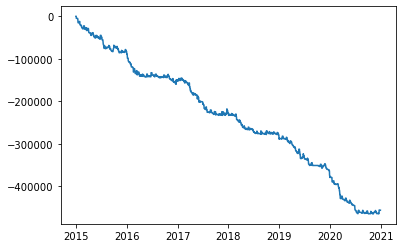

In [906]:
pyplot.plot(balance_clean_2015_2020_df)
pyplot.show()

In [907]:
"""
Como balance_original_ser['2020-12-31']==8958.24 y balance_clean_2015_2020_ser['2020-12-31']==-456349.95
entonces para q balance_clean_2015_2020_ser['2020-12-31']==8958.24 tengo que sumar a la columna balance la cantidad de:
456349.95 + 8958.24 = 465308.19
"""

"\nComo balance_original_ser['2020-12-31']==8958.24 y balance_clean_2015_2020_ser['2020-12-31']==-456349.95\nentonces para q balance_clean_2015_2020_ser['2020-12-31']==8958.24 tengo que sumar a la columna balance la cantidad de:\n456349.95 + 8958.24 = 465308.19\n"

In [908]:
balance_clean_2015_2020_df['BALANCE'] = balance_clean_2015_2020_df['BALANCE'] + 465308.19

In [909]:
balance_clean_2015_2020_df

BALANCE
DATE                 
2015-01-01  465308.19
2015-01-02  465308.19
2015-01-03  460326.72
2015-01-04  460326.72
2015-01-05  460326.72
...               ...
2020-12-27    9365.08
2020-12-28    9365.08
2020-12-29    9065.08
2020-12-30    9011.00
2020-12-31    8958.24

[2190 rows x 1 columns]

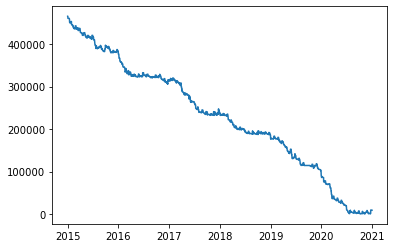

In [910]:
pyplot.plot(balance_clean_2015_2020_df)
pyplot.show()

In [912]:
"""
Me voy a guardar este dataframe por si acaso pero no voy a trabajar más con él ya que aunque tiene una trend y una seasonality
muy claras no representa el aspecto del saldo de una cuenta corriente
"""

'\nMe voy a guardar este dataframe por si acaso pero no voy a trabajar más con él ya que aunque tiene una trend y una seasonality\nmuy claras no representa el aspecto del saldo de una cuenta corriente\n'

In [913]:
balance_clean_2015_2020_df.to_csv(path_or_buf='balance_clean_2015_2020.csv')

In [922]:
"""
A continuacion repetimos de nuevo el ejericio partiendo del dataset original de las transacciones con las siguientes premisas:
- solo cojemos transacciones de los años 2016, 2017, 2018 y 2019.
- tomamos y eliminamos como outliers aquellas transacciones superiores a 100000 eur en valor absoluto que en principio solo 
    va a haber 2 en 2017.
- como 2016 fue un año bisiesto la fila de la transaccion del 2016-2-29 la quitamos y sumamos su valor al de la transaccion el
    2016-2-28
"""

'\nA continuacion repetimos de nuevo el ejericio partiendo del dataset original de las transacciones con las siguientes premisas:\n- solo cojemos transacciones de los años 2016, 2017, 2018 y 2019.\n- tomamos y eliminamos como outliers aquellas transacciones superiores a 100000 eur en valor absoluto que en principio solo \n    va a haber 2 en 2017.\n- como 2016 fue un año bisiesto la fila de la transaccion del 2016-2-29 la quitamos y sumamos su valor al de la transaccion el\n    2016-2-28\n'

In [973]:
# Load data using read_excel
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame
import datetime
from matplotlib import pyplot
dataset_df = read_excel('Cuenta_124075.xlsx', sheet_name='_select_TRANSACTION_DATE_cast_a')

In [974]:
dataset_df

TRANSACTION_DATE  AMOUNT  CATEGORY_ID                     CATEGORY_NAME  \
0          2021-02-09 -120.00        115.0             category.deportes_115   
1          2021-02-09  -21.00        330.0                category.cuota_330   
2          2021-02-09  -35.00        330.0                category.cuota_330   
3          2021-02-09  -61.80        330.0                category.cuota_330   
4          2021-02-08 -300.00        461.0  category.movimiento_efectivo_461   
...               ...     ...          ...                               ...   
5341       2014-03-03 -123.00        330.0                category.cuota_330   
5342       2014-03-03 -123.00        330.0                category.cuota_330   
5343       2014-03-03 -137.04        330.0                category.cuota_330   
5344       2014-03-03  -73.80        330.0                category.cuota_330   
5345       2014-03-03 -179.66        211.0           category.ordinarios_211   

      CATEGORY_IS_FINANCIAL  CATEGORY_IS_TRANSFER  Unnamed: 6        ID  \
0                     False                 False         NaN  124075.0   
1                     False                 False         NaN       NaN   
2                     False                 False         NaN       NaN   
3                     False                 False         NaN       NaN   
4                      True                 False         NaN       NaN   
...                     ...                   ...         ...       ...   
5341                  False                 False         NaN       NaN   
5342                  False                 False         NaN       NaN   
5343                  False                 False         NaN       NaN   
5344                  False                 False         NaN       NaN   
5345                  False                 False         NaN       NaN   

      BALANCE BALANCE_DATE  
0      650.59   2021-02-09  
1         NaN          NaT  
2         NaN          NaT  
3         NaN          NaT  
4         NaN          NaT  
...       ...          ...  
5341      NaN          NaT  
5342      NaN          NaT  
5343      NaN          NaT  
5344      NaN          NaT  
5345      NaN          NaT  

[5346 rows x 10 columns]

In [975]:
dataset_df = dataset_df.iloc[:,0:2]

In [976]:
dataset_df

TRANSACTION_DATE  AMOUNT
0          2021-02-09 -120.00
1          2021-02-09  -21.00
2          2021-02-09  -35.00
3          2021-02-09  -61.80
4          2021-02-08 -300.00
...               ...     ...
5341       2014-03-03 -123.00
5342       2014-03-03 -123.00
5343       2014-03-03 -137.04
5344       2014-03-03  -73.80
5345       2014-03-03 -179.66

[5346 rows x 2 columns]

In [977]:
dataset_df=dataset_df.groupby(dataset_df.TRANSACTION_DATE).sum()

In [978]:
dataset_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-07          -40.00
2014-03-11        -1368.75
...                    ...
2021-02-03         -119.00
2021-02-04         -565.11
2021-02-05         -450.86
2021-02-08         -306.00
2021-02-09         -237.80

[1452 rows x 1 columns]

In [979]:
dataset_df.reset_index(level=0, inplace=True)

In [980]:
dataset_df

TRANSACTION_DATE    AMOUNT
0          2014-03-03  32297.41
1          2014-03-04    -70.00
2          2014-03-05    -21.00
3          2014-03-07    -40.00
4          2014-03-11  -1368.75
...               ...       ...
1447       2021-02-03   -119.00
1448       2021-02-04   -565.11
1449       2021-02-05   -450.86
1450       2021-02-08   -306.00
1451       2021-02-09   -237.80

[1452 rows x 2 columns]

In [981]:
dataset_df.TRANSACTION_DATE.min(), dataset_df.TRANSACTION_DATE.max()

(Timestamp('2014-03-03 00:00:00'), Timestamp('2021-02-09 00:00:00'))

In [982]:
range_of_dates = date_range(start=dataset_df.TRANSACTION_DATE.min(), end=dataset_df.TRANSACTION_DATE.max())

In [983]:
range_of_dates

DatetimeIndex(['2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-08', '2014-03-09', '2014-03-10',
               '2014-03-11', '2014-03-12',
               ...
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
               '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', length=2536, freq='D')

In [984]:
dataset_df = dataset_df.set_index('TRANSACTION_DATE').reindex(range_of_dates).fillna(0.0).rename_axis('TRANSACTION_DATE').reset_index()

In [985]:
dataset_df

TRANSACTION_DATE    AMOUNT
0          2014-03-03  32297.41
1          2014-03-04    -70.00
2          2014-03-05    -21.00
3          2014-03-06      0.00
4          2014-03-07    -40.00
...               ...       ...
2531       2021-02-05   -450.86
2532       2021-02-06      0.00
2533       2021-02-07      0.00
2534       2021-02-08   -306.00
2535       2021-02-09   -237.80

[2536 rows x 2 columns]

In [986]:
dataset_df=dataset_df.set_index(dataset_df.iloc[:,0])

In [987]:
dataset_df

TRANSACTION_DATE    AMOUNT
TRANSACTION_DATE                           
2014-03-03             2014-03-03  32297.41
2014-03-04             2014-03-04    -70.00
2014-03-05             2014-03-05    -21.00
2014-03-06             2014-03-06      0.00
2014-03-07             2014-03-07    -40.00
...                           ...       ...
2021-02-05             2021-02-05   -450.86
2021-02-06             2021-02-06      0.00
2021-02-07             2021-02-07      0.00
2021-02-08             2021-02-08   -306.00
2021-02-09             2021-02-09   -237.80

[2536 rows x 2 columns]

In [988]:
dataset_df=dataset_df.drop(['TRANSACTION_DATE'], axis = 1)

In [989]:
dataset_df

AMOUNT
TRANSACTION_DATE          
2014-03-03        32297.41
2014-03-04          -70.00
2014-03-05          -21.00
2014-03-06            0.00
2014-03-07          -40.00
...                    ...
2021-02-05         -450.86
2021-02-06            0.00
2021-02-07            0.00
2021-02-08         -306.00
2021-02-09         -237.80

[2536 rows x 1 columns]

In [990]:
dataset_ser = dataset_df.T.squeeze()

In [991]:
dataset_2016_2019_ser = dataset_ser.truncate('2016-01-01', '2019-12-31', copy = False)

In [992]:
dataset_2016_2019_ser

TRANSACTION_DATE
2016-01-01        0.00
2016-01-02        0.00
2016-01-03        0.00
2016-01-04    -7234.23
2016-01-05    -2500.00
                ...   
2019-12-27    -2375.64
2019-12-28        0.00
2019-12-29        0.00
2019-12-30   -10023.91
2019-12-31    -1985.54
Name: AMOUNT, Length: 1461, dtype: float64

In [993]:
dataset_2016_2019_ser['2016-02-29']

-839.82

In [994]:
dataset_2016_2019_ser['2016-02-28']

0.0

In [995]:
dataset_2016_2019_ser['2016-02-28'] = dataset_2016_2019_ser['2016-02-28'] + dataset_2016_2019_ser['2016-02-29']

In [996]:
dataset_2016_2019_ser['2016-02']

TRANSACTION_DATE
2016-02-01    -3956.68
2016-02-02    -3000.00
2016-02-03        0.00
2016-02-04      -77.00
2016-02-05        0.00
2016-02-06        0.00
2016-02-07        0.00
2016-02-08        0.00
2016-02-09    20517.70
2016-02-10        0.00
2016-02-11    -1355.46
2016-02-12        0.00
2016-02-13        0.00
2016-02-14        0.00
2016-02-15     -796.11
2016-02-16     -662.65
2016-02-17    -9103.04
2016-02-18      -71.68
2016-02-19     1250.00
2016-02-20        0.00
2016-02-21        0.00
2016-02-22     -221.50
2016-02-23      787.50
2016-02-24     6152.71
2016-02-25        0.00
2016-02-26    -5500.00
2016-02-27        0.00
2016-02-28     -839.82
2016-02-29     -839.82
Name: AMOUNT, dtype: float64

In [997]:
dataset_2016_2019_df = DataFrame(dataset_2016_2019_ser)

In [998]:
dataset_2016_2019_df

AMOUNT
TRANSACTION_DATE          
2016-01-01            0.00
2016-01-02            0.00
2016-01-03            0.00
2016-01-04        -7234.23
2016-01-05        -2500.00
...                    ...
2019-12-27        -2375.64
2019-12-28            0.00
2019-12-29            0.00
2019-12-30       -10023.91
2019-12-31        -1985.54

[1461 rows x 1 columns]

In [999]:
dataset_2016_2019_df = dataset_2016_2019_df.reset_index()

In [1000]:
dataset_2016_2019_df

TRANSACTION_DATE    AMOUNT
0          2016-01-01      0.00
1          2016-01-02      0.00
2          2016-01-03      0.00
3          2016-01-04  -7234.23
4          2016-01-05  -2500.00
...               ...       ...
1456       2019-12-27  -2375.64
1457       2019-12-28      0.00
1458       2019-12-29      0.00
1459       2019-12-30 -10023.91
1460       2019-12-31  -1985.54

[1461 rows x 2 columns]

In [1001]:
dataset_2016_2019_df[dataset_2016_2019_df['TRANSACTION_DATE']=='2016-02-29'].index.values

array([59], dtype=int64)

In [1002]:
dataset_2016_2019_df=dataset_2016_2019_df.drop(index=59)

In [1003]:
dataset_2016_2019_df

TRANSACTION_DATE    AMOUNT
0          2016-01-01      0.00
1          2016-01-02      0.00
2          2016-01-03      0.00
3          2016-01-04  -7234.23
4          2016-01-05  -2500.00
...               ...       ...
1456       2019-12-27  -2375.64
1457       2019-12-28      0.00
1458       2019-12-29      0.00
1459       2019-12-30 -10023.91
1460       2019-12-31  -1985.54

[1460 rows x 2 columns]

In [1004]:
dataset_2016_2019_df=dataset_2016_2019_df.set_index(dataset_2016_2019_df.iloc[:,0])

In [1005]:
dataset_2016_2019_df

TRANSACTION_DATE    AMOUNT
TRANSACTION_DATE                           
2016-01-01             2016-01-01      0.00
2016-01-02             2016-01-02      0.00
2016-01-03             2016-01-03      0.00
2016-01-04             2016-01-04  -7234.23
2016-01-05             2016-01-05  -2500.00
...                           ...       ...
2019-12-27             2019-12-27  -2375.64
2019-12-28             2019-12-28      0.00
2019-12-29             2019-12-29      0.00
2019-12-30             2019-12-30 -10023.91
2019-12-31             2019-12-31  -1985.54

[1460 rows x 2 columns]

In [1006]:
dataset_2016_2019_df=dataset_2016_2019_df.drop(['TRANSACTION_DATE'], axis = 1)

In [1007]:
dataset_2016_2019_df

AMOUNT
TRANSACTION_DATE          
2016-01-01            0.00
2016-01-02            0.00
2016-01-03            0.00
2016-01-04        -7234.23
2016-01-05        -2500.00
...                    ...
2019-12-27        -2375.64
2019-12-28            0.00
2019-12-29            0.00
2019-12-30       -10023.91
2019-12-31        -1985.54

[1460 rows x 1 columns]

In [1008]:
dataset_2016_2019_df.loc['2016-02']

AMOUNT
TRANSACTION_DATE          
2016-02-01        -3956.68
2016-02-02        -3000.00
2016-02-03            0.00
2016-02-04          -77.00
2016-02-05            0.00
2016-02-06            0.00
2016-02-07            0.00
2016-02-08            0.00
2016-02-09        20517.70
2016-02-10            0.00
2016-02-11        -1355.46
2016-02-12            0.00
2016-02-13            0.00
2016-02-14            0.00
2016-02-15         -796.11
2016-02-16         -662.65
2016-02-17        -9103.04
2016-02-18          -71.68
2016-02-19         1250.00
2016-02-20            0.00
2016-02-21            0.00
2016-02-22         -221.50
2016-02-23          787.50
2016-02-24         6152.71
2016-02-25            0.00
2016-02-26        -5500.00
2016-02-27            0.00
2016-02-28         -839.82

In [1009]:
dataset_2016_2019_ser = dataset_2016_2019_df.T.squeeze()

In [1010]:
dataset_2016_2019_ser

TRANSACTION_DATE
2016-01-01        0.00
2016-01-02        0.00
2016-01-03        0.00
2016-01-04    -7234.23
2016-01-05    -2500.00
                ...   
2019-12-27    -2375.64
2019-12-28        0.00
2019-12-29        0.00
2019-12-30   -10023.91
2019-12-31    -1985.54
Name: AMOUNT, Length: 1460, dtype: float64

In [1011]:
"""
A continuacion quitamos los outliers de 2017 que son las transacciones de mas de 100000 eur.
En esas dos fechas pondremos que el valor de esas transacciones vale cero.
"""

'\nA continuacion quitamos los outliers de 2017 que son las transacciones de mas de 100000 eur.\nEn esas dos fechas pondremos que el valor de esas transacciones vale cero.\n'

In [1013]:
dataset_2016_2019_ser.where(dataset_2016_2019_ser>100000)

TRANSACTION_DATE
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Name: AMOUNT, Length: 1460, dtype: float64

In [1014]:
dataset_2016_2019_ser.where(dataset_2016_2019_ser>100000).dropna()

TRANSACTION_DATE
2017-05-18    221251.09
Name: AMOUNT, dtype: float64

In [1015]:
dataset_2016_2019_ser.where(dataset_2016_2019_ser<-100000).dropna()

TRANSACTION_DATE
2017-07-31   -170535.54
Name: AMOUNT, dtype: float64

In [1016]:
prueba_ser=dataset_2016_2019_ser.where(dataset_2016_2019_ser>100000)

In [1017]:
prueba_ser.dropna()

TRANSACTION_DATE
2017-05-18    221251.09
Name: AMOUNT, dtype: float64

In [1018]:
prueba_lista=prueba_ser.dropna().index.tolist()

In [1019]:
prueba_lista

[Timestamp('2017-05-18 00:00:00')]

In [1020]:
prueba_ser=dataset_2016_2019_ser.where(dataset_2016_2019_ser<-100000)

In [1021]:
prueba_ser.dropna()

TRANSACTION_DATE
2017-07-31   -170535.54
Name: AMOUNT, dtype: float64

In [1022]:
prueba_lista.append(prueba_ser.dropna().index.tolist())

In [1023]:
prueba_lista

[Timestamp('2017-05-18 00:00:00'), [Timestamp('2017-07-31 00:00:00')]]

In [1024]:
for i in prueba_lista:
    dataset_2016_2019_ser[i]=0    

In [1033]:
del(prueba_lista)

In [1025]:
dataset_2016_2019_ser.where(dataset_2016_2019_ser>100000).dropna()

Series([], Name: AMOUNT, dtype: float64)

In [1027]:
dataset_2016_2019_ser.where(dataset_2016_2019_ser<-100000).dropna()

Series([], Name: AMOUNT, dtype: float64)

In [1028]:
"""
hemos eliminado bien los outliers mayores de 100000 eur en valor absoluto
"""

'\nhemos eliminado bien los outliers mayores de 100000 eur en valor absoluto\n'

In [1029]:
dataset_2016_2019_df=DataFrame(dataset_2016_2019_ser)

In [1030]:
dataset_2016_2019_df

AMOUNT
TRANSACTION_DATE          
2016-01-01            0.00
2016-01-02            0.00
2016-01-03            0.00
2016-01-04        -7234.23
2016-01-05        -2500.00
...                    ...
2019-12-27        -2375.64
2019-12-28            0.00
2019-12-29            0.00
2019-12-30       -10023.91
2019-12-31        -1985.54

[1460 rows x 1 columns]

In [1031]:
"""
A continuacion nos guardamos el dataframe en un csv para poder recuperarlo rapidamente sin tener q reconstruirlo ejecutando
celdas del notebook.
"""

'\nA continuacion nos guardamos el dataframe en un csv para poder recuperarlo rapidamente sin tener q reconstruirlo ejecutando\nceldas del notebook.\n'

In [1032]:
dataset_2016_2019_df.to_csv(path_or_buf='transactions_clean_2016_2019.csv')

In [1035]:
transactions_clean_2016_2019_ser = dataset_2016_2019_ser

In [1036]:
del(dataset_2016_2019_ser)

In [1037]:
del(dataset_2016_2019_df)

In [1038]:
"""
A continuacion volvemos a hacer un estudio estadistivo rapido de transactions_clean_2016_2019_ser
"""

'\nA continuacion volvemos a hacer un estudio estadistivo rapido de transactions_clean_2016_2019_ser\n'

In [1055]:
# Lesson 02: Load Time Series Data
# How to Load and Explore Time Series Data in Python
# https://machinelearningmastery.com/load-explore-time-series-data-python/

In [1040]:
# Load Time Series Data

In [1041]:
type(transactions_clean_2016_2019_ser)

pandas.core.series.Series

In [1042]:
transactions_clean_2016_2019_ser

TRANSACTION_DATE
2016-01-01        0.00
2016-01-02        0.00
2016-01-03        0.00
2016-01-04    -7234.23
2016-01-05    -2500.00
                ...   
2019-12-27    -2375.64
2019-12-28        0.00
2019-12-29        0.00
2019-12-30   -10023.91
2019-12-31    -1985.54
Name: AMOUNT, Length: 1460, dtype: float64

In [1043]:
transactions_clean_2016_2019_df=DataFrame(transactions_clean_2016_2019_ser)

In [1044]:
transactions_clean_2016_2019_df

AMOUNT
TRANSACTION_DATE          
2016-01-01            0.00
2016-01-02            0.00
2016-01-03            0.00
2016-01-04        -7234.23
2016-01-05        -2500.00
...                    ...
2019-12-27        -2375.64
2019-12-28            0.00
2019-12-29            0.00
2019-12-30       -10023.91
2019-12-31        -1985.54

[1460 rows x 1 columns]

In [1045]:
# Exploring Time Series Data

In [1046]:
# Number of Observations

In [1047]:
transactions_clean_2016_2019_ser.size

1460

In [1048]:
transactions_clean_2016_2019_ser.shape

(1460,)

In [1049]:
transactions_clean_2016_2019_df.size

1460

In [1050]:
transactions_clean_2016_2019_df.shape

(1460, 1)

In [1051]:
# Descriptive Statistics

In [1052]:
transactions_clean_2016_2019_ser.describe()

count     1460.000000
mean       -36.972788
std       3106.788820
min     -23013.500000
25%       -328.380000
50%          0.000000
75%          0.000000
max      35741.500000
Name: AMOUNT, dtype: float64

In [1053]:
# Plotting Time Series

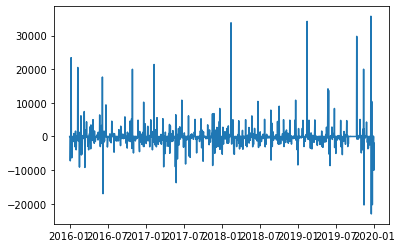

In [1054]:
from matplotlib import pyplot
pyplot.plot(transactions_clean_2016_2019_ser)
pyplot.show()

In [1056]:
# Lesson 03: Data Visualization

In [1058]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [1060]:
# 1. Time Series Line Plot

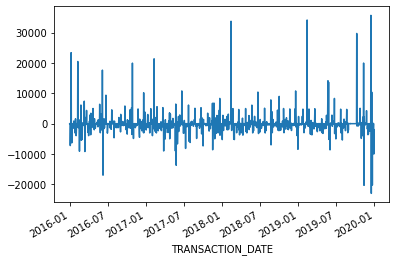

In [1061]:
from matplotlib import pyplot
transactions_clean_2016_2019_ser.plot()
pyplot.show()

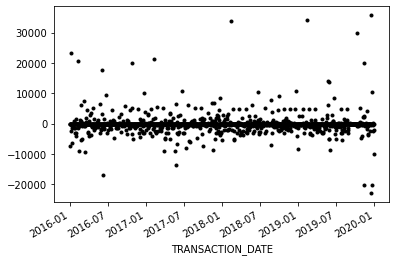

In [1062]:
transactions_clean_2016_2019_ser.plot(style='.', color='black')
pyplot.show()

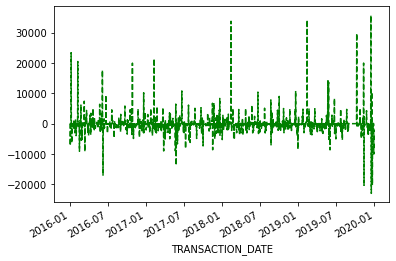

In [1064]:
transactions_clean_2016_2019_ser.plot(style='--', color='green')
pyplot.show()

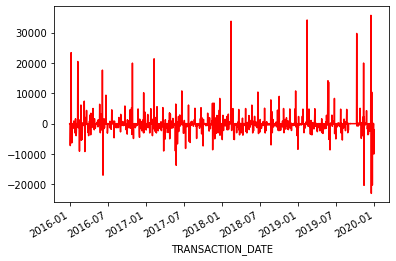

In [1065]:
transactions_clean_2016_2019_ser.plot(style='-', color='red')
pyplot.show()

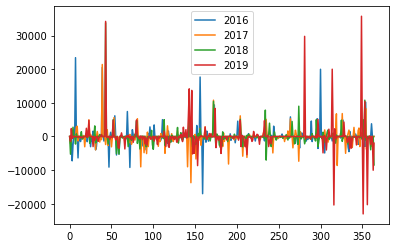

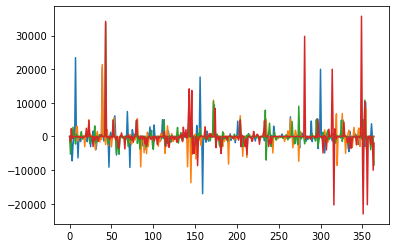

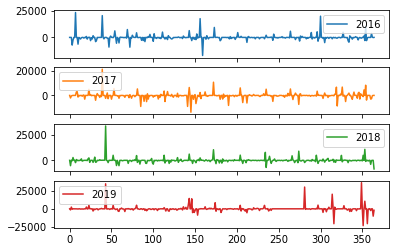

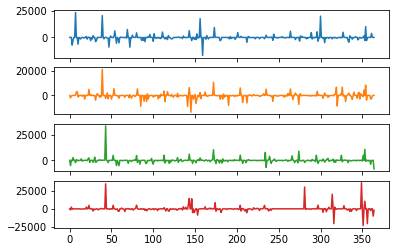

In [1067]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = transactions_clean_2016_2019_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=False, legend=True)
years.plot(subplots=False, legend=False)
years.plot(subplots=True, legend=True)
years.plot(subplots=True, legend=False)
pyplot.show()

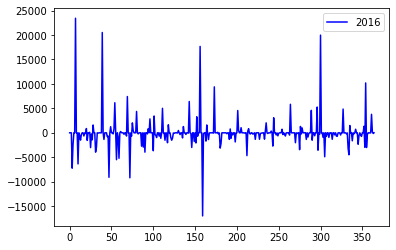

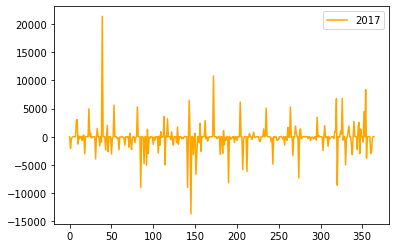

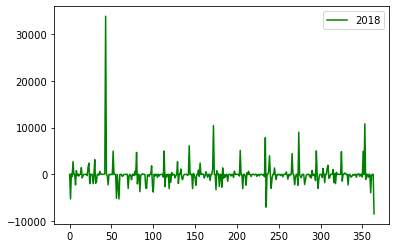

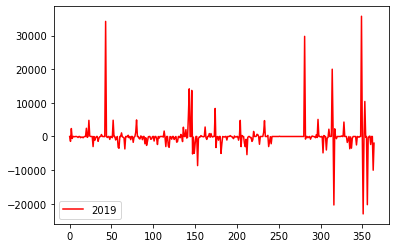

In [1069]:
position = range(0,4)
color = ['blue','orange','green','red','purple','brown']

for i,j in zip(position,color):
    years.iloc[:,i].plot(color=j, legend=True)
    pyplot.show()

In [1070]:
# 2. Time Series Histogram and Density Plots

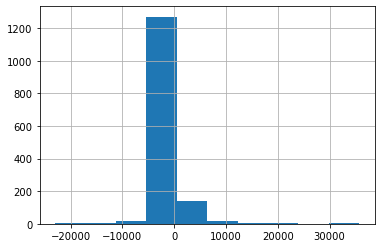

In [1071]:
from matplotlib import pyplot
transactions_clean_2016_2019_ser.hist()
pyplot.show()

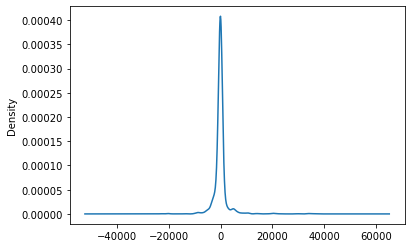

In [1072]:
from matplotlib import pyplot
transactions_clean_2016_2019_ser.plot(kind='kde')
pyplot.show()

In [1074]:
# 3. Time Series Box and Whisker Plots by Interval

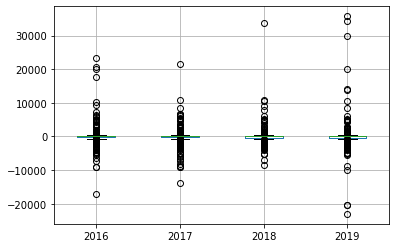

In [1075]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = transactions_clean_2016_2019_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

In [1076]:
transactions_clean_2016_2019_ser.describe()

count     1460.000000
mean       -36.972788
std       3106.788820
min     -23013.500000
25%       -328.380000
50%          0.000000
75%          0.000000
max      35741.500000
Name: AMOUNT, dtype: float64

Año:2016


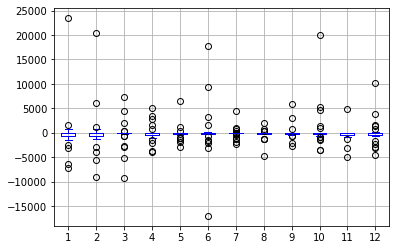

Año:2017


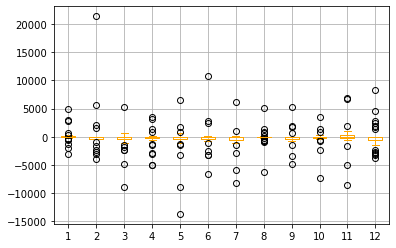

Año:2018


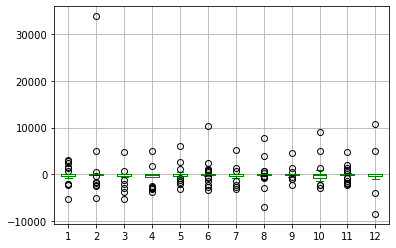

Año:2019


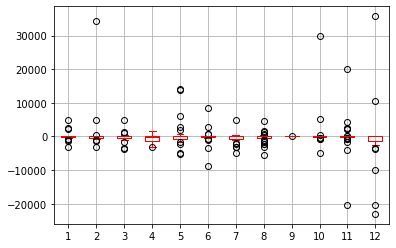

In [1078]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
color = ['blue','orange','green','red','purple','brown']
times = ['2016','2017', '2018', '2019']
for n,j in zip(times,color):
    one_year = transactions_clean_2016_2019_ser[n]
    groups = one_year.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = range(1,13)
    print('Año:' + n)
    months.boxplot(color=j)
    pyplot.show()

In [1079]:
# 4. Time Series Heat Maps

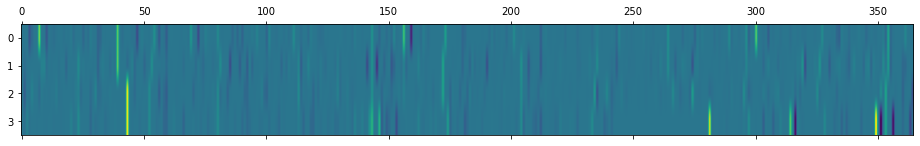

In [1080]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = transactions_clean_2016_2019_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

In [1081]:
"""
Se puede apreciar algo de estacionalidad en las transacciones de acuerdo a las lineas verticales amarillas, verde claras y
azul oscuro.
"""

'\nSe puede apreciar algo de estacionalidad en las transacciones de acuerdo a las lineas verticales amarillas, verde claras y\nazul oscuro.\n'

year 2016


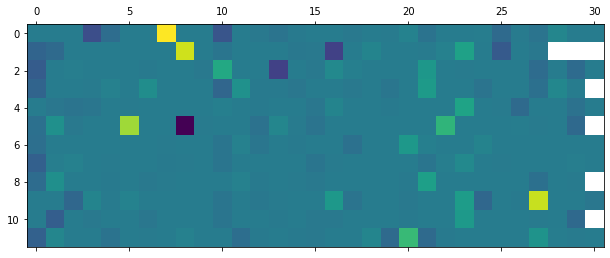

year 2017


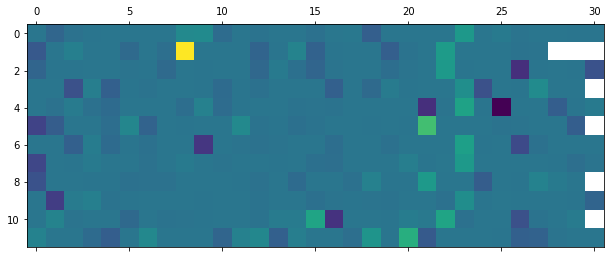

year 2018


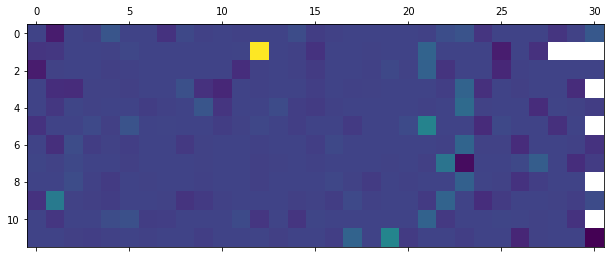

year 2019


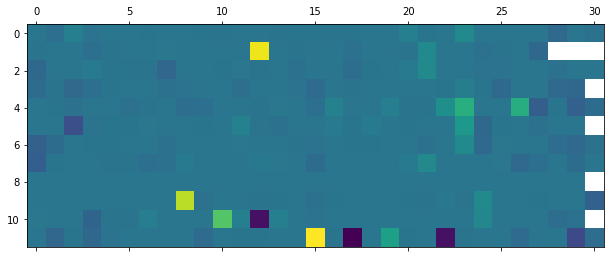

In [1082]:
from pandas import read_csv
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
times = ['2016','2017', '2018', '2019']
for n in times:
    one_year = transactions_clean_2016_2019_ser[n]
    groups = one_year.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = range(1,13)
    months = months.T
    print('year ' + n)
    pyplot.matshow(months, interpolation=None, aspect='auto')
    pyplot.show()

In [1083]:
"""
En los heat maps por meses se puede aprueciar estiacionalidad en ingreros entre los dias 20 y 25 de cada mes
"""

'\nEn los heat maps por meses se puede aprueciar estiacionalidad en ingreros entre los dias 20 y 25 de cada mes\n'

In [1084]:
# 5. Time Series Lag Scatter Plots

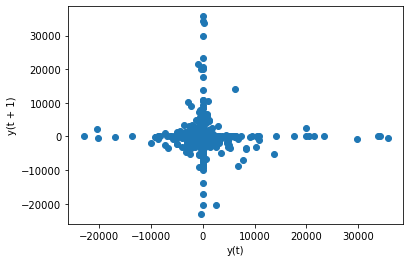

In [1085]:
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(transactions_clean_2016_2019_ser)
pyplot.show()

In [1086]:
"""
No se aprecia ningun tipo de correlacion entre y(t+1) e y(t)
"""

'\nNo se aprecia ningun tipo de correlacion entre y(t+1) e y(t)\n'

t+1 vs t-1


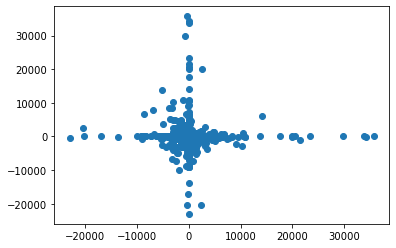

t+1 vs t-2


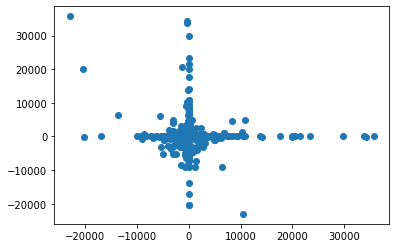

t+1 vs t-3


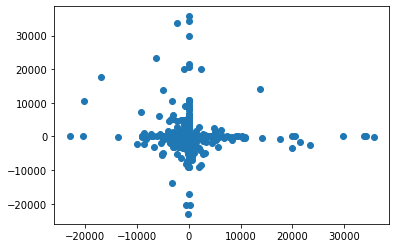

t+1 vs t-4


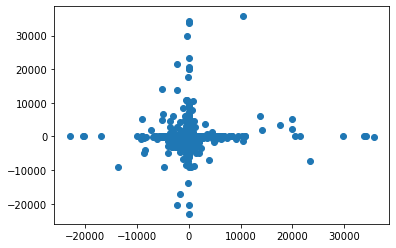

t+1 vs t-5


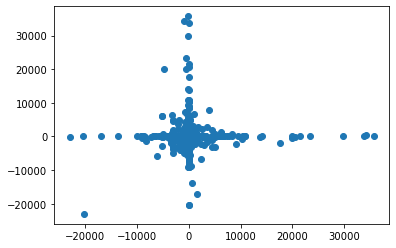

t+1 vs t-6


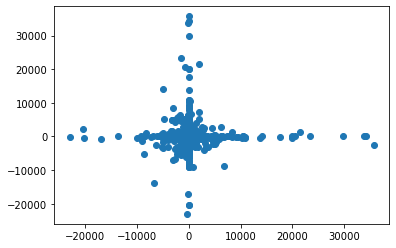

t+1 vs t-7


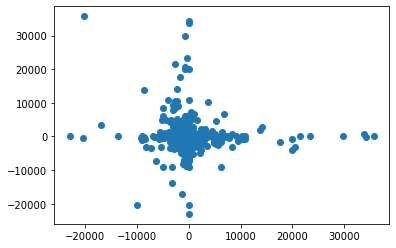

t+1 vs t-8


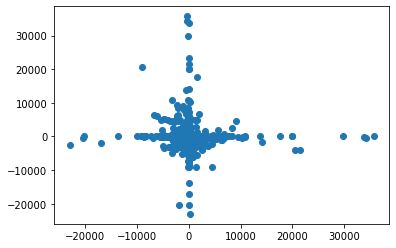

t+1 vs t-9


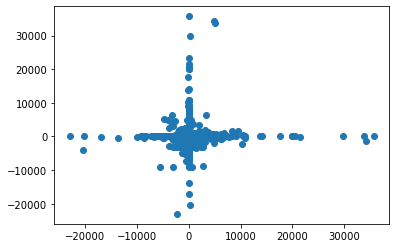

t+1 vs t-10


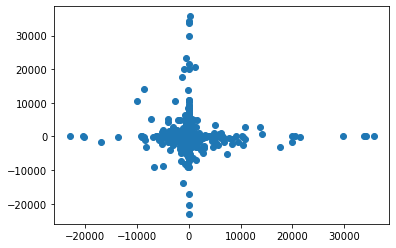

t+1 vs t-11


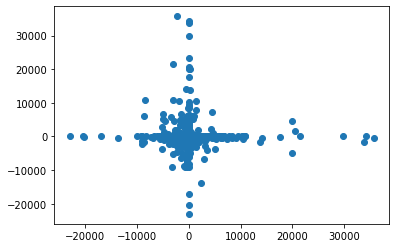

t+1 vs t-12


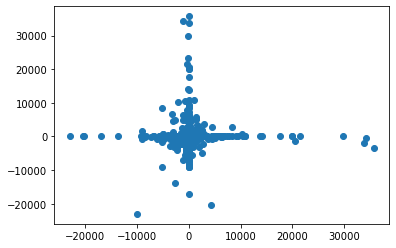

In [1087]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
values = DataFrame(transactions_clean_2016_2019_ser.values)
lags = 12
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [1088]:
"""
No se aprecia correlacion entre y(t+1) y sus 12 lags anteriores
"""

'\nNo se aprecia correlacion entre y(t+1) y sus 12 lags anteriores\n'

In [1089]:
# 6. Time Series Autocorrelation Plots

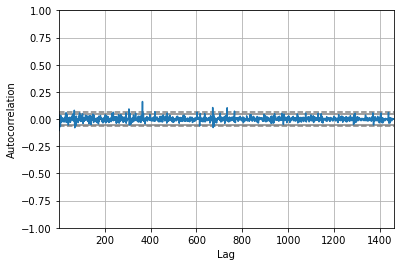

In [1090]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(transactions_clean_2016_2019_ser)
pyplot.show()

In [1091]:
"""
No se aprecia autocorrelacion entre y(t+1) y cualquiera de sus lags anteriores.
Como mucho con y(t-365) aproximadamente pero vemos q es coeficiente de correlacion es inferior a 0.25
"""

'\nNo se aprecia autocorrelacion entre y(t+1) y cualquiera de sus lags anteriores.\nComo mucho con y(t-365) aproximadamente pero vemos q es coeficiente de correlacion es inferior a 0.25\n'

In [1092]:
"""
A CONTINUACION RECONSTRUIMOS EL BALANCE DE LA CUENTA A PARTIR DEL HISTORICO DE MOVIMIENTOS ANTERIORES
"""

'\nA CONTINUACION RECONSTRUIMOS EL BALANCE DE LA CUENTA A PARTIR DEL HISTORICO DE MOVIMIENTOS ANTERIORES\n'

In [1096]:
"""
recuperamos el dataset 'transactions_clean_2016_2019.csv'
"""

"\nrecuperamos el dataset 'transactions_clean_2016_2019.csv'\n"

In [1097]:
transactions_clean_2016_2019_ser = read_csv('transactions_clean_2016_2019.csv', header=0, index_col=0, parse_dates=True, \
                                            squeeze=True)

In [1098]:
transactions_clean_2016_2019_ser

TRANSACTION_DATE
2016-01-01        0.00
2016-01-02        0.00
2016-01-03        0.00
2016-01-04    -7234.23
2016-01-05    -2500.00
                ...   
2019-12-27    -2375.64
2019-12-28        0.00
2019-12-29        0.00
2019-12-30   -10023.91
2019-12-31    -1985.54
Name: AMOUNT, Length: 1460, dtype: float64

In [1099]:
transactions_clean_2016_2019_df = DataFrame(transactions_clean_2016_2019_ser)

In [1100]:
transactions_clean_2016_2019_df

AMOUNT
TRANSACTION_DATE          
2016-01-01            0.00
2016-01-02            0.00
2016-01-03            0.00
2016-01-04        -7234.23
2016-01-05        -2500.00
...                    ...
2019-12-27        -2375.64
2019-12-28            0.00
2019-12-29            0.00
2019-12-30       -10023.91
2019-12-31        -1985.54

[1460 rows x 1 columns]

In [1101]:
transactions_clean_2016_2019_df.reset_index(level=0, inplace=True)

In [1102]:
transactions_clean_2016_2019_df

TRANSACTION_DATE    AMOUNT
0          2016-01-01      0.00
1          2016-01-02      0.00
2          2016-01-03      0.00
3          2016-01-04  -7234.23
4          2016-01-05  -2500.00
...               ...       ...
1455       2019-12-27  -2375.64
1456       2019-12-28      0.00
1457       2019-12-29      0.00
1458       2019-12-30 -10023.91
1459       2019-12-31  -1985.54

[1460 rows x 2 columns]

In [1103]:
transactions_clean_2016_2019_df["DATE"]=transactions_clean_2016_2019_df["TRANSACTION_DATE"]

In [1104]:
transactions_clean_2016_2019_df

TRANSACTION_DATE    AMOUNT       DATE
0          2016-01-01      0.00 2016-01-01
1          2016-01-02      0.00 2016-01-02
2          2016-01-03      0.00 2016-01-03
3          2016-01-04  -7234.23 2016-01-04
4          2016-01-05  -2500.00 2016-01-05
...               ...       ...        ...
1455       2019-12-27  -2375.64 2019-12-27
1456       2019-12-28      0.00 2019-12-28
1457       2019-12-29      0.00 2019-12-29
1458       2019-12-30 -10023.91 2019-12-30
1459       2019-12-31  -1985.54 2019-12-31

[1460 rows x 3 columns]

In [1106]:
transactions_clean_2016_2019_df["BALANCE"]=0

In [1107]:
transactions_clean_2016_2019_df

TRANSACTION_DATE    AMOUNT       DATE  BALANCE
0          2016-01-01      0.00 2016-01-01        0
1          2016-01-02      0.00 2016-01-02        0
2          2016-01-03      0.00 2016-01-03        0
3          2016-01-04  -7234.23 2016-01-04        0
4          2016-01-05  -2500.00 2016-01-05        0
...               ...       ...        ...      ...
1455       2019-12-27  -2375.64 2019-12-27        0
1456       2019-12-28      0.00 2019-12-28        0
1457       2019-12-29      0.00 2019-12-29        0
1458       2019-12-30 -10023.91 2019-12-30        0
1459       2019-12-31  -1985.54 2019-12-31        0

[1460 rows x 4 columns]

In [1108]:
transactions_clean_2016_2019_df.index[0], transactions_clean_2016_2019_df.index[-1]

(0, 1459)

In [1109]:
for i in range(transactions_clean_2016_2019_df.index[0],transactions_clean_2016_2019_df.index[-1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1110]:
for i in range(transactions_clean_2016_2019_df.index[0],transactions_clean_2016_2019_df.index[-1]):
    transactions_clean_2016_2019_df.loc[i+1,'BALANCE'] = transactions_clean_2016_2019_df.loc[i,'BALANCE'] + \
    transactions_clean_2016_2019_df.loc[i,'AMOUNT']

In [1111]:
transactions_clean_2016_2019_df

TRANSACTION_DATE    AMOUNT       DATE   BALANCE
0          2016-01-01      0.00 2016-01-01      0.00
1          2016-01-02      0.00 2016-01-02      0.00
2          2016-01-03      0.00 2016-01-03      0.00
3          2016-01-04  -7234.23 2016-01-04      0.00
4          2016-01-05  -2500.00 2016-01-05  -7234.23
...               ...       ...        ...       ...
1455       2019-12-27  -2375.64 2019-12-27 -39595.18
1456       2019-12-28      0.00 2019-12-28 -41970.82
1457       2019-12-29      0.00 2019-12-29 -41970.82
1458       2019-12-30 -10023.91 2019-12-30 -41970.82
1459       2019-12-31  -1985.54 2019-12-31 -51994.73

[1460 rows x 4 columns]

In [1112]:
transactions_clean_2016_2019_df=transactions_clean_2016_2019_df.drop(['TRANSACTION_DATE','AMOUNT'], axis = 1)

In [1113]:
transactions_clean_2016_2019_df

DATE   BALANCE
0    2016-01-01      0.00
1    2016-01-02      0.00
2    2016-01-03      0.00
3    2016-01-04      0.00
4    2016-01-05  -7234.23
...         ...       ...
1455 2019-12-27 -39595.18
1456 2019-12-28 -41970.82
1457 2019-12-29 -41970.82
1458 2019-12-30 -41970.82
1459 2019-12-31 -51994.73

[1460 rows x 2 columns]

In [1115]:
balance_clean_2016_2019_df=transactions_clean_2016_2019_df

In [1117]:
del(transactions_clean_2016_2019_df)

In [1118]:
balance_clean_2016_2019_df

DATE   BALANCE
0    2016-01-01      0.00
1    2016-01-02      0.00
2    2016-01-03      0.00
3    2016-01-04      0.00
4    2016-01-05  -7234.23
...         ...       ...
1455 2019-12-27 -39595.18
1456 2019-12-28 -41970.82
1457 2019-12-29 -41970.82
1458 2019-12-30 -41970.82
1459 2019-12-31 -51994.73

[1460 rows x 2 columns]

In [1119]:
balance_clean_2016_2019_df=balance_clean_2016_2019_df.set_index(balance_clean_2016_2019_df.iloc[:,0])

In [1120]:
balance_clean_2016_2019_df

DATE   BALANCE
DATE                           
2016-01-01 2016-01-01      0.00
2016-01-02 2016-01-02      0.00
2016-01-03 2016-01-03      0.00
2016-01-04 2016-01-04      0.00
2016-01-05 2016-01-05  -7234.23
...               ...       ...
2019-12-27 2019-12-27 -39595.18
2019-12-28 2019-12-28 -41970.82
2019-12-29 2019-12-29 -41970.82
2019-12-30 2019-12-30 -41970.82
2019-12-31 2019-12-31 -51994.73

[1460 rows x 2 columns]

In [1121]:
balance_clean_2016_2019_df=balance_clean_2016_2019_df.drop(['DATE'], axis = 1)

In [1122]:
balance_clean_2016_2019_df

BALANCE
DATE                
2016-01-01      0.00
2016-01-02      0.00
2016-01-03      0.00
2016-01-04      0.00
2016-01-05  -7234.23
...              ...
2019-12-27 -39595.18
2019-12-28 -41970.82
2019-12-29 -41970.82
2019-12-30 -41970.82
2019-12-31 -51994.73

[1460 rows x 1 columns]

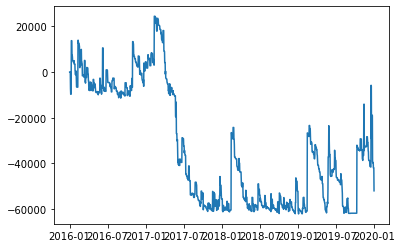

In [1123]:
pyplot.plot(balance_clean_2016_2019_df)
pyplot.show()

In [1124]:
"""
recuperamos la serie del balance original para ver que valor tenia el 2019-12-31 y asi saber el offset que le tengo que sumar
a balance_clean_2016_2019_df para q ambas series tengan el mismo valor el 2019-12-31
"""

'\nrecuperamos la serie del balance original para ver que valor tenia el 2019-12-31 y asi saber el offset que le tengo que sumar\na balance_clean_2016_2019_df para q ambas series tengan el mismo valor el 2019-12-31\n'

In [1125]:
balance_original_ser = read_csv('balance_original.csv', header=0, index_col=0, parse_dates=True, \
                                            squeeze=True)

In [1126]:
balance_original_ser

DATE
2014-03-03    24493.44
2014-03-04    56790.85
2014-03-05    56720.85
2014-03-06    56699.85
2014-03-07    56699.85
                ...   
2021-02-05     1407.45
2021-02-06      956.59
2021-02-07      956.59
2021-02-08      956.59
2021-02-09      650.59
Name: BALANCE, Length: 2536, dtype: float64

In [1127]:
balance_original_ser['2019-12-31']

27768.49000000005

In [ ]:
"""
Como balance_original_ser['2019-12-31']==27768.49000000005 y balance_clean_2016_2019_ser['2019-12-31']==-51994.73
entonces para q balance_clean_2016_2019_ser['2019-12-31']==27768.49000000005 tengo que sumar a la columna balance la cantidad
de: 51994.73 + 27768.49000000005 = 79763.22000000005
"""

In [1128]:
balance_clean_2016_2019_df['BALANCE'] = balance_clean_2016_2019_df['BALANCE'] + 79763.22000000005

In [1129]:
balance_clean_2016_2019_df

BALANCE
DATE                
2016-01-01  79763.22
2016-01-02  79763.22
2016-01-03  79763.22
2016-01-04  79763.22
2016-01-05  72528.99
...              ...
2019-12-27  40168.04
2019-12-28  37792.40
2019-12-29  37792.40
2019-12-30  37792.40
2019-12-31  27768.49

[1460 rows x 1 columns]

In [1130]:
del(balance_original_ser)

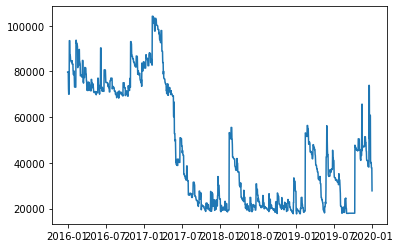

In [1132]:
pyplot.plot(balance_clean_2016_2019_df)
pyplot.show()

In [1134]:
"""
Me voy a guardar este dataframe y voy a probar prophet con el y si no saco muy buenos resultados probaré con el balance entre
2018-01-01 y 2019-12-31 en el que solo tengo una linea base y no dos.
Y luego hare estimacion trimestral por semanas en lugar de por dias a ver si asi sale mejor.
"""

'\nMe voy a guardar este dataframe y voy a probar prophet con el y si no saco muy buenos resultados probaré con el balance entre\n2018-01-01 y 2019-12-31 en el que solo tengo una linea base y no dos.\nY luego hare estimacion trimestral por semanas en lugar de por dias a ver si asi sale mejor.\n'

In [1135]:
balance_clean_2016_2019_df.to_csv(path_or_buf='balance_clean_2016_2019.csv')

In [1144]:
# How to Load and Explore Time Series Data in Python
# https://machinelearningmastery.com/load-explore-time-series-data-python/

In [1147]:
# Number of Observations

In [1148]:
balance_clean_2016_2019_df.size

1460

In [1149]:
"""
Vemos q tenemos 4 años de 365 de datos --> 4 * 365 = 1460 dias
"""

'\nVemos q tenemos 4 años de 365 de datos --> 4 * 365 = 1460 dias\n'

In [1151]:
# Descriptive Statistics

In [1152]:
balance_clean_2016_2019_df.describe()

BALANCE
count    1460.000000
mean    46702.140712
std     25965.335340
min     17660.610000
25%     21613.665000
50%     38875.990000
75%     72644.650000
max    104161.650000

In [1153]:
"""
A priori esta distribucion de datos parece más razonable y se puede parecer más a una distribución normal que es más 
fácilmente modelizable por más métodos
"""

'\nA priori esta distribucion de datos parece más razonable y se puede parecer más a una distribución normal que es más \nfácilmente modelizable por más métodos\n'

In [1154]:
# Plotting Time Series

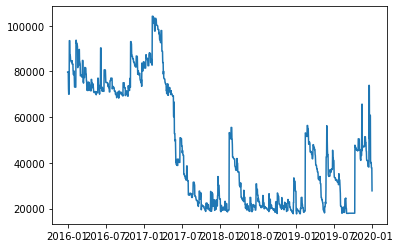

In [1160]:
from matplotlib import pyplot
pyplot.plot(balance_clean_2016_2019_df)
pyplot.show()

In [1161]:
balance_clean_2016_2019_ser = balance_clean_2016_2019_df.T.squeeze()

In [1162]:
balance_clean_2016_2019_ser

DATE
2016-01-01    79763.22
2016-01-02    79763.22
2016-01-03    79763.22
2016-01-04    79763.22
2016-01-05    72528.99
                ...   
2019-12-27    40168.04
2019-12-28    37792.40
2019-12-29    37792.40
2019-12-30    37792.40
2019-12-31    27768.49
Name: BALANCE, Length: 1460, dtype: float64

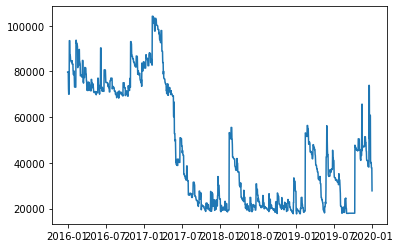

In [1163]:
from matplotlib import pyplot
pyplot.plot(balance_clean_2016_2019_ser)
pyplot.show()

In [1164]:
"""
Vemos que parece que la serie tiene algo de estacionalidad y dos lineas base planas alrededor de 80000 eur hasta 2017 y de 
20000 eur a partir de 2018. Ya que durante 2017 la linea base tiene una bajada 60000 eur.

Primero vamos a intentar modelizar la serie teniendo en cuenta los 4 años 2016, 2017, 2018 y 2019 y si vemos que no obtenemos
resultados razonables utilizaremos solo los años 2018 y 2019 para estimar valores de la serie temporal.

Otra aproximación sería no incluir el año 2017 en el estudio y estimar la serie temporal a partir de los valores 2016, 2018 y 
2019.
"""

'\nVemos que parece que la serie tiene algo de estacionalidad y dos lineas base planas alrededor de 80000 eur hasta 2017 y de \n20000 eur a partir de 2018. Ya que durante 2017 la linea base tiene una bajada 60000 eur.\n\nPrimero vamos a intentar modelizar la serie teniendo en cuenta los 4 años 2016, 2017, 2018 y 2019 y si vemos que no obtenemos\nresultados razonables utilizaremos solo los años 2018 y 2019 para estimar valores de la serie temporal.\n\nOtra aproximación sería no incluir el año 2017 en el estudio y estimar la serie temporal a partir de los valores 2016, 2018 y \n2019.\n'

In [1166]:
# Lesson 03: Data Visualization

In [1167]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [1168]:
# 1. Time Series Line Plot

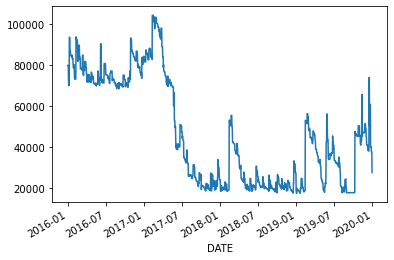

In [1169]:
from pandas import read_csv
from matplotlib import pyplot
balance_clean_2016_2019_ser.plot()
pyplot.show()

In [1170]:
"""
REPETIMOS EL COMENTARIO ANTERIOR QUE AHORA SE VE MUCHO MEJOR:

Vemos que parece que la serie tiene algo de estacionalidad y dos lineas base planas alrededor de 80000 eur hasta 2017 y de 
20000 eur a partir de 2018. Ya que durante 2017 la linea base tiene una bajada 60000 eur.

Primero vamos a intentar modelizar la serie teniendo en cuenta los 4 años 2016, 2017, 2018 y 2019 y si vemos que no obtenemos
resultados razonables utilizaremos solo los años 2018 y 2019 para estimar valores de la serie temporal.

Otra aproximación sería no incluir el año 2017 en el estudio y estimar la serie temporal a partir de los valores 2016, 2018 y 
2019.
"""

'\nREPETIMOS EL COMENTARIO ANTERIOR QUE AHORA SE VE MUCHO MEJOR:\n\nVemos que parece que la serie tiene algo de estacionalidad y dos lineas base planas alrededor de 80000 eur hasta 2017 y de \n20000 eur a partir de 2018. Ya que durante 2017 la linea base tiene una bajada 60000 eur.\n\nPrimero vamos a intentar modelizar la serie teniendo en cuenta los 4 años 2016, 2017, 2018 y 2019 y si vemos que no obtenemos\nresultados razonables utilizaremos solo los años 2018 y 2019 para estimar valores de la serie temporal.\n\nOtra aproximación sería no incluir el año 2017 en el estudio y estimar la serie temporal a partir de los valores 2016, 2018 y \n2019.\n'

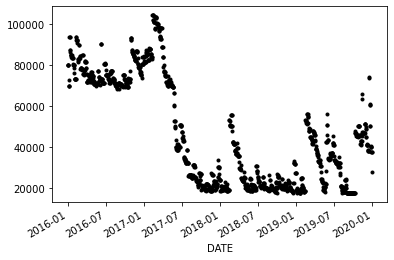

In [1173]:
balance_clean_2016_2019_ser.plot(style='.', color='black')
pyplot.show()

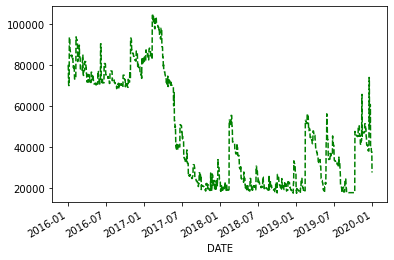

In [1176]:
balance_clean_2016_2019_ser.plot(style='--', color='green')
pyplot.show()

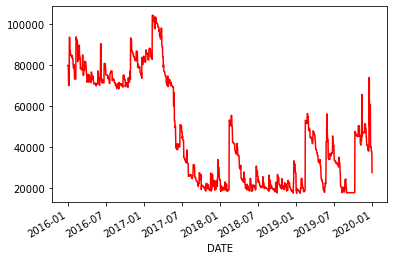

In [1178]:
balance_clean_2016_2019_ser.plot(style='-', color='red')
pyplot.show()

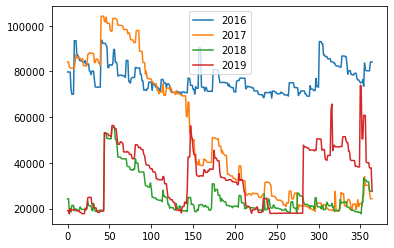

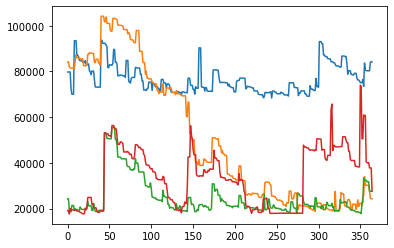

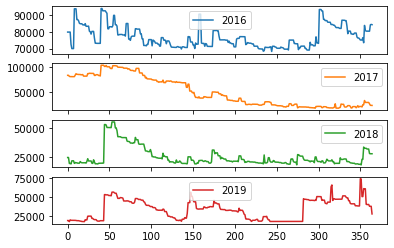

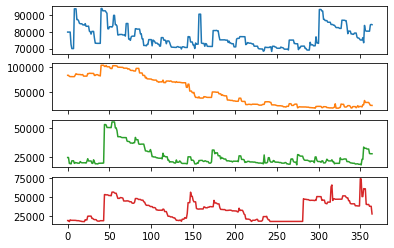

In [1179]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = balance_clean_2016_2019_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=False, legend=True)
years.plot(subplots=False, legend=False)
years.plot(subplots=True, legend=True)
years.plot(subplots=True, legend=False)
pyplot.show()

In [1183]:
"""
Vemos que los años 2016, 2018 y 2019 se parecen más o menos y tienen cierta estacionalidad.
Incluso el año 2017 se parece bastante a los anteriores salvo por el bajon que pega entre los dias 75 y 275 que es lo que
provoca que hasta el 2017 tengamos un baseline plano de 80000 eur y a partir de 2018 tengamos un baseline plano de 20000 eur.
"""

'\nVemos que los años 2016, 2018 y 2019 se parecen más o menos y tienen cierta estacionalidad.\nIncluso el año 2017 se parece bastante a los anteriores salvo por el bajon que pega entre los dias 75 y 275 que es lo que\nprovoca que hasta el 2017 tengamos un baseline plano de 80000 eur y a partir de 2018 tengamos un baseline plano de 20000 eur.\n'

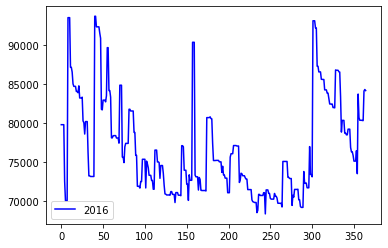

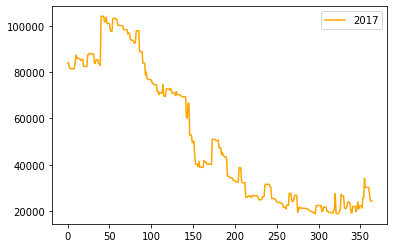

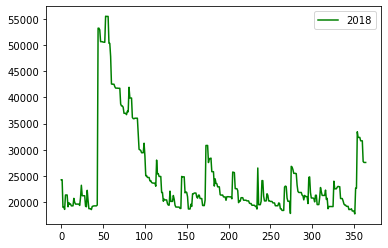

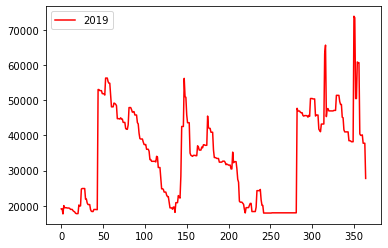

In [1182]:
position = range(0,4)
color = ['blue','orange','green','red','purple','brown']

for i,j in zip(position,color):
    years.iloc[:,i].plot(color=j, legend=True)
    pyplot.show()

In [1184]:
"""
Viendo los 4 años de datos en detalle y por separado vemos que hay bastante oscilacion en los datos de los distintos años:
En 2016 entre 70000 y 100000 eur.
En 2017 entre 100000 y 20000 eur aunque vemos que hay menos cambios repentinos de datos y una trend muy clara con una pendiente
negativa que sería fácilmente modelizable.
En 2018 alrededor del dia 50 hay una oscilacion entre 20000 y 55000 eur.
En 2019 tambien tenemos esas oscilaciones entre 20000 y 55000 eur e incluso una también alrededor del dia 50 y un cambio de
baseline en el dia 275 de 20000 a 50000 eur.

Como más o menos los 4 años son igual de cambiantes y caoticos a lo mejor prophet puede sacar tendencias en la serie temporal 
que forman.
"""

'\nViendo los 4 años de datos en detalle y por separado vemos que hay bastante oscilacion en los datos de los distintos años:\nEn 2016 entre 70000 y 100000 eur.\nEn 2017 entre 100000 y 20000 eur aunque vemos que hay menos cambios repentinos de datos y una trend muy clara con una pendiente\nnegativa que sería fácilmente modelizable.\nEn 2018 alrededor del dia 50 hay una oscilacion entre 20000 y 55000 eur.\nEn 2019 tambien tenemos esas oscilaciones entre 20000 y 55000 eur e incluso una también alrededor del dia 50 y un cambio de\nbaseline en el dia 275 de 20000 a 50000 eur.\n\nComo más o menos los 4 años son igual de cambiantes y caoticos a lo mejor prophet puede sacar tendencias en la serie temporal \nque forman.\n'

In [1185]:
# 2. Time Series Histogram and Density Plots

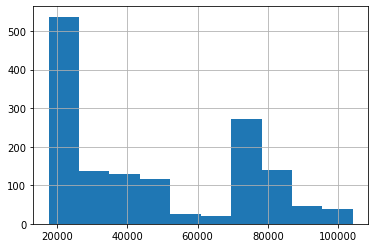

In [1186]:
from matplotlib import pyplot
balance_clean_2016_2019_ser.hist()
pyplot.show()

In [1187]:
"""
Confirmando nuestras hipotesis anteriores vemos que esta distribucion de datos tiene dos picos.
Uno alrededor de 20000 eur y otro alrededor de 70000 eur o sea que sería dificilmente modelizable con modelos que asuman que
la distribucion de datos es gausiana.

Volviendo a confirmar mis sospechas a lo mejor sería más fácil modelizar la serie temporal teniendo en cuenta sólo los años 
2018 y 2019.
"""

'\nConfirmando nuestras hipotesis anteriores vemos que esta distribucion de datos tiene dos picos.\nUno alrededor de 20000 eur y otro alrededor de 70000 eur o sea que sería dificilmente modelizable con modelos que asuman que\nla distribucion de datos es gausiana.\n\nVolviendo a confirmar mis sospechas a lo mejor sería más fácil modelizar la serie temporal teniendo en cuenta sólo los años \n2018 y 2019.\n'

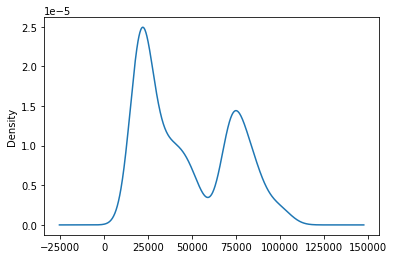

In [1189]:
from pandas import read_csv
from matplotlib import pyplot
balance_clean_2016_2019_ser.plot(kind='kde')
pyplot.show()

In [1190]:
"""
El density plot unicamente confirma lo que ya hemos dicho en el comentario anterior.

Esta distribucion de datos tiene dos picos.
Uno alrededor de 20000 eur y otro alrededor de 70000 eur o sea que sería dificilmente modelizable con modelos que asuman que
la distribucion de datos es gausiana.

Volviendo a confirmar mis sospechas a lo mejor sería más fácil modelizar la serie temporal teniendo en cuenta sólo los años 
2018 y 2019.
"""

'\nEl density plot unicamente confirma lo que ya hemos dicho en el comentario anterior.\n\nEsta distribucion de datos tiene dos picos.\nUno alrededor de 20000 eur y otro alrededor de 70000 eur o sea que sería dificilmente modelizable con modelos que asuman que\nla distribucion de datos es gausiana.\n\nVolviendo a confirmar mis sospechas a lo mejor sería más fácil modelizar la serie temporal teniendo en cuenta sólo los años \n2018 y 2019.\n'

In [1191]:
balance_clean_2016_2019_ser.describe()

count      1460.000000
mean      46702.140712
std       25965.335340
min       17660.610000
25%       21613.665000
50%       38875.990000
75%       72644.650000
max      104161.650000
Name: BALANCE, dtype: float64

In [1192]:
# 3. Time Series Box and Whisker Plots by Interval

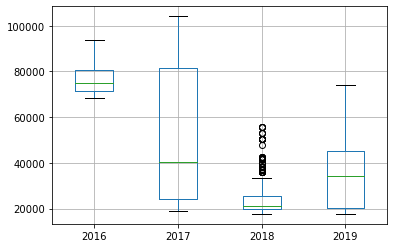

In [1193]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = balance_clean_2016_2019_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

In [1194]:
"""
Vemos que los 4 años tienen distribuciones muy distintas.
Aunque quiza 2018 y 2019 se parezce ya que vemos que los outliers de 2018 pueden encajar en el 3er cuartil y el bigote superior
de 2019.
Además si la mediana de 2016 la bajásemos a 20000 eur su boxplot y, por tanto su distribución se parecería bastante a la
distribución de datos de 2018 y 2019.
"""

'\nVemos que los 4 años tienen distribuciones muy distintas.\nAunque quiza 2018 y 2019 se parezce ya que vemos que los outliers de 2018 pueden encajar en el 3er cuartil y el bigote superior\nde 2019.\nAdemás si la mediana de 2016 la bajásemos a 20000 eur su boxplot y, por tanto su distribución se parecería bastante a la\ndistribución de datos de 2018 y 2019.\n'

Año:2016


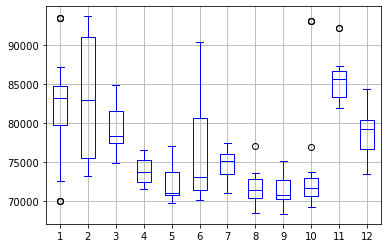

Año:2017


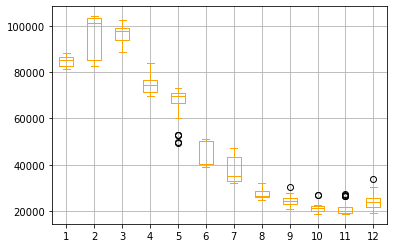

Año:2018


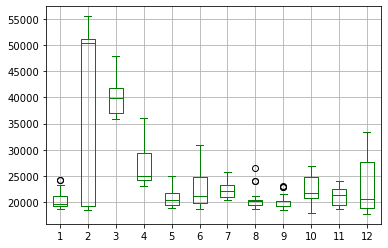

Año:2019


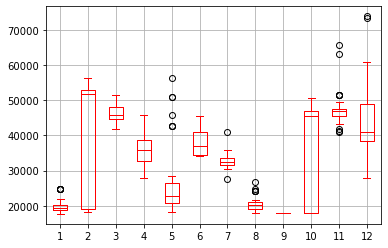

In [1196]:
# create a boxplot of monthly data
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
color = ['blue','orange','green','red','purple','brown']
times = ['2016','2017', '2018', '2019']
for n,j in zip(times,color):
    one_year = balance_clean_2016_2019_ser[n]
    groups = one_year.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = range(1,13)
    print('Año:' + n)
    months.boxplot(color=j)
    pyplot.show()

In [1197]:
"""
Vemos que los 9 primeros meses de 2018 y 2019 se parecen muchisimo e incluso con los 9 primeros meses de 2016 salvo que la
baseline de 2016 está en un rango de datos distinto.

Los 3 ultimos meses de 2016 y 2020 tambien se parecen mucho a pesar de estar en baselines distintos.
"""

'\nVemos que los 9 primeros meses de 2018 y 2019 se parecen muchisimo e incluso con los 9 primeros meses de 2016 salvo que la\nbaseline de 2016 está en un rango de datos distinto.\n\nLos 3 ultimos meses de 2016 y 2020 tambien se parecen mucho a pesar de estar en baselines distintos.\n'

In [1199]:
"""
De acuerdo a este analisis casi seguro que lo que voy a hacer es recrear el balance solo con los datos de las transacciones 
de 2016, 2018 y 2019
"""

'\nDe acuerdo a este analisis casi seguro que lo que voy a hacer es recrear el balance solo con los datos de las transacciones \nde 2016, 2018 y 2019\n'

In [1200]:
# 4. Time Series Heat Maps

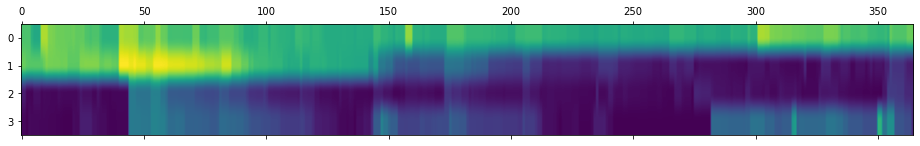

In [1202]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
groups = balance_clean_2016_2019_ser.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

In [1203]:
"""
Apreciamos muy claramente la bajada de valores en 2017.
Vemos que 2016 está en un baseline distinto a 2017 y 2018.
No obstante podemos apreciar similitudes estacionales en 2016, 2018 y 2019 sobretodo en los dias 50, 150,300 y quiza 350.
"""

'\nApreciamos muy claramente la bajada de valores en 2017.\nVemos que 2016 está en un baseline distinto a 2017 y 2018.\nNo obstante podemos apreciar similitudes estacionales en 2016, 2018 y 2019 sobretodo en los dias 50, 150,300 y quiza 350.\n'

year 2016


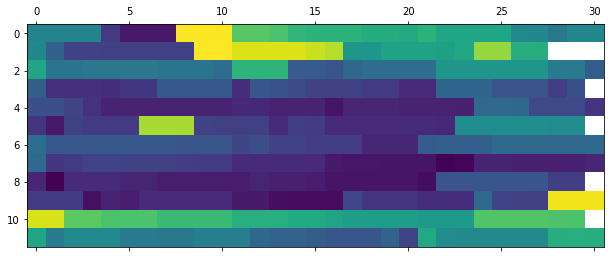

year 2017


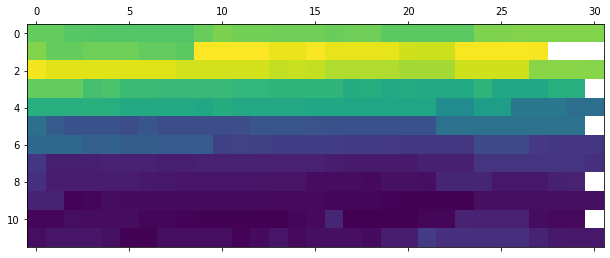

year 2018


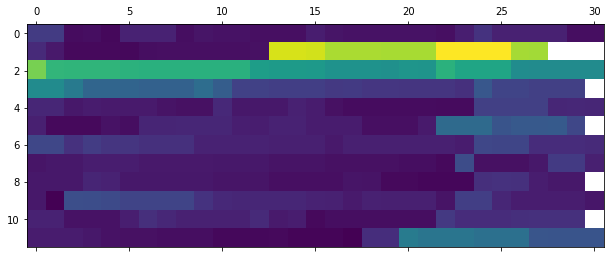

year 2019


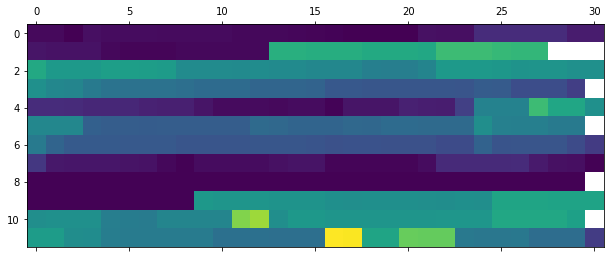

In [1204]:
from pandas import read_csv
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
times = ['2016','2017', '2018', '2019']
for n in times:
    one_year = balance_clean_2016_2019_ser[n]
    groups = one_year.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = range(1,13)
    months = months.T
    print('year ' + n)
    pyplot.matshow(months, interpolation=None, aspect='auto')
    pyplot.show()

In [1205]:
"""
Vemos como, más o menos, en los años 2016, 2018 y 2019 hay cierta estacionalidad con ingresos en los meses 2-3, 5-6, 10-11.

Una vez más, 2017 es un caso aparte donde apreciamos la gran bajada de saldo entre los meses 0 y 6.
"""

'\nVemos como, más o menos, en los años 2016, 2018 y 2019 hay cierta estacionalidad con ingresos en los meses 2-3, 5-6, 10-11.\n\nUna vez más, 2017 es un caso aparte donde apreciamos la gran bajada de saldo entre los meses 0 y 6.\n'

In [1206]:
# 5. Time Series Lag Scatter Plots

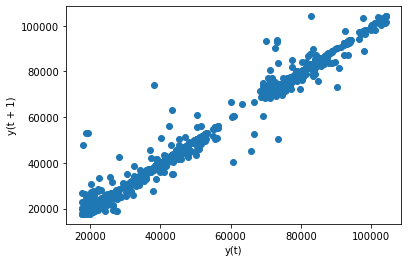

In [1208]:
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(balance_clean_2016_2019_ser)
pyplot.show()

In [1209]:
"""
Afortunadamente vemos que hay una gran correlacion positiva entre y(t+1) e y(t)
"""

'\nAfortunadamente vemos que hay una gran correlacion positiva entre y(t+1) e y(t)\n'

t+1 vs t-1


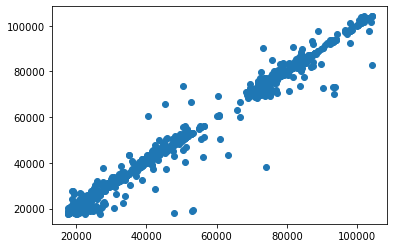

t+1 vs t-2


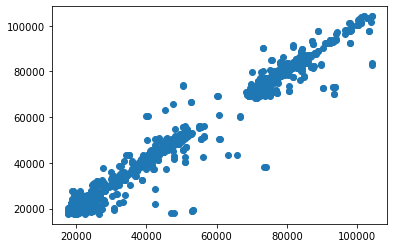

t+1 vs t-3


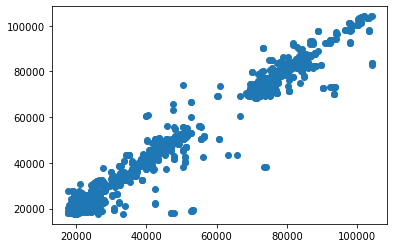

t+1 vs t-4


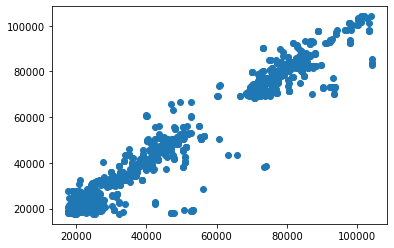

t+1 vs t-5


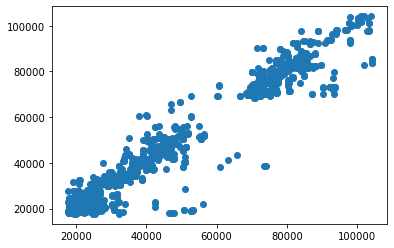

t+1 vs t-6


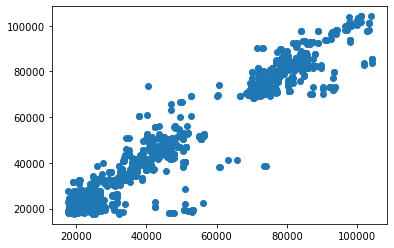

t+1 vs t-7


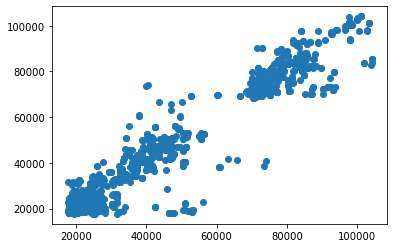

t+1 vs t-8


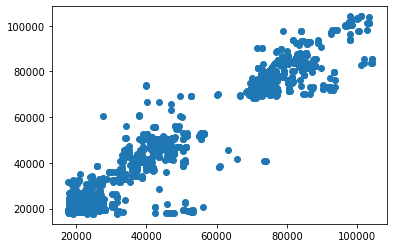

t+1 vs t-9


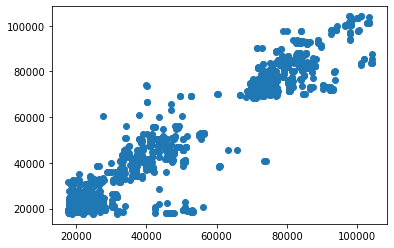

t+1 vs t-10


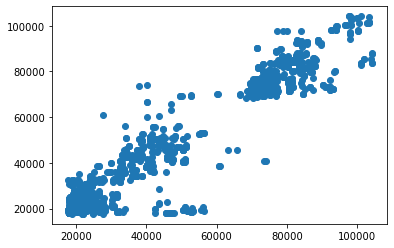

t+1 vs t-11


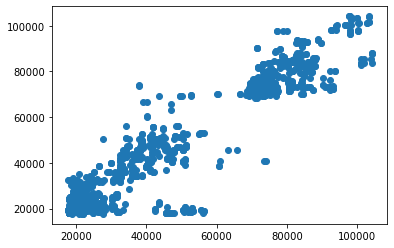

t+1 vs t-12


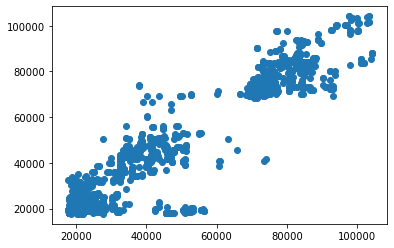

t+1 vs t-13


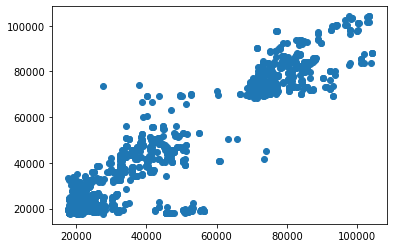

t+1 vs t-14


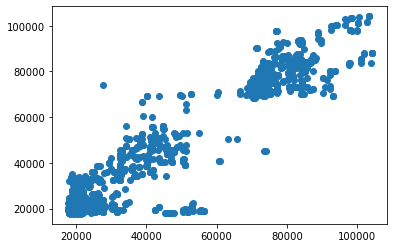

t+1 vs t-15


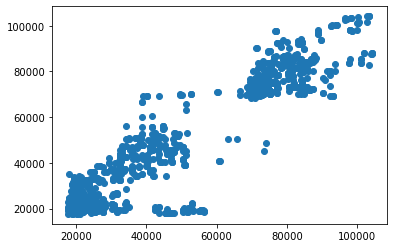

t+1 vs t-16


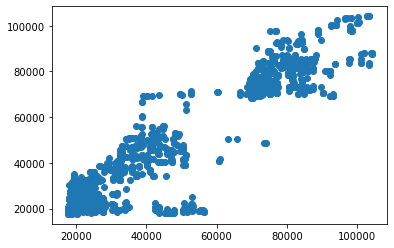

t+1 vs t-17


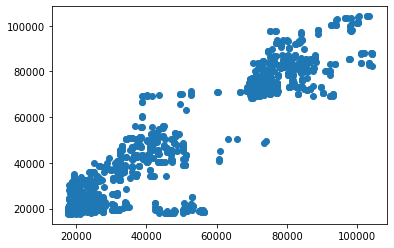

t+1 vs t-18


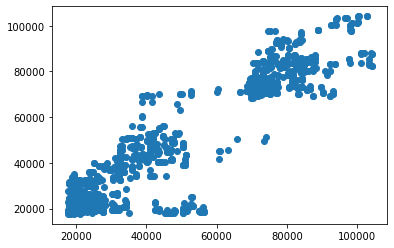

t+1 vs t-19


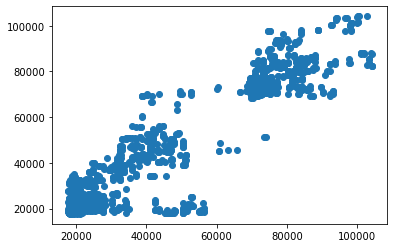

t+1 vs t-20


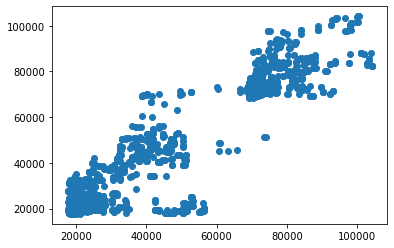

t+1 vs t-21


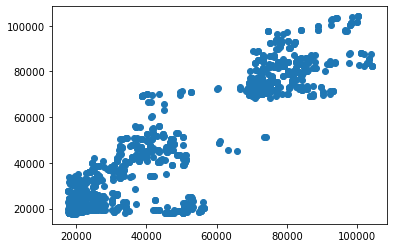

t+1 vs t-22


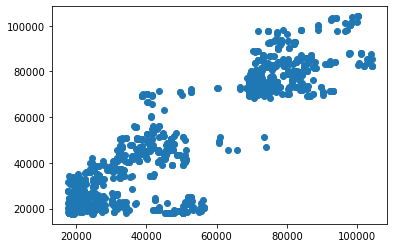

t+1 vs t-23


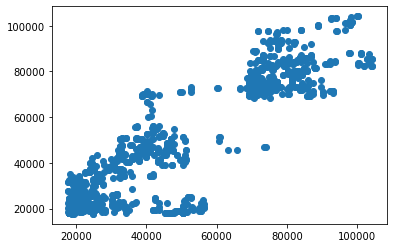

t+1 vs t-24


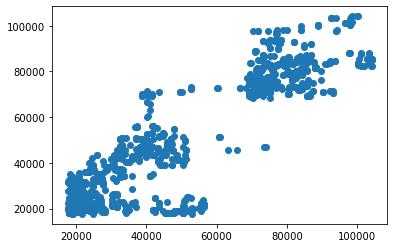

t+1 vs t-25


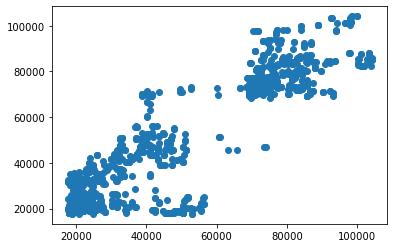

t+1 vs t-26


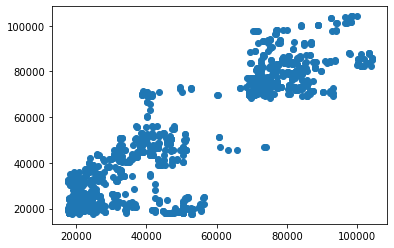

t+1 vs t-27


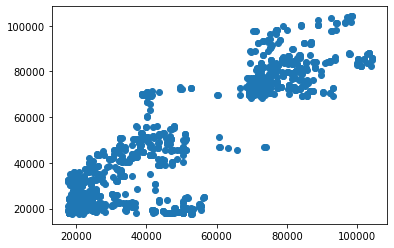

t+1 vs t-28


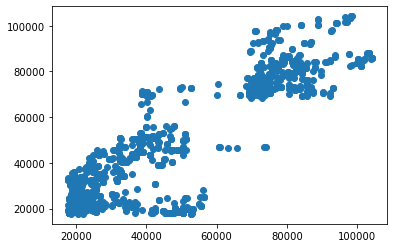

t+1 vs t-29


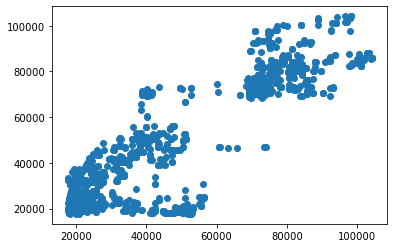

t+1 vs t-30


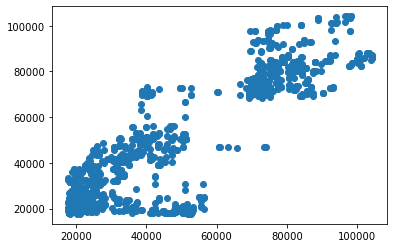

t+1 vs t-31


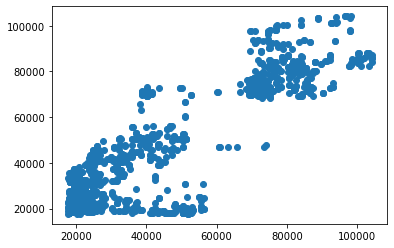

t+1 vs t-32


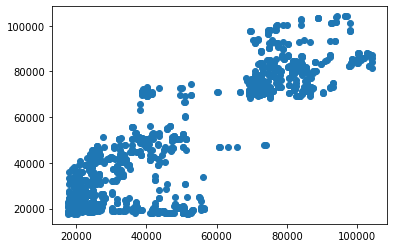

t+1 vs t-33


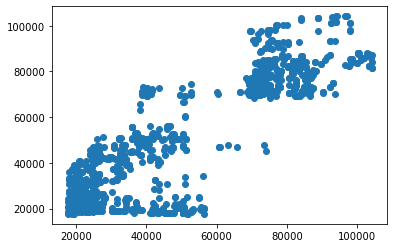

t+1 vs t-34


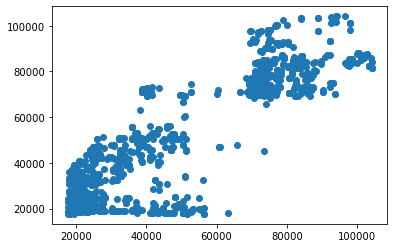

t+1 vs t-35


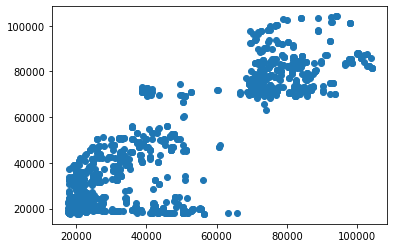

t+1 vs t-36


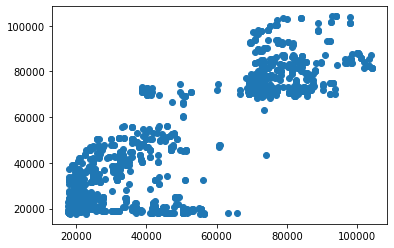

t+1 vs t-37


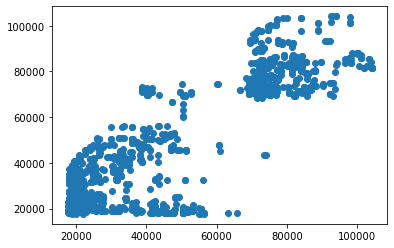

t+1 vs t-38


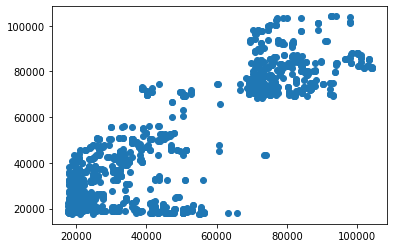

t+1 vs t-39


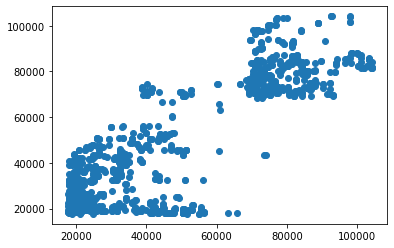

t+1 vs t-40


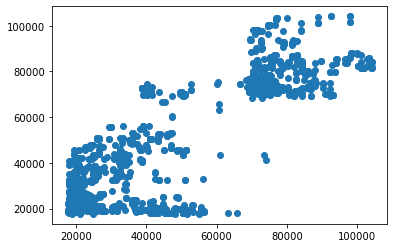

t+1 vs t-41


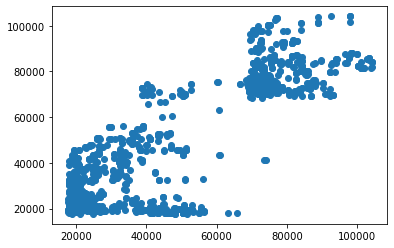

t+1 vs t-42


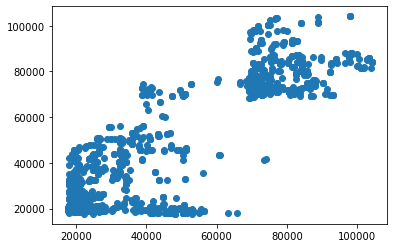

t+1 vs t-43


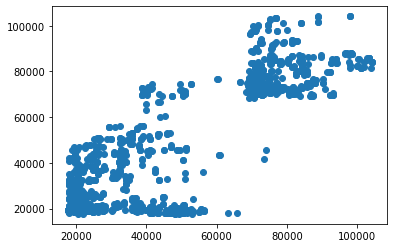

t+1 vs t-44


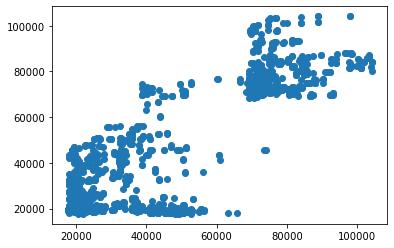

t+1 vs t-45


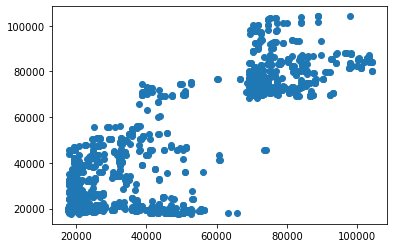

t+1 vs t-46


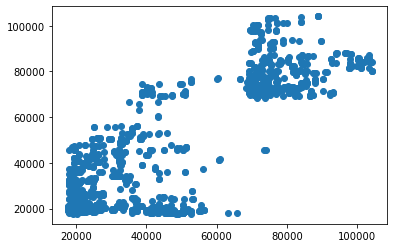

t+1 vs t-47


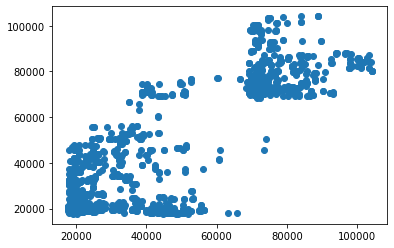

t+1 vs t-48


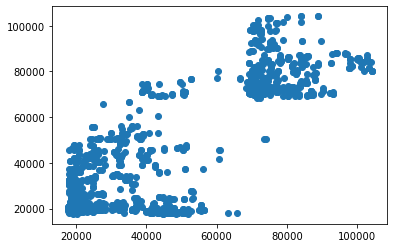

In [1211]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
values = DataFrame(balance_clean_2016_2019_ser.values)
lags = 48
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [1214]:
"""
Vemos que hay una gran correlación positiva entre y(t+1) e y(t-18) que poco a poco se va degradando hasta que a partir de
y(t-19) esta correlacion positiva aún se percibe pero deja de ser tan clara.
A partir de y(t-24) hasta y(t-48) lo que vemos practicamente son dos cuadrados/triangulos uno en la parte inferior izquierda
y otro en la parte superior derecha.

CONCLUSION: es posible que la serie pueda ser modelada.
"""

'\nVemos que hay una gran correlación positiva entre y(t+1) e y(t-18) que poco a poco se va degradando hasta que a partir de\ny(t-19) esta correlacion positiva aún se percibe pero deja de ser tan clara.\nA partir de y(t-24) hasta y(t-48) lo que vemos practicamente son dos cuadrados/triangulos uno en la parte inferior izquierda\ny otro en la parte superior derecha.\n\nCONCLUSION: es posible que la serie pueda ser modelada.\n'

In [1215]:
# 6. Time Series Autocorrelation Plots

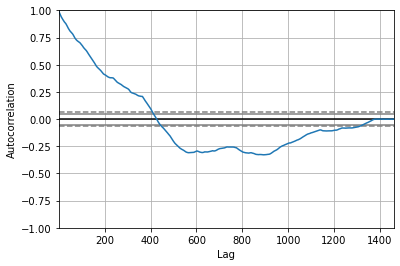

In [1216]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(balance_clean_2016_2019_ser)
pyplot.show()

In [1217]:
"""
The resulting plot shows lag along the x-axis and the correlation on the y-axis.
Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

Vemos que hay correlacion estadisticamente significativa y positiva entre y(t+1) y sus 400 lags anteriores.
Vemos que hay correlacion estadisticamente significativa y negativa entre los lags 450 y 1200 aproximadamente.

Y vemos que hay fuerte correlacion positiva (coef > 0.5) hasta el lag 150 aproximadamente.

CONCLUSION: esta serie temporal tomando los años 2016-2019 es modelizable y la modelizacion saldria mejor cogiendo solo los
años 2016, 2018 y 2019.
"""

'\nThe resulting plot shows lag along the x-axis and the correlation on the y-axis.\nDotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).\n\nVemos que hay correlacion estadisticamente significativa y positiva entre y(t+1) y sus 400 lags anteriores.\nVemos que hay correlacion estadisticamente significativa y negativa entre los lags 450 y 1200 aproximadamente.\n\nY vemos que hay fuerte correlacion positiva (coef > 0.5) hasta el lag 150 aproximadamente.\n\nCONCLUSION: esta serie temporal tomando los años 2016-2019 es modelizable y la modelizacion saldria mejor cogiendo solo los\naños 2016, 2018 y 2019.\n'

In [1218]:
"""
Por todo esto, por ahora, vamos a seguir trabajando con el dataset completo de los años 2016-2019
"""

'\nPor todo esto, por ahora, vamos a seguir trabajando con el dataset completo de los años 2016-2019\n'

In [1219]:
# Lesson 04: Persistence Forecast Model

In [1220]:
# How to Make Baseline Predictions for Time Series Forecasting with Python
# https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

In [1]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [1222]:
"""
Vamos a hacer un persistence model con los datos.
Pero 1o vamos a transformar nuestro dataset de datos al formato admitido por prophet
"""

'\nVamos a hacer un persistence model con los datos.\nPero 1o vamos a transformar nuestro dataset de datos al formato admitido por prophet\n'

In [1233]:
# Prophet Forecasting Library

In [1229]:
!pip install pystan

In [1230]:
!pip install fbprophet

In [1231]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [1232]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.11.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.9.1
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.5
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.pos

tensorboard                        2.4.1
tensorboard-plugin-wit             1.8.0
tensorflow                         2.4.1
tensorflow-estimator               2.4.0
termcolor                          1.1.0
terminado                          0.9.2
testpath                           0.4.4
textdistance                       4.2.1
Theano                             1.0.4
threadpoolctl                      2.1.0
three-merge                        0.1.1
tifffile                           2021.2.1
toml                               0.10.1
toolz                              0.11.1
tornado                            6.1
tqdm                               4.56.0
traitlets                          5.0.5
typed-ast                          1.4.2
typing-extensions                  3.7.4.3
tzlocal                            2.1
ujson                              4.0.2
unicodecsv                         0.14.1
urllib3                            1.26.3
watchdog                           1.0.2
wcwidth   

In [1234]:
# Preparamos el dataframe al formato admitido por prophet

In [1518]:
balance_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=0, squeeze=False)

In [1520]:
balance_clean_2016_2019_df

BALANCE
DATE                
2016-01-01  79763.22
2016-01-02  79763.22
2016-01-03  79763.22
2016-01-04  79763.22
2016-01-05  72528.99
...              ...
2019-12-27  40168.04
2019-12-28  37792.40
2019-12-29  37792.40
2019-12-30  37792.40
2019-12-31  27768.49

[1460 rows x 1 columns]

In [1521]:
prophet_clean_2016_2019_df = balance_clean_2016_2019_df

In [1522]:
del(balance_clean_2016_2019_df)
del(balance_clean_2016_2019_ser)

In [1523]:
prophet_clean_2016_2019_df

BALANCE
DATE                
2016-01-01  79763.22
2016-01-02  79763.22
2016-01-03  79763.22
2016-01-04  79763.22
2016-01-05  72528.99
...              ...
2019-12-27  40168.04
2019-12-28  37792.40
2019-12-29  37792.40
2019-12-30  37792.40
2019-12-31  27768.49

[1460 rows x 1 columns]

In [1524]:
prophet_clean_2016_2019_df.columns

Index(['BALANCE'], dtype='object')

In [1525]:
prophet_clean_2016_2019_df = prophet_clean_2016_2019_df.reset_index()

In [1526]:
prophet_clean_2016_2019_df

DATE   BALANCE
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[1460 rows x 2 columns]

In [1527]:
# prepare expected column names
prophet_clean_2016_2019_df.columns = ['ds', 'y']

In [1528]:
prophet_clean_2016_2019_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[1460 rows x 2 columns]

In [1529]:
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame, to_datetime

In [1530]:
prophet_clean_2016_2019_df['ds']= to_datetime(prophet_clean_2016_2019_df['ds'])

In [1531]:
prophet_clean_2016_2019_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[1460 rows x 2 columns]

In [1532]:
prophet_clean_2016_2019_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1533]:
# A continuacion vamos a obtener un dataframe de train desde 2016-01-01 hasta 2019-09-30
# y un dataframe de test desde 2019-10-01 hasta 2019-12-31

In [1534]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2016-01-01']

Int64Index([0], dtype='int64')

In [1535]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-09-30']

Int64Index([1367], dtype='int64')

In [1536]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-10-01']

Int64Index([1368], dtype='int64')

In [1537]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-12-31']

Int64Index([1459], dtype='int64')

In [1538]:
prophet_train_df = prophet_clean_2016_2019_df.iloc[:1368,:]

In [1539]:
prophet_train_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1363 2019-09-26  17970.77
1364 2019-09-27  17970.77
1365 2019-09-28  17970.77
1366 2019-09-29  17970.77
1367 2019-09-30  17970.77

[1368 rows x 2 columns]

In [1540]:
prophet_train_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1541]:
prophet_test_df = prophet_clean_2016_2019_df.iloc[1368:,:]

In [1542]:
prophet_test_df

ds         y
1368 2019-10-01  17970.77
1369 2019-10-02  17970.77
1370 2019-10-03  17970.77
1371 2019-10-04  17970.77
1372 2019-10-05  17970.77
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[92 rows x 2 columns]

In [1543]:
prophet_test_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1544]:
# A continuacion vamos a calcular el error del modelo del Persistence Baseline sobre prophet_test_df

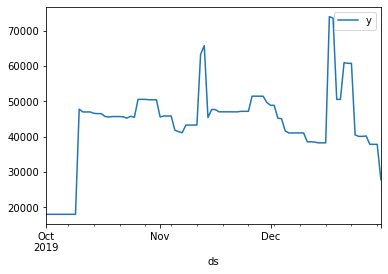

In [1545]:
# gca stands for 'get current axis'
prophet_test_df.plot(kind='line', x='ds', y='y', ax=pyplot.gca())
pyplot.show()

In [1546]:
# Persistence Algorithm

In [1547]:
# Step 1: Define the Supervised Learning Problem

In [1548]:
persistence_df=prophet_clean_2016_2019_df.set_index(prophet_clean_2016_2019_df.iloc[:,0])

In [1549]:
persistence_df

ds         y
ds                             
2016-01-01 2016-01-01  79763.22
2016-01-02 2016-01-02  79763.22
2016-01-03 2016-01-03  79763.22
2016-01-04 2016-01-04  79763.22
2016-01-05 2016-01-05  72528.99
...               ...       ...
2019-12-27 2019-12-27  40168.04
2019-12-28 2019-12-28  37792.40
2019-12-29 2019-12-29  37792.40
2019-12-30 2019-12-30  37792.40
2019-12-31 2019-12-31  27768.49

[1460 rows x 2 columns]

In [1550]:
persistence_df=persistence_df.drop(['ds'], axis = 1)

In [1551]:
persistence_df

y
ds                  
2016-01-01  79763.22
2016-01-02  79763.22
2016-01-03  79763.22
2016-01-04  79763.22
2016-01-05  72528.99
...              ...
2019-12-27  40168.04
2019-12-28  37792.40
2019-12-29  37792.40
2019-12-30  37792.40
2019-12-31  27768.49

[1460 rows x 1 columns]

In [1552]:
persistence_ser = persistence_df.T.squeeze()

In [1553]:
persistence_ser

ds
2016-01-01    79763.22
2016-01-02    79763.22
2016-01-03    79763.22
2016-01-04    79763.22
2016-01-05    72528.99
                ...   
2019-12-27    40168.04
2019-12-28    37792.40
2019-12-29    37792.40
2019-12-30    37792.40
2019-12-31    27768.49
Name: y, Length: 1460, dtype: float64

In [1554]:
# Create lagged dataset
values = DataFrame(persistence_ser.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe)

           t-1       t+1
0          NaN  79763.22
1     79763.22  79763.22
2     79763.22  79763.22
3     79763.22  79763.22
4     79763.22  72528.99
...        ...       ...
1455  40039.04  40168.04
1456  40168.04  37792.40
1457  37792.40  37792.40
1458  37792.40  37792.40
1459  37792.40  27768.49

[1460 rows x 2 columns]


In [1555]:
dataframe

t-1       t+1
0          NaN  79763.22
1     79763.22  79763.22
2     79763.22  79763.22
3     79763.22  79763.22
4     79763.22  72528.99
...        ...       ...
1455  40039.04  40168.04
1456  40168.04  37792.40
1457  37792.40  37792.40
1458  37792.40  37792.40
1459  37792.40  27768.49

[1460 rows x 2 columns]

In [1556]:
# Step 2: Train and Test Sets

In [1557]:
X = dataframe.values

In [1558]:
X

array([[     nan, 79763.22],
       [79763.22, 79763.22],
       [79763.22, 79763.22],
       ...,
       [37792.4 , 37792.4 ],
       [37792.4 , 37792.4 ],
       [37792.4 , 27768.49]])

In [1559]:
type(X), X.shape

(numpy.ndarray, (1460, 2))

In [1560]:
X[0,:]

array([     nan, 79763.22])

In [1561]:
X[1367,:]

array([17970.77, 17970.77])

In [1562]:
X[1368,:]

array([17970.77, 17970.77])

In [1563]:
for x in range(1368): print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1564]:
X[1459,:]

array([37792.4 , 27768.49])

In [1565]:
X[1460,:]

IndexError: index 1460 is out of bounds for axis 0 with size 1460

In [1566]:
# split into train and test sets
X = dataframe.values
train_size = int(1368)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [1567]:
train

array([[79763.22, 79763.22],
       [79763.22, 79763.22],
       [79763.22, 79763.22],
       ...,
       [17970.77, 17970.77],
       [17970.77, 17970.77],
       [17970.77, 17970.77]])

In [1568]:
test[-10:,:]

array([[60924.87, 60724.87],
       [60724.87, 60724.87],
       [60724.87, 40452.79],
       [40452.79, 40039.04],
       [40039.04, 40039.04],
       [40039.04, 40168.04],
       [40168.04, 37792.4 ],
       [37792.4 , 37792.4 ],
       [37792.4 , 37792.4 ],
       [37792.4 , 27768.49]])

In [1569]:
train.size, test.size

(2734, 184)

In [1570]:
# Step 3: Persistence Algorithm

In [1571]:
# Step 4: Make and Evaluate Forecast

Test MAE: 2360.442
Test MSE: 46436359.260
Test RMSE: 6814.423


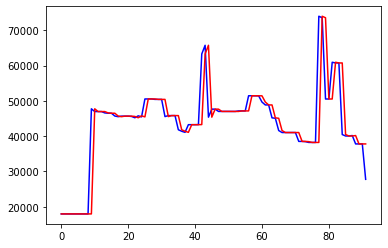

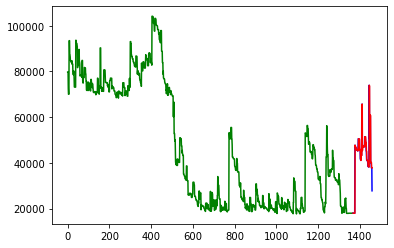

In [1574]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
    
mae = mean_absolute_error(test_y, predictions)
print('Test MAE: %.3f' % mae)

test_score = mean_squared_error(test_y, predictions)
root_test_score = sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % root_test_score)

# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(predictions, color='red') # y en predictions - en rojo
pyplot.show()

# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in predictions], color='red') # y en predictions - en rojo
pyplot.show()

In [1575]:
# Step 5: Complete Example

           t-1       t+1
0          NaN  79763.22
1     79763.22  79763.22
2     79763.22  79763.22
3     79763.22  79763.22
4     79763.22  72528.99
...        ...       ...
1455  40039.04  40168.04
1456  40168.04  37792.40
1457  37792.40  37792.40
1458  37792.40  37792.40
1459  37792.40  27768.49

[1460 rows x 2 columns]
Test MAE: 2360.442
Test MSE: 46436359.260
Test RMSE: 6814.423


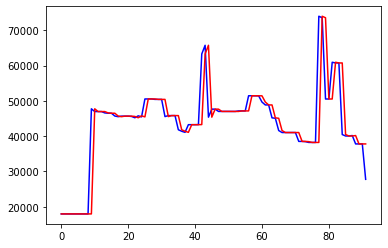

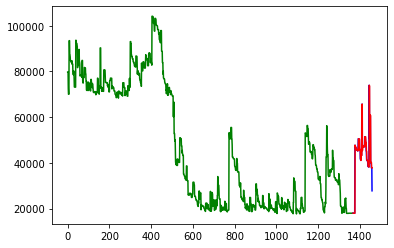

In [1576]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Create lagged dataset
values = DataFrame(persistence_ser.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe)

# split into train and test sets
X = dataframe.values
train_size = int(1368)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)

mae = mean_absolute_error(test_y, predictions)
print('Test MAE: %.3f' % mae)
    
test_score = mean_squared_error(test_y, predictions)
root_test_score = sqrt(test_score)
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % root_test_score)

# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(predictions, color='red') # y en predictions - en rojo
pyplot.show()

# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in predictions], color='red') # y en predictions - en rojo
pyplot.show()

In [1577]:
# Lesson 05: Autoregressive Forecast Model

In [1578]:
# Autoregression Models for Time Series Forecasting With Python
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [1579]:
# Quick Check for Autocorrelation

In [1580]:
"""
We can use a statistical test like the Pearson correlation coefficient. This produces a number to summarize how correlated two
variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low
correlation and high values above 0.5 or below -0.5 showing high correlation.
"""

'\nWe can use a statistical test like the Pearson correlation coefficient. This produces a number to summarize how correlated two\nvariables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low\ncorrelation and high values above 0.5 or below -0.5 showing high correlation.\n'

In [1341]:
# Autocorrelation Plots

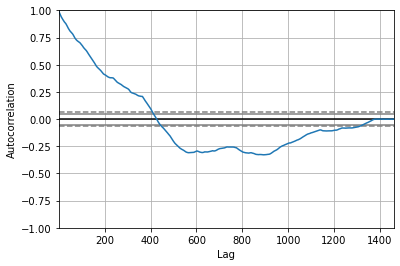

In [1368]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
balance_clean_2016_2019_ser = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=0, squeeze=True)
autocorrelation_plot(balance_clean_2016_2019_ser)
pyplot.show()

In [1369]:
"""
The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis.
The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values.
Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for
selecting more relevant lag values.
"""

'\nThe plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis.\nThe plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values.\nCorrelation values above these lines are more significant than those below the line, providing a threshold or cutoff for\nselecting more relevant lag values.\n'

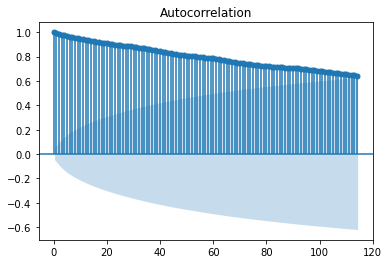

In [1386]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(balance_clean_2016_2019_ser, lags=114)
pyplot.show()

In [1387]:
"""
Viendo las dos graficas anteriores vemos que hay una fuerte correlacion entre y(t+1) y aproximadamente sus 114 lags anteriores
considerando por tanto esta serie temporal como modelizable.
"""

'\nViendo las dos graficas anteriores vemos que hay una fuerte correlacion entre y(t+1) y aproximadamente sus 114 lags anteriores\nconsiderando por tanto esta serie temporal como modelizable.\n'

In [1372]:
# Lesson 06: ARIMA Forecast Model

In [1373]:
# How to Create an ARIMA Model for Time Series Forecasting in Python
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [1374]:
# Lesson 07: Hello World End-to-End Project

In [1378]:
# Time Series Forecast Study with Python: Monthly Sales of French Champagne
# https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [1390]:
# 1. Environment

In [1391]:
# check the versions of key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

scipy: 1.6.1
numpy: 1.19.2
matplotlib: 3.3.4
pandas: 1.2.2
statsmodels: 0.12.2
sklearn: 0.23.2
Prophet 0.7.1


In [1379]:
# 6. ARIMA Models

In [1380]:
# 6.1 Manually Configured ARIMA

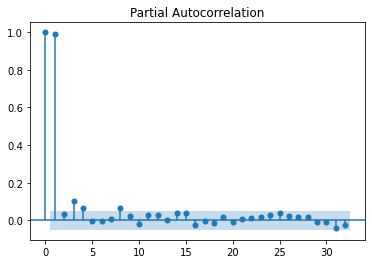

In [1376]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(balance_clean_2016_2019_ser)
pyplot.show()

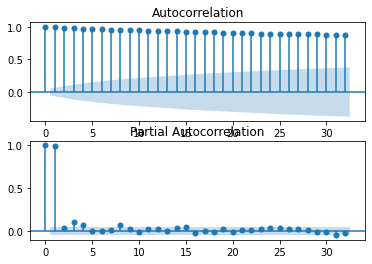

In [1377]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(balance_clean_2016_2019_ser, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(balance_clean_2016_2019_ser, ax=pyplot.gca())
pyplot.show()

In [1388]:
"""
Si fueramos a utlizar un ARIMA(p,d,q) configurado manualmente la configuracion seria la siguiente:
- Recordando el plot de los datos balance_clean_2016_2019_ser en funcion del tiempo vemos q la serie tiene estacionalidad
    luego un buen valor de partida seria d=1.
- Viendo el grafico de autocorrelacion vemos que hay correlacion fuerte entre y(t+1) y sus 114 lags anteriores luego un buen
    valor para p seria p=114
- Viendo el grafico de autocorrelacion parcial vemos que hay correlacion parcial fuerte con el lag 1 y correlacion parcial
    significativa pero debil con los lags 3, 4 y 8. Luego un buen valor para q seria q=1.
    
Luego si yo tuviera que aproximar esta serie temporal con un modelo ARIMA configurado manualmente el primer modelo que probaria
    seria ARIMA(114,1,1)
"""

'\nSi fueramos a utlizar un ARIMA(p,d,q) configurado manualmente la configuracion seria la siguiente:\n- Recordando el plot de los datos balance_clean_2016_2019_ser en funcion del tiempo vemos q la serie tiene estacionalidad\n    luego un buen valor de partida seria d=1.\n- Viendo el grafico de autocorrelacion vemos que hay correlacion fuerte entre y(t+1) y sus 114 lags anteriores luego un buen\n    valor para p seria p=114\n- Viendo el grafico de autocorrelacion parcial vemos que hay correlacion parcial fuerte con el lag 1 y correlacion parcial\n    significativa pero debil con los lags 3, 4 y 8. Luego un buen valor para q seria q=1.\n    \nLuego si yo tuviera que aproximar esta serie temporal con un modelo ARIMA configurado manualmente el primer modelo que probaria\n    seria ARIMA(114,1,1)\n'

In [1389]:
"""
Terminado este analisis previo a continuacion pasamos a entrenar un validar con prophet un modelo para la serie temporal
del balance entre 2016 y 2019.
"""

'\nTerminado este analisis previo a continuacion pasamos a entrenar un validar con prophet un modelo para la serie temporal\ndel balance entre 2016 y 2019.\n'

In [1394]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [1395]:
# Load and Summarize Dataset

In [1396]:
"""
Prophet requires data to be in Pandas DataFrames. Therefore, we will load and summarize the data using Pandas.
"""

'\nProphet requires data to be in Pandas DataFrames. Therefore, we will load and summarize the data using Pandas.\n'

In [1695]:
# load the car sales dataset
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame, to_datetime
from fbprophet import Prophet
# load data
# path = 'balance_clean_2016_2019.csv'
# balance_clean_2016_2019_ser = read_csv(path, header=0, parse_dates=True, index_col=0, squeeze=False)
# prophet_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=0, squeeze=False)
prophet_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [1696]:
prophet_clean_2016_2019_df.shape

(1460, 2)

In [1697]:
prophet_clean_2016_2019_df

DATE   BALANCE
0     2016-01-01  79763.22
1     2016-01-02  79763.22
2     2016-01-03  79763.22
3     2016-01-04  79763.22
4     2016-01-05  72528.99
...          ...       ...
1455  2019-12-27  40168.04
1456  2019-12-28  37792.40
1457  2019-12-29  37792.40
1458  2019-12-30  37792.40
1459  2019-12-31  27768.49

[1460 rows x 2 columns]

In [1698]:
prophet_clean_2016_2019_df.columns

Index(['DATE', 'BALANCE'], dtype='object')

In [1699]:
prophet_clean_2016_2019_df.dtypes

DATE        object
BALANCE    float64
dtype: object

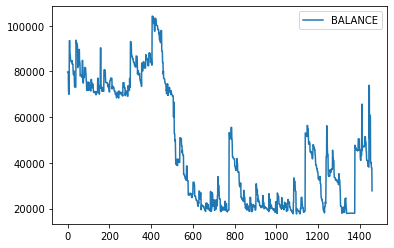

In [1700]:
prophet_clean_2016_2019_df.plot()
pyplot.show()

In [1701]:
# Forecast Car Sales With Prophet

In [1702]:
# Fit Prophet Model

In [1703]:
# prepare expected column names
prophet_clean_2016_2019_df.columns = ['ds', 'y']

In [1704]:
prophet_clean_2016_2019_df

ds         y
0     2016-01-01  79763.22
1     2016-01-02  79763.22
2     2016-01-03  79763.22
3     2016-01-04  79763.22
4     2016-01-05  72528.99
...          ...       ...
1455  2019-12-27  40168.04
1456  2019-12-28  37792.40
1457  2019-12-29  37792.40
1458  2019-12-30  37792.40
1459  2019-12-31  27768.49

[1460 rows x 2 columns]

In [1705]:
prophet_clean_2016_2019_df['ds']= to_datetime(prophet_clean_2016_2019_df['ds'])

In [1706]:
prophet_clean_2016_2019_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[1460 rows x 2 columns]

In [1707]:
prophet_clean_2016_2019_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1708]:
# A continuacion vamos a obtener un dataframe de train desde 2016-01-01 hasta 2019-09-30
# y un dataframe de test desde 2019-10-01 hasta 2019-12-31

In [1709]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2016-01-01']

Int64Index([0], dtype='int64')

In [1710]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-09-30']

Int64Index([1367], dtype='int64')

In [1711]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-10-01']

Int64Index([1368], dtype='int64')

In [1712]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-12-31']

Int64Index([1459], dtype='int64')

In [1713]:
prophet_train_df = prophet_clean_2016_2019_df.iloc[:1368,:]

In [1714]:
prophet_train_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1363 2019-09-26  17970.77
1364 2019-09-27  17970.77
1365 2019-09-28  17970.77
1366 2019-09-29  17970.77
1367 2019-09-30  17970.77

[1368 rows x 2 columns]

In [1715]:
prophet_train_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1716]:
prophet_test_df = prophet_clean_2016_2019_df.iloc[1368:,:]

In [1717]:
prophet_test_df

ds         y
1368 2019-10-01  17970.77
1369 2019-10-02  17970.77
1370 2019-10-03  17970.77
1371 2019-10-04  17970.77
1372 2019-10-05  17970.77
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[92 rows x 2 columns]

In [1718]:
prophet_test_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1719]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1720]:
# Make an In-Sample Forecast

In [1721]:
"""
Vamos a hacer un In-Sample Forecast de las observaciones desde el 2019-07-01 hasta el 2019-09-30
"""

'\nVamos a hacer un In-Sample Forecast de las observaciones desde el 2019-07-01 hasta el 2019-09-30\n'

In [1722]:
prophet_train_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1363 2019-09-26  17970.77
1364 2019-09-27  17970.77
1365 2019-09-28  17970.77
1366 2019-09-29  17970.77
1367 2019-09-30  17970.77

[1368 rows x 2 columns]

In [1723]:
prophet_train_df.index[prophet_train_df['ds'] == '2019-07-01']

Int64Index([1276], dtype='int64')

In [1724]:
prophet_train_df.index[prophet_train_df['ds'] == '2019-09-30']

Int64Index([1367], dtype='int64')

In [1725]:
future_in_sample_df=prophet_train_df.iloc[1276:,:]

In [1726]:
future_in_sample_df

ds         y
1276 2019-07-01  40922.84
1277 2019-07-02  35886.16
1278 2019-07-03  33711.16
1279 2019-07-04  33711.16
1280 2019-07-05  33617.76
...         ...       ...
1363 2019-09-26  17970.77
1364 2019-09-27  17970.77
1365 2019-09-28  17970.77
1366 2019-09-29  17970.77
1367 2019-09-30  17970.77

[92 rows x 2 columns]

In [1727]:
future_in_sample_df=future_in_sample_df.drop(['y'], axis = 1)

In [1728]:
future_in_sample_df

ds
1276 2019-07-01
1277 2019-07-02
1278 2019-07-03
1279 2019-07-04
1280 2019-07-05
...         ...
1363 2019-09-26
1364 2019-09-27
1365 2019-09-28
1366 2019-09-29
1367 2019-09-30

[92 rows x 1 columns]

In [1729]:
future_in_sample_df.reset_index(level=0, inplace=True)

In [1730]:
future_in_sample_df

index         ds
0    1276 2019-07-01
1    1277 2019-07-02
2    1278 2019-07-03
3    1279 2019-07-04
4    1280 2019-07-05
..    ...        ...
87   1363 2019-09-26
88   1364 2019-09-27
89   1365 2019-09-28
90   1366 2019-09-29
91   1367 2019-09-30

[92 rows x 2 columns]

In [1731]:
future_in_sample_df=future_in_sample_df.drop(['index'], axis = 1)

In [1732]:
future_in_sample_df

ds
0  2019-07-01
1  2019-07-02
2  2019-07-03
3  2019-07-04
4  2019-07-05
..        ...
87 2019-09-26
88 2019-09-27
89 2019-09-28
90 2019-09-29
91 2019-09-30

[92 rows x 1 columns]

In [1733]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1734]:
type(future_in_sample_df)

pandas.core.frame.DataFrame

In [1735]:
future_in_sample_df.columns

Index(['ds'], dtype='object')

In [1736]:
future_in_sample_df['ds']=to_datetime(future_in_sample_df['ds'])

In [1737]:
future_in_sample_df

ds
0  2019-07-01
1  2019-07-02
2  2019-07-03
3  2019-07-04
4  2019-07-05
..        ...
87 2019-09-26
88 2019-09-27
89 2019-09-28
90 2019-09-29
91 2019-09-30

[92 rows x 1 columns]

In [1738]:
type(future_in_sample_df)

pandas.core.frame.DataFrame

In [1739]:
future_in_sample_df.columns

Index(['ds'], dtype='object')

In [1740]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1741]:
# use the model to make a forecast
forecast_df = model.predict(future_in_sample_df)

In [1742]:
"""
The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the
forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘
and ‘yhat_upper‘) that provide uncertainty of the forecast.
"""

'\nThe result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the\nforecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘\nand ‘yhat_upper‘) that provide uncertainty of the forecast.\n'

In [1743]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds          yhat    yhat_lower    yhat_upper
0  2019-07-01  31814.158210  24840.012687  38663.783591
1  2019-07-02  31114.955925  24562.022855  38388.273763
2  2019-07-03  31364.511111  24221.071554  38143.806937
3  2019-07-04  31437.611763  24664.356162  38131.612675
4  2019-07-05  31696.225119  25292.543750  39283.117491
..        ...           ...           ...           ...
87 2019-09-26  24074.247001  17864.404735  30685.991076
88 2019-09-27  24465.140661  17379.969318  31691.231782
89 2019-09-28  24503.418415  17311.250663  31267.756517
90 2019-09-29  24618.305298  17574.351153  31601.673809
91 2019-09-30  24768.507618  17469.148904  31359.141228

[92 rows x 4 columns]


In [1744]:
forecast_df

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2019-07-01  30063.723464  24840.012687  38663.783591  30063.723464   
1  2019-07-02  30080.198308  24562.022855  38388.273763  30080.198308   
2  2019-07-03  30096.673153  24221.071554  38143.806937  30096.673153   
3  2019-07-04  30113.147997  24664.356162  38131.612675  30113.147997   
4  2019-07-05  30129.622842  25292.543750  39283.117491  30129.622842   
..        ...           ...           ...           ...           ...   
87 2019-09-26  31497.034933  17864.404735  30685.991076  31497.034933   
88 2019-09-27  31513.509777  17379.969318  31691.231782  31513.509777   
89 2019-09-28  31529.984622  17311.250663  31267.756517  31529.984622   
90 2019-09-29  31546.459466  17574.351153  31601.673809  31546.459466   
91 2019-09-30  31562.934311  17469.148904  31359.141228  31562.934311   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   30063.723464     1750.434746           1750.434746           1750.434746   
1   30080.198308     1034.757617           1034.757617           1034.757617   
2   30096.673153     1267.837958           1267.837958           1267.837958   
3   30113.147997     1324.463766           1324.463766           1324.463766   
4   30129.622842     1566.602278           1566.602278           1566.602278   
..           ...             ...                   ...                   ...   
87  31497.034933    -7422.787932          -7422.787932          -7422.787932   
88  31513.509777    -7048.369117          -7048.369117          -7048.369117   
89  31529.984622    -7026.566207          -7026.566207          -7026.566207   
90  31546.459466    -6928.154169          -6928.154169          -6928.154169   
91  31562.934311    -6794.426693          -6794.426693          -6794.426693   

        weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0   258.178537    258.178537    258.178537  1492.256209   1492.256209   
1  -449.222567   -449.222567   -449.222567  1483.980184   1483.980184   
2  -195.489858   -195.489858   -195.489858  1463.327816   1463.327816   
3  -105.008193   -105.008193   -105.008193  1429.471959   1429.471959   
4   185.087789    185.087789    185.087789  1381.514488   1381.514488   
..         ...           ...           ...          ...           ...   
87 -105.008193   -105.008193   -105.008193 -7317.779738  -7317.779738   
88  185.087789    185.087789    185.087789 -7233.456906  -7233.456906   
89  134.201272    134.201272    134.201272 -7160.767479  -7160.767479   
90  172.253020    172.253020    172.253020 -7100.407189  -7100.407189   
91  258.178537    258.178537    258.178537 -7052.605230  -7052.605230   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0    1492.256209                   0.0                         0.0   
1    1483.980184                   0.0                         0.0   
2    1463.327816                   0.0                         0.0   
3    1429.471959                   0.0                         0.0   
4    1381.514488                   0.0                         0.0   
..           ...                   ...                         ...   
87  -7317.779738                   0.0                         0.0   
88  -7233.456906                   0.0                         0.0   
89  -7160.767479                   0.0                         0.0   
90  -7100.407189                   0.0                         0.0   
91  -7052.605230                   0.0                         0.0   

    multiplicative_terms_upper          yhat  
0                          0.0  31814.158210  
1                          0.0  31114.955925  
2                          0.0  31364.511111  
3                          0.0  31437.611763  
4                          0.0  31696.225119  
..                         ...           ...  
87                         0.0  24074.247001  
88                         0.0  24465.140661  
89                         0.0  

In [1745]:
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0  2019-07-01  31814.158210  24840.012687  38663.783591
1  2019-07-02  31114.955925  24562.022855  38388.273763
2  2019-07-03  31364.511111  24221.071554  38143.806937
3  2019-07-04  31437.611763  24664.356162  38131.612675
4  2019-07-05  31696.225119  25292.543750  39283.117491
..        ...           ...           ...           ...
87 2019-09-26  24074.247001  17864.404735  30685.991076
88 2019-09-27  24465.140661  17379.969318  31691.231782
89 2019-09-28  24503.418415  17311.250663  31267.756517
90 2019-09-29  24618.305298  17574.351153  31601.673809
91 2019-09-30  24768.507618  17469.148904  31359.141228

[92 rows x 4 columns]

In [1746]:
"""
Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame.
It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.
"""

'\nProphet also provides a built-in tool for visualizing the prediction in the context of the training dataset.\n\nThis can be achieved by calling the plot() function on the model and passing it a result DataFrame.\nIt will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.\n'

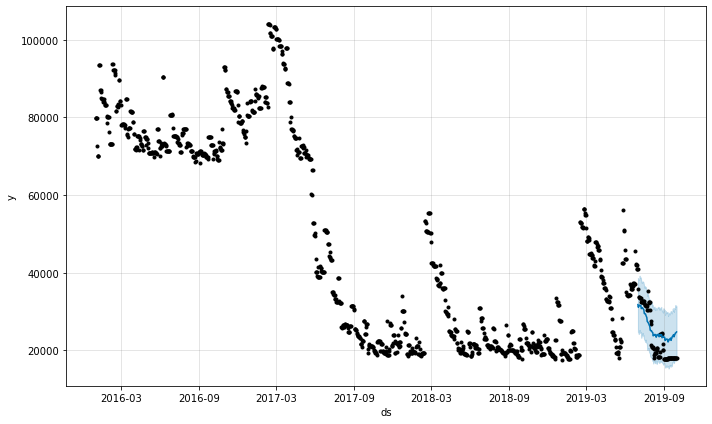

In [1747]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [1748]:
# Manually Evaluate Forecast Model

In [1749]:
evaluate_in_sample_df=prophet_train_df.iloc[1276:,:]

In [1750]:
evaluate_in_sample_df.reset_index(level=0, inplace=True)

In [1751]:
evaluate_in_sample_df=evaluate_in_sample_df.drop(['index'], axis = 1)

In [1752]:
evaluate_in_sample_df

ds         y
0  2019-07-01  40922.84
1  2019-07-02  35886.16
2  2019-07-03  33711.16
3  2019-07-04  33711.16
4  2019-07-05  33617.76
..        ...       ...
87 2019-09-26  17970.77
88 2019-09-27  17970.77
89 2019-09-28  17970.77
90 2019-09-29  17970.77
91 2019-09-30  17970.77

[92 rows x 2 columns]

In [1753]:
evaluate_in_sample_df['y'][:].values

array([40922.84, 35886.16, 33711.16, 33711.16, 33617.76, 33451.6 ,
       33451.6 , 33451.6 , 32398.85, 32398.85, 32398.85, 32413.1 ,
       32683.1 , 32683.1 , 32683.1 , 32326.27, 31684.74, 31834.74,
       31737.71, 31560.61, 31560.61, 31560.61, 30470.6 , 30470.6 ,
       35259.73, 32246.96, 32546.96, 32546.96, 32546.96, 30546.96,
       27517.48, 26688.57, 21287.13, 21002.54, 21002.54, 21002.54,
       20698.25, 20397.87, 18938.78, 17938.78, 19440.28, 19440.28,
       19440.28, 19463.8 , 20106.97, 20652.68, 20652.68, 18335.82,
       18335.82, 18335.82, 18335.82, 18335.82, 19563.65, 24288.27,
       24288.27, 24288.27, 24288.27, 24622.09, 21622.09, 20122.09,
       20072.09, 17911.77, 17911.77, 17911.77, 17911.77, 17911.77,
       17911.77, 17911.77, 17911.77, 17911.77, 17911.77, 17970.77,
       17970.77, 17970.77, 17970.77, 17970.77, 17970.77, 17970.77,
       17970.77, 17970.77, 17970.77, 17970.77, 17970.77, 17970.77,
       17970.77, 17970.77, 17970.77, 17970.77, 17970.77, 17970

Train MAE: 4061.042
Train MSE: 19836094.004
Train RMSE: 4453.773


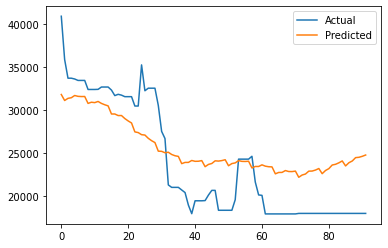

In [1754]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate MAE between expected and predicted values for december
y_true = evaluate_in_sample_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1755]:
"""
Vemos que en el testeo de julio a septiembre nos ha salido un RMSE: 4453.773 menor al RMSE: 6814.423 que obtuvimos con el 
Persistence Baseline de octubre a noviembre.

Lo cual es una indicacion de que estamos haciendo las cosas bien.

Sin embargo vemos que en el testeo de julio a septiembre nos ha salido un MAE: 4061.042 mayor al MAE: 2360.442 que obtuvimos 
con el Persistence Baseline de octubre a noviembre.

No obstante me sigo fiando más del Prophet que del Persistence Baseline puesto que RMSE y MAE se deberian de parecer y en el
caso del Prophet se parecen mucho más que en el caso del Persistence Baseline.

entrenamiento de ene-2016 a sep-2019, validacion de oct-2019 a dic-2019
Persistence Baseline			Test MAE: 2360.442
								Test MSE: 46436359.260
								Test RMSE: 6814.423


entrenamiento de ene-2016 a sep-2019, validacion de jul-2019 a sep-2019
Prophet                 		Train MAE: 4061.042
								Train MSE: 19836094.004
								Train RMSE: 4453.773
"""

'\nVemos que en el testeo de julio a septiembre nos ha salido un RMSE: 4453.773 menor al RMSE: 6814.423 que obtuvimos con el \nPersistence Baseline de octubre a noviembre.\n\nLo cual es una indicacion de que estamos haciendo las cosas bien.\n\nSin embargo vemos que en el testeo de julio a septiembre nos ha salido un MAE: 4061.042 mayor al MAE: 2360.442 que obtuvimos \ncon el Persistence Baseline de octubre a noviembre.\n\nNo obstante me sigo fiando más del Prophet que del Persistence Baseline puesto que RMSE y MAE se deberian de parecer y en el\ncaso del Prophet se parecen mucho más que en el caso del Persistence Baseline.\n\nentrenamiento de ene-2016 a sep-2019, validacion de oct-2019 a dic-2019\nPersistence Baseline\t\t\tTest MAE: 2360.442\n\t\t\t\t\t\t\t\tTest MSE: 46436359.260\n\t\t\t\t\t\t\t\tTest RMSE: 6814.423\n\n\nentrenamiento de ene-2016 a sep-2019, validacion de jul-2019 a sep-2019\nProphet                 \t\tTrain MAE: 4061.042\n\t\t\t\t\t\t\t\tTrain MSE: 19836094.004\n\t\

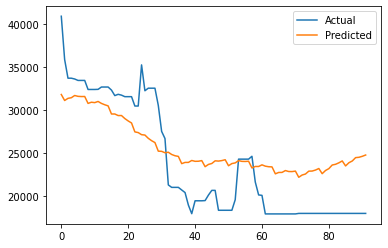

In [1756]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1757]:
"""
Vemos tambien que la grafica de valores predichos frente a los valores reales sale muy bien porque captura la tendencia
de los datos reales y la presenta suavizada.
"""

'\nVemos tambien que la grafica de valores predichos frente a los valores reales sale muy bien porque captura la tendencia\nde los datos reales y la presenta suavizada.\n'

In [1758]:
"""
A continuacion procedemos a la validacion final del modelo con los datos desde octubre de 2019 a diciembre de 2019
"""

'\nA continuacion procedemos a la validacion final del modelo con los datos desde octubre de 2019 a diciembre de 2019\n'

In [1759]:
# Make an Out-of-Sample Forecast

In [1760]:
prophet_test_df

ds         y
1368 2019-10-01  17970.77
1369 2019-10-02  17970.77
1370 2019-10-03  17970.77
1371 2019-10-04  17970.77
1372 2019-10-05  17970.77
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[92 rows x 2 columns]

In [1761]:
future_out_sample_df=prophet_test_df

In [1762]:
future_out_sample_df

ds         y
1368 2019-10-01  17970.77
1369 2019-10-02  17970.77
1370 2019-10-03  17970.77
1371 2019-10-04  17970.77
1372 2019-10-05  17970.77
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[92 rows x 2 columns]

In [1763]:
future_out_sample_df=future_out_sample_df.drop(['y'], axis = 1)

In [1764]:
future_out_sample_df

ds
1368 2019-10-01
1369 2019-10-02
1370 2019-10-03
1371 2019-10-04
1372 2019-10-05
...         ...
1455 2019-12-27
1456 2019-12-28
1457 2019-12-29
1458 2019-12-30
1459 2019-12-31

[92 rows x 1 columns]

In [1765]:
future_out_sample_df.reset_index(level=0, inplace=True)

In [1766]:
future_out_sample_df

index         ds
0    1368 2019-10-01
1    1369 2019-10-02
2    1370 2019-10-03
3    1371 2019-10-04
4    1372 2019-10-05
..    ...        ...
87   1455 2019-12-27
88   1456 2019-12-28
89   1457 2019-12-29
90   1458 2019-12-30
91   1459 2019-12-31

[92 rows x 2 columns]

In [1767]:
future_out_sample_df=future_out_sample_df.drop(['index'], axis = 1)

In [1768]:
future_out_sample_df

ds
0  2019-10-01
1  2019-10-02
2  2019-10-03
3  2019-10-04
4  2019-10-05
..        ...
87 2019-12-27
88 2019-12-28
89 2019-12-29
90 2019-12-30
91 2019-12-31

[92 rows x 1 columns]

In [1769]:
future_out_sample_df['ds']=to_datetime(future_out_sample_df['ds'])

In [1770]:
future_out_sample_df

ds
0  2019-10-01
1  2019-10-02
2  2019-10-03
3  2019-10-04
4  2019-10-05
..        ...
87 2019-12-27
88 2019-12-28
89 2019-12-29
90 2019-12-30
91 2019-12-31

[92 rows x 1 columns]

In [1771]:
type(future_out_sample_df)

pandas.core.frame.DataFrame

In [1772]:
future_out_sample_df.columns

Index(['ds'], dtype='object')

In [1773]:
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1774]:
# use the model to make a forecast
forecast_df = model.predict(future_out_sample_df)

In [1775]:
forecast_df

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2019-10-01  31579.409155  16954.247960  31089.981914  31579.409155   
1  2019-10-02  31595.884000  17063.583522  31636.980360  31595.884000   
2  2019-10-03  31612.358844  18250.142034  31721.241418  31612.358844   
3  2019-10-04  31628.833689  18216.116761  31853.541312  31628.833689   
4  2019-10-05  31645.308533  18008.987761  31969.350784  31645.308533   
..        ...           ...           ...           ...           ...   
87 2019-12-27  33012.720624  22284.045317  38064.059121  29707.760554   
88 2019-12-28  33029.195469  22276.694114  38763.901176  29644.461261   
89 2019-12-29  33045.670313  23001.841419  38720.534029  29601.948368   
90 2019-12-30  33062.145158  22889.083548  38808.534864  29583.821930   
91 2019-12-31  33078.620002  22503.376220  38854.299120  29474.991806   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   31579.409155    -7466.338708          -7466.338708          -7466.338708   
1   31595.884000    -7188.715676          -7188.715676          -7188.715676   
2   31612.358844    -7084.779711          -7084.779711          -7084.779711   
3   31628.833689    -6790.087478          -6790.087478          -6790.087478   
4   31645.308533    -6843.288471          -6843.288471          -6843.288471   
..           ...             ...                   ...                   ...   
87  35994.706725    -2708.357058          -2708.357058          -2708.357058   
88  36103.222546    -2505.793419          -2505.793419          -2505.793419   
89  36174.011986    -2210.466017          -2210.466017          -2210.466017   
90  36269.029668    -1867.942045          -1867.942045          -1867.942045   
91  36353.246349    -2324.240531          -2324.240531          -2324.240531   

        weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0  -449.222567   -449.222567   -449.222567 -7017.116141  -7017.116141   
1  -195.489858   -195.489858   -195.489858 -6993.225818  -6993.225818   
2  -105.008193   -105.008193   -105.008193 -6979.771517  -6979.771517   
3   185.087789    185.087789    185.087789 -6975.175268  -6975.175268   
4   134.201272    134.201272    134.201272 -6977.489743  -6977.489743   
..         ...           ...           ...          ...           ...   
87  185.087789    185.087789    185.087789 -2893.444848  -2893.444848   
88  134.201272    134.201272    134.201272 -2639.994691  -2639.994691   
89  172.253020    172.253020    172.253020 -2382.719038  -2382.719038   
90  258.178537    258.178537    258.178537 -2126.120582  -2126.120582   
91 -449.222567   -449.222567   -449.222567 -1875.017964  -1875.017964   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0   -7017.116141                   0.0                         0.0   
1   -6993.225818                   0.0                         0.0   
2   -6979.771517                   0.0                         0.0   
3   -6975.175268                   0.0                         0.0   
4   -6977.489743                   0.0                         0.0   
..           ...                   ...                         ...   
87  -2893.444848                   0.0                         0.0   
88  -2639.994691                   0.0                         0.0   
89  -2382.719038                   0.0                         0.0   
90  -2126.120582                   0.0                         0.0   
91  -1875.017964                   0.0                         0.0   

    multiplicative_terms_upper          yhat  
0                          0.0  24113.070447  
1                          0.0  24407.168323  
2                          0.0  24527.579133  
3                          0.0  24838.746210  
4                          0.0  24802.020062  
..                         ...           ...  
87                         0.0  30304.363566  
88                         0.0  30523.402050  
89                         0.0  

In [1776]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds          yhat    yhat_lower    yhat_upper
0  2019-10-01  24113.070447  16954.247960  31089.981914
1  2019-10-02  24407.168323  17063.583522  31636.980360
2  2019-10-03  24527.579133  18250.142034  31721.241418
3  2019-10-04  24838.746210  18216.116761  31853.541312
4  2019-10-05  24802.020062  18008.987761  31969.350784
..        ...           ...           ...           ...
87 2019-12-27  30304.363566  22284.045317  38064.059121
88 2019-12-28  30523.402050  22276.694114  38763.901176
89 2019-12-29  30835.204296  23001.841419  38720.534029
90 2019-12-30  31194.203113  22889.083548  38808.534864
91 2019-12-31  30754.379471  22503.376220  38854.299120

[92 rows x 4 columns]


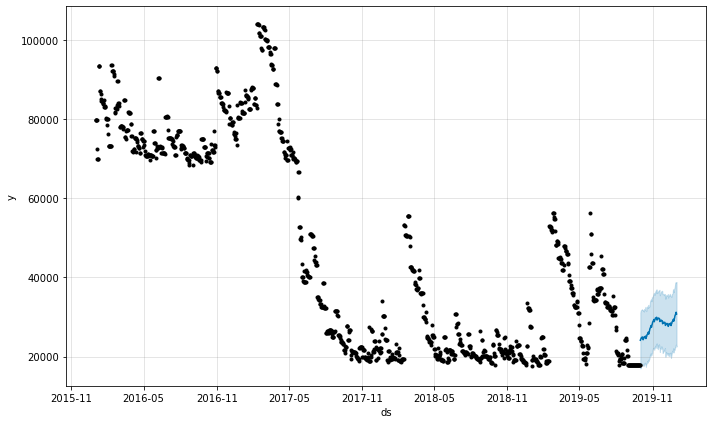

In [1777]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [1778]:
prophet_test_df

ds         y
1368 2019-10-01  17970.77
1369 2019-10-02  17970.77
1370 2019-10-03  17970.77
1371 2019-10-04  17970.77
1372 2019-10-05  17970.77
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[92 rows x 2 columns]

In [1783]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values

In [1784]:
y_true

array([17970.77, 17970.77, 17970.77, 17970.77, 17970.77, 17970.77,
       17970.77, 17970.77, 17970.77, 47738.77, 46961.15, 46961.15,
       46961.15, 46577.82, 46486.41, 46486.41, 45692.63, 45511.08,
       45661.08, 45661.08, 45661.08, 45577.57, 45207.57, 45750.77,
       45450.77, 50529.55, 50529.55, 50529.55, 50406.48, 50406.48,
       50406.48, 45535.37, 45819.36, 45819.36, 45819.36, 41805.02,
       41381.02, 41073.47, 43243.04, 43243.04, 43243.04, 43271.65,
       63271.65, 65729.19, 45372.36, 47649.31, 47639.79, 46998.26,
       46998.26, 46998.26, 46998.26, 46990.26, 46990.26, 47140.26,
       47140.26, 47140.26, 51432.41, 51432.41, 51422.41, 51422.41,
       49655.23, 48835.32, 48835.32, 45179.34, 45060.34, 41588.34,
       41020.59, 41020.59, 41020.59, 41020.59, 41020.59, 38510.14,
       38510.14, 38435.14, 38213.31, 38213.31, 38213.31, 73954.81,
       73528.49, 50514.99, 50514.99, 60924.87, 60724.87, 60724.87,
       40452.79, 40039.04, 40039.04, 40168.04, 37792.4 , 37792

In [1785]:
y_pred

array([24113.0704472 , 24407.16832344, 24527.57913344, 24838.74621048,
       24802.02006193, 24849.58113908, 24942.87053416, 24243.36535749,
       24508.29609933, 24616.05808993, 24932.22393878, 24918.74981448,
       25007.87801116, 25160.5632631 , 24537.259668  , 24893.66515875,
       25106.17481099, 25537.9486066 , 25648.1848569 , 25866.0997274 ,
       26149.43803711, 25655.34968792, 26136.22601932, 26465.24467144,
       27002.52589364, 27204.48892259, 27497.90647197, 27838.48035923,
       27381.77079428, 27879.07216508, 28202.98285719, 28713.57144248,
       28867.72771945, 29093.19696925, 29347.12122554, 28786.92128135,
       29166.11385296, 29359.81335822, 29730.82283985, 29738.90491683,
       29814.7336572 , 29918.35374991, 29209.98324605, 29445.75672458,
       29503.16058669, 29747.06699635, 29638.95901516, 29610.84911586,
       29623.71832789, 28838.31271927, 29010.89404809, 29018.69581152,
       29225.99029535, 29093.35784836, 29051.65887696, 29060.53381337,
      

Train MAE: 17287.431
Train MSE: 361591214.064
Train RMSE: 19015.552


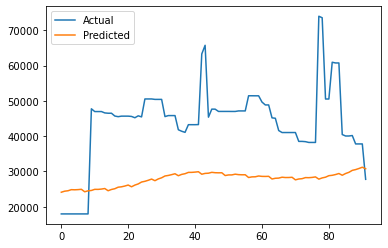

In [1786]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [1805]:
"""
Vemos que en datos no vistos Prophet hace una prediccion aparentemente peor que el Persistence Baseline en un dataset no visto
pero eso es porque las observaciones reales tienen cambios de valor muy repentinos y ni ningun otro modelo es capaz de predecir
esos cambios y aún así sigue muy bien a la serie porque captura muy bien su tendencia.

entrenamiento de ene-2016 a sep-2019, validacion de oct-2019 a dic-2019
Persistence Baseline			Test MAE: 2360.442
								Test MSE: 46436359.260
								Test RMSE: 6814.423

Prophet 						Train MAE: 17287.431
								Train MSE: 361591214.064
								Train RMSE: 19015.552								


entrenamiento de ene-2016 a sep-2019, validacion de jul-2019 a sep-2019
Prophet                 		Train MAE: 4061.042
								Train MSE: 19836094.004
								Train RMSE: 4453.773
"""

'\nVemos que en datos no vistos Prophet hace una prediccion aparentemente peor que el Persistence Baseline en un dataset no visto\npero eso es porque las observaciones reales tienen cambios de valor muy repentinos y ni ningun otro modelo es capaz de predecir\nesos cambios y aún así sigue muy bien a la serie porque captura muy bien su tendencia.\n\nentrenamiento de ene-2016 a sep-2019, validacion de oct-2019 a dic-2019\nPersistence Baseline\t\t\tTest MAE: 2360.442\n\t\t\t\t\t\t\t\tTest MSE: 46436359.260\n\t\t\t\t\t\t\t\tTest RMSE: 6814.423\n\nProphet \t\t\t\t\t\tTrain MAE: 17287.431\n\t\t\t\t\t\t\t\tTrain MSE: 361591214.064\n\t\t\t\t\t\t\t\tTrain RMSE: 19015.552\t\t\t\t\t\t\t\t\n\n\nentrenamiento de ene-2016 a sep-2019, validacion de jul-2019 a sep-2019\nProphet                 \t\tTrain MAE: 4061.042\n\t\t\t\t\t\t\t\tTrain MSE: 19836094.004\n\t\t\t\t\t\t\t\tTrain RMSE: 4453.773\n'

In [1788]:
"""
A continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto
del contexto entero de datos.
"""

'\nA continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto\ndel contexto entero de datos.\n'

In [1789]:
# load the car sales dataset
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame, to_datetime
from fbprophet import Prophet
# load data
# path = 'balance_clean_2016_2019.csv'
# balance_clean_2016_2019_ser = read_csv(path, header=0, parse_dates=True, index_col=0, squeeze=False)
# prophet_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=0, squeeze=False)
prophet_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [1790]:
prophet_clean_2016_2019_df.shape

(1460, 2)

In [1791]:
prophet_clean_2016_2019_df

DATE   BALANCE
0     2016-01-01  79763.22
1     2016-01-02  79763.22
2     2016-01-03  79763.22
3     2016-01-04  79763.22
4     2016-01-05  72528.99
...          ...       ...
1455  2019-12-27  40168.04
1456  2019-12-28  37792.40
1457  2019-12-29  37792.40
1458  2019-12-30  37792.40
1459  2019-12-31  27768.49

[1460 rows x 2 columns]

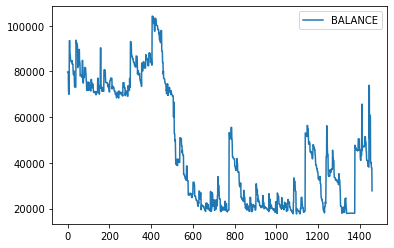

In [1792]:
prophet_clean_2016_2019_df.plot()
pyplot.show()

In [1794]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['DATE'] == '2015-01-01']

Int64Index([], dtype='int64')

In [1795]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['DATE'] == '2019-09-30']

Int64Index([1367], dtype='int64')

In [1796]:
# split into train and test sets
X = prophet_clean_2016_2019_df.values
train_size = int(1368)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [1799]:
train_X, train_X.shape

(array(['2016-01-01', '2016-01-02', '2016-01-03', ..., '2019-09-28',
        '2019-09-29', '2019-09-30'], dtype=object),
 (1368,))

In [1800]:
train_y, train_y.shape

(array([79763.22000000004, 79763.22000000004, 79763.22000000004, ...,
        17970.770000000055, 17970.770000000055, 17970.770000000055],
       dtype=object),
 (1368,))

In [1801]:
test_X, test_X.shape

(array(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
        '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
        '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
        '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16',
        '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
        '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
        '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
        '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
        '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
        '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
        '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
        '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
        '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
        '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
        '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
        '2019-11-30', '2019-12-01', '201

In [1802]:
test_y, test_y.shape

(array([17970.770000000055, 17970.770000000055, 17970.770000000055,
        17970.770000000055, 17970.770000000055, 17970.770000000055,
        17970.770000000055, 17970.770000000055, 17970.770000000055,
        47738.770000000055, 46961.15000000005, 46961.15000000005,
        46961.15000000005, 46577.82000000005, 46486.41000000005,
        46486.41000000005, 45692.63000000005, 45511.080000000045,
        45661.080000000045, 45661.080000000045, 45661.080000000045,
        45577.57000000004, 45207.57000000004, 45750.77000000004,
        45450.77000000004, 50529.55000000004, 50529.55000000004,
        50529.55000000004, 50406.48000000004, 50406.48000000004,
        50406.48000000004, 45535.37000000004, 45819.36000000004,
        45819.36000000004, 45819.36000000004, 41805.02000000003,
        41381.02000000003, 41073.47000000003, 43243.04000000003,
        43243.04000000003, 43243.04000000003, 43271.65000000003,
        63271.65000000003, 65729.19000000003, 45372.36000000003,
        476

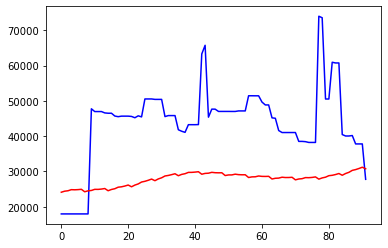

In [1803]:
# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

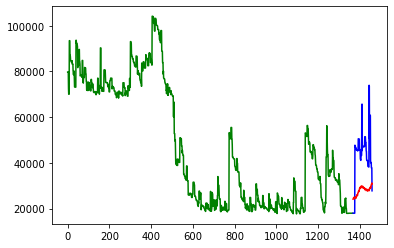

In [1804]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1806]:
"""
Por ultimo vamos a hacer una prediccion con prophet para el dataset entero los 4 años con el modelo entrenado hasta sept-2019
y vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet
"""

'\nPor ultimo vamos a hacer una prediccion con prophet para el dataset entero los 4 años con el modelo entrenado hasta sept-2019\ny vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet\n'

In [1807]:
# load the car sales dataset
from pandas import read_csv, read_excel, date_range, RangeIndex, DataFrame, to_datetime
from fbprophet import Prophet
# load data
# path = 'balance_clean_2016_2019.csv'
# balance_clean_2016_2019_ser = read_csv(path, header=0, parse_dates=True, index_col=0, squeeze=False)
# prophet_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=0, squeeze=False)
prophet_clean_2016_2019_df = read_csv('balance_clean_2016_2019.csv', header=0, parse_dates=True, index_col=None, squeeze=False)

In [1808]:
prophet_clean_2016_2019_df.shape

(1460, 2)

In [1809]:
prophet_clean_2016_2019_df

DATE   BALANCE
0     2016-01-01  79763.22
1     2016-01-02  79763.22
2     2016-01-03  79763.22
3     2016-01-04  79763.22
4     2016-01-05  72528.99
...          ...       ...
1455  2019-12-27  40168.04
1456  2019-12-28  37792.40
1457  2019-12-29  37792.40
1458  2019-12-30  37792.40
1459  2019-12-31  27768.49

[1460 rows x 2 columns]

In [1810]:
# prepare expected column names
prophet_clean_2016_2019_df.columns = ['ds', 'y']

In [1811]:
prophet_clean_2016_2019_df

ds         y
0     2016-01-01  79763.22
1     2016-01-02  79763.22
2     2016-01-03  79763.22
3     2016-01-04  79763.22
4     2016-01-05  72528.99
...          ...       ...
1455  2019-12-27  40168.04
1456  2019-12-28  37792.40
1457  2019-12-29  37792.40
1458  2019-12-30  37792.40
1459  2019-12-31  27768.49

[1460 rows x 2 columns]

In [1812]:
prophet_clean_2016_2019_df['ds']= to_datetime(prophet_clean_2016_2019_df['ds'])

In [1813]:
prophet_clean_2016_2019_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [1814]:
future_in_out_sample_df = prophet_clean_2016_2019_df

In [1815]:
future_in_out_sample_df=future_in_out_sample_df.drop(['y'], axis = 1)

In [1820]:
future_in_out_sample_df

ds
0    2016-01-01
1    2016-01-02
2    2016-01-03
3    2016-01-04
4    2016-01-05
...         ...
1455 2019-12-27
1456 2019-12-28
1457 2019-12-29
1458 2019-12-30
1459 2019-12-31

[1460 rows x 1 columns]

In [1821]:
future_in_out_sample_df['ds']=to_datetime(future_in_out_sample_df['ds'])

In [1822]:
type(future_in_out_sample_df)

pandas.core.frame.DataFrame

In [1823]:
future_in_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [1824]:
# use the model to make a forecast
forecast_df = model.predict(future_in_out_sample_df)

In [1825]:
forecast_df

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2016-01-01  78721.813799  70467.257766  84464.492569  78721.813799   
1    2016-01-02  78616.542986  69740.074835  84555.600009  78616.542986   
2    2016-01-03  78511.272173  70471.702122  84103.093243  78511.272173   
3    2016-01-04  78406.001359  70888.441038  84293.599032  78406.001359   
4    2016-01-05  78300.730546  70274.333414  84018.986320  78300.730546   
...         ...           ...           ...           ...           ...   
1455 2019-12-27  33012.720624  22366.336686  37959.671917  29104.380766   
1456 2019-12-28  33029.195469  22652.674358  38304.371452  29048.501436   
1457 2019-12-29  33045.670313  22550.388979  38349.884833  28972.897932   
1458 2019-12-30  33062.145158  23112.787010  39317.853086  28952.698895   
1459 2019-12-31  33078.620002  22373.383531  39212.052032  28936.421866   

       trend_upper  additive_terms  additive_terms_lower  \
0     78721.813799    -1449.351673          -1449.351673   
1     78616.542986    -1275.301657          -1275.301657   
2     78511.272173    -1033.031575          -1033.031575   
3     78406.001359     -768.501326           -768.501326   
4     78300.730546    -1327.482116          -1327.482116   
...            ...             ...                   ...   
1455  36556.113387    -2708.357058          -2708.357058   
1456  36645.890537    -2505.793419          -2505.793419   
1457  36741.688195    -2210.466017          -2210.466017   
1458  36811.565601    -1867.942045          -1867.942045   
1459  36877.805738    -2324.240531          -2324.240531   

      additive_terms_upper      weekly  weekly_lower  weekly_upper  \
0             -1449.351673  185.087789    185.087789    185.087789   
1             -1275.301657  134.201272    134.201272    134.201272   
2             -1033.031575  172.253020    172.253020    172.253020   
3              -768.501326  258.178537    258.178537    258.178537   
4             -1327.482116 -449.222567   -449.222567   -449.222567   
...                    ...         ...           ...           ...   
1455          -2708.357058  185.087789    185.087789    185.087789   
1456          -2505.793419  134.201272    134.201272    134.201272   
1457          -2210.466017  172.253020    172.253020    172.253020   
1458          -1867.942045  258.178537    258.178537    258.178537   
1459          -2324.240531 -449.222567   -449.222567   -449.222567   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -1634.439462  -1634.439462  -1634.439462                   0.0   
1    -1409.502929  -1409.502929  -1409.502929                   0.0   
2    -1205.284595  -1205.284595  -1205.284595                   0.0   
3    -1026.679863  -1026.679863  -1026.679863                   0.0   
4     -878.259549   -878.259549   -878.259549                   0.0   
...           ...           ...           ...                   ...   
1455 -2893.444848  -2893.444848  -2893.444848                   0.0   
1456 -2639.994691  -2639.994691  -2639.994691                   0.0   
1457 -2382.719038  -2382.719038  -2382.719038                   0.0   
1458 -2126.120582  -2126.120582  -2126.120582                   0.0   
1459 -1875.017964  -1875.017964  -1875.017964                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  77272.462126  
1                            0.0                         0.0  77341.241329  
2                            0.0                         0.0  77478.240597  
3                            0.0                         0.0  77637.500034  
4                            0.0                         0.0  76973.248430  
...                          ...                         ...           ...  
1455                         0.0                         0.0  30304.363566  
1456                         0.0                         0.0  30523.402050  
1457

In [1826]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds          yhat    yhat_lower    yhat_upper
0    2016-01-01  77272.462126  70467.257766  84464.492569
1    2016-01-02  77341.241329  69740.074835  84555.600009
2    2016-01-03  77478.240597  70471.702122  84103.093243
3    2016-01-04  77637.500034  70888.441038  84293.599032
4    2016-01-05  76973.248430  70274.333414  84018.986320
...         ...           ...           ...           ...
1455 2019-12-27  30304.363566  22366.336686  37959.671917
1456 2019-12-28  30523.402050  22652.674358  38304.371452
1457 2019-12-29  30835.204296  22550.388979  38349.884833
1458 2019-12-30  31194.203113  23112.787010  39317.853086
1459 2019-12-31  30754.379471  22373.383531  39212.052032

[1460 rows x 4 columns]


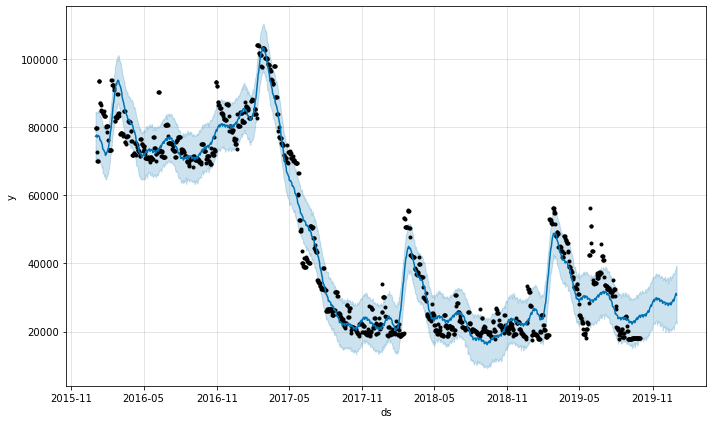

In [1827]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

Total MAE: 4888.201
Total MSE: 49985459.292
Total RMSE: 7070.040


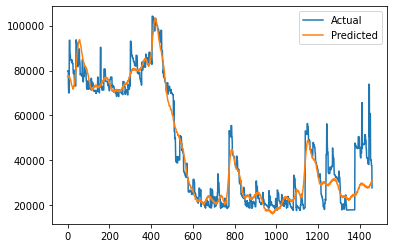

In [1829]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate MAE between expected and predicted values for december
y_true = prophet_clean_2016_2019_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Total MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Total MSE: %.3f' % test_score)
print('Total RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
"""
entrenamiento de ene-2016 a sep-2019, validacion de oct-2019 a dic-2019
Persistence Baseline			Test MAE: 2360.442
								Test MSE: 46436359.260
								Test RMSE: 6814.423

Prophet 						Train MAE: 17287.431
								Train MSE: 361591214.064
								Train RMSE: 19015.552	

entrenamiento de ene-2016 a sep-2019, validacion de ene-2016 a dic-2019	
Prophet 						Total MAE: 4888.201
								Total MSE: 49985459.292
								Total RMSE: 7070.040					

entrenamiento de ene-2016 a sep-2019, validacion de jul-2019 a sep-2019
Prophet                 		Train MAE: 4061.042
								Train MSE: 19836094.004
								Train RMSE: 4453.773 
"""

In [1830]:
prophet_clean_2016_2019_df

ds         y
0    2016-01-01  79763.22
1    2016-01-02  79763.22
2    2016-01-03  79763.22
3    2016-01-04  79763.22
4    2016-01-05  72528.99
...         ...       ...
1455 2019-12-27  40168.04
1456 2019-12-28  37792.40
1457 2019-12-29  37792.40
1458 2019-12-30  37792.40
1459 2019-12-31  27768.49

[1460 rows x 2 columns]

In [1831]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2015-01-01']

Int64Index([], dtype='int64')

In [1832]:
prophet_clean_2016_2019_df.index[prophet_clean_2016_2019_df['ds'] == '2019-09-30']

Int64Index([1367], dtype='int64')

In [1833]:
# split into train and test sets
X = prophet_clean_2016_2019_df.values
train_size = int(1368)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [1834]:
train_X, train_X.shape

(array([Timestamp('2016-01-01 00:00:00'), Timestamp('2016-01-02 00:00:00'),
        Timestamp('2016-01-03 00:00:00'), ...,
        Timestamp('2019-09-28 00:00:00'), Timestamp('2019-09-29 00:00:00'),
        Timestamp('2019-09-30 00:00:00')], dtype=object),
 (1368,))

In [1835]:
train_y, train_y.shape

(array([79763.22000000004, 79763.22000000004, 79763.22000000004, ...,
        17970.770000000055, 17970.770000000055, 17970.770000000055],
       dtype=object),
 (1368,))

In [1836]:
test_X, test_X.shape

(array([Timestamp('2019-10-01 00:00:00'), Timestamp('2019-10-02 00:00:00'),
        Timestamp('2019-10-03 00:00:00'), Timestamp('2019-10-04 00:00:00'),
        Timestamp('2019-10-05 00:00:00'), Timestamp('2019-10-06 00:00:00'),
        Timestamp('2019-10-07 00:00:00'), Timestamp('2019-10-08 00:00:00'),
        Timestamp('2019-10-09 00:00:00'), Timestamp('2019-10-10 00:00:00'),
        Timestamp('2019-10-11 00:00:00'), Timestamp('2019-10-12 00:00:00'),
        Timestamp('2019-10-13 00:00:00'), Timestamp('2019-10-14 00:00:00'),
        Timestamp('2019-10-15 00:00:00'), Timestamp('2019-10-16 00:00:00'),
        Timestamp('2019-10-17 00:00:00'), Timestamp('2019-10-18 00:00:00'),
        Timestamp('2019-10-19 00:00:00'), Timestamp('2019-10-20 00:00:00'),
        Timestamp('2019-10-21 00:00:00'), Timestamp('2019-10-22 00:00:00'),
        Timestamp('2019-10-23 00:00:00'), Timestamp('2019-10-24 00:00:00'),
        Timestamp('2019-10-25 00:00:00'), Timestamp('2019-10-26 00:00:00'),
        Time

In [1837]:
test_y, test_y.shape

(array([17970.770000000055, 17970.770000000055, 17970.770000000055,
        17970.770000000055, 17970.770000000055, 17970.770000000055,
        17970.770000000055, 17970.770000000055, 17970.770000000055,
        47738.770000000055, 46961.15000000005, 46961.15000000005,
        46961.15000000005, 46577.82000000005, 46486.41000000005,
        46486.41000000005, 45692.63000000005, 45511.080000000045,
        45661.080000000045, 45661.080000000045, 45661.080000000045,
        45577.57000000004, 45207.57000000004, 45750.77000000004,
        45450.77000000004, 50529.55000000004, 50529.55000000004,
        50529.55000000004, 50406.48000000004, 50406.48000000004,
        50406.48000000004, 45535.37000000004, 45819.36000000004,
        45819.36000000004, 45819.36000000004, 41805.02000000003,
        41381.02000000003, 41073.47000000003, 43243.04000000003,
        43243.04000000003, 43243.04000000003, 43271.65000000003,
        63271.65000000003, 65729.19000000003, 45372.36000000003,
        476

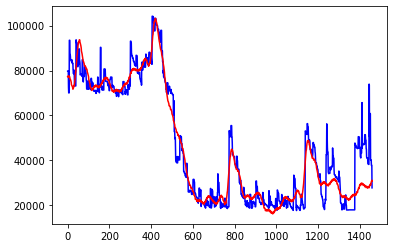

In [1840]:
# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

In [1843]:
y_pred

array([77272.46212631, 77341.24132905, 77478.24059736, ...,
       30835.20429583, 31194.20311266, 30754.37947111])

In [1844]:
y_pred.size

1460

In [1846]:
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds          yhat    yhat_lower    yhat_upper
0    2016-01-01  77272.462126  70467.257766  84464.492569
1    2016-01-02  77341.241329  69740.074835  84555.600009
2    2016-01-03  77478.240597  70471.702122  84103.093243
3    2016-01-04  77637.500034  70888.441038  84293.599032
4    2016-01-05  76973.248430  70274.333414  84018.986320
...         ...           ...           ...           ...
1455 2019-12-27  30304.363566  22366.336686  37959.671917
1456 2019-12-28  30523.402050  22652.674358  38304.371452
1457 2019-12-29  30835.204296  22550.388979  38349.884833
1458 2019-12-30  31194.203113  23112.787010  39317.853086
1459 2019-12-31  30754.379471  22373.383531  39212.052032

[1460 rows x 4 columns]


In [1848]:
forecast_unseen_df=forecast_df[1368:]

In [1849]:
forecast_unseen_df

ds         trend    yhat_lower    yhat_upper   trend_lower  \
1368 2019-10-01  31579.409155  17071.738003  31077.938936  31579.409155   
1369 2019-10-02  31595.884000  17199.159538  31375.144947  31595.884000   
1370 2019-10-03  31612.358844  17785.798684  31072.669326  31612.358844   
1371 2019-10-04  31628.833689  18076.383075  31798.064852  31628.833689   
1372 2019-10-05  31645.308533  17910.412834  31662.962481  31645.308533   
...         ...           ...           ...           ...           ...   
1455 2019-12-27  33012.720624  22366.336686  37959.671917  29104.380766   
1456 2019-12-28  33029.195469  22652.674358  38304.371452  29048.501436   
1457 2019-12-29  33045.670313  22550.388979  38349.884833  28972.897932   
1458 2019-12-30  33062.145158  23112.787010  39317.853086  28952.698895   
1459 2019-12-31  33078.620002  22373.383531  39212.052032  28936.421866   

       trend_upper  additive_terms  additive_terms_lower  \
1368  31579.409155    -7466.338708          -7466.338708   
1369  31595.884000    -7188.715676          -7188.715676   
1370  31612.358844    -7084.779711          -7084.779711   
1371  31628.833689    -6790.087478          -6790.087478   
1372  31645.308533    -6843.288471          -6843.288471   
...            ...             ...                   ...   
1455  36556.113387    -2708.357058          -2708.357058   
1456  36645.890537    -2505.793419          -2505.793419   
1457  36741.688195    -2210.466017          -2210.466017   
1458  36811.565601    -1867.942045          -1867.942045   
1459  36877.805738    -2324.240531          -2324.240531   

      additive_terms_upper      weekly  weekly_lower  weekly_upper  \
1368          -7466.338708 -449.222567   -449.222567   -449.222567   
1369          -7188.715676 -195.489858   -195.489858   -195.489858   
1370          -7084.779711 -105.008193   -105.008193   -105.008193   
1371          -6790.087478  185.087789    185.087789    185.087789   
1372          -6843.288471  134.201272    134.201272    134.201272   
...                    ...         ...           ...           ...   
1455          -2708.357058  185.087789    185.087789    185.087789   
1456          -2505.793419  134.201272    134.201272    134.201272   
1457          -2210.466017  172.253020    172.253020    172.253020   
1458          -1867.942045  258.178537    258.178537    258.178537   
1459          -2324.240531 -449.222567   -449.222567   -449.222567   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
1368 -7017.116141  -7017.116141  -7017.116141                   0.0   
1369 -6993.225818  -6993.225818  -6993.225818                   0.0   
1370 -6979.771517  -6979.771517  -6979.771517                   0.0   
1371 -6975.175268  -6975.175268  -6975.175268                   0.0   
1372 -6977.489743  -6977.489743  -6977.489743                   0.0   
...           ...           ...           ...                   ...   
1455 -2893.444848  -2893.444848  -2893.444848                   0.0   
1456 -2639.994691  -2639.994691  -2639.994691                   0.0   
1457 -2382.719038  -2382.719038  -2382.719038                   0.0   
1458 -2126.120582  -2126.120582  -2126.120582                   0.0   
1459 -1875.017964  -1875.017964  -1875.017964                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
1368                         0.0                         0.0  24113.070447  
1369                         0.0                         0.0  24407.168323  
1370                         0.0                         0.0  24527.579133  
1371                         0.0                         0.0  24838.746210  
1372                         0.0                         0.0  24802.020062  
...                          ...                         ...           ...  
1455                         0.0                         0.0  30304.363566  
1456                         0.0                         0.0  30523.402050  
1457

In [1850]:
y_unseen_pred = forecast_unseen_df['yhat'].values

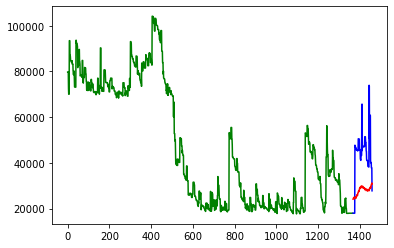

In [1851]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_unseen_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [1680]:
"""
Si sale bien la prueba final entonces tengo que identificar bien la transaccion de 200000 eur y de 170000 eur que quite
del dataset original de transaciones para que al automatizar esta prediccion temporal se me den datasets con estos datos 
quitados de forma automatica
"""

'\nSi sale bien la prueba final entonces tengo que identificar bien la transaccion de 200000 eur y de 170000 eur que quite\ndel dataset original de transaciones para que al automatizar esta prediccion temporal se me den datasets con estos datos \nquitados de forma automatica\n'

In [1201]:
"""
De acuerdo a este analisis casi seguro que lo que voy a hacer es recrear el balance solo con los datos de las transacciones 
de 2016, 2018 y 2019
"""

'\nDe acuerdo a este analisis casi seguro que lo que voy a hacer es recrear el balance solo con los datos de las transacciones \nde 2016, 2018 y 2019\n'

In [1852]:
"""
Me voy a guardar este dataframe y voy a probar prophet con el y si no saco muy buenos resultados probaré con el balance entre
2018-01-01 y 2019-12-31 en el que solo tengo una linea base y no dos.

Otra aproximación sería no incluir el año 2017 en el estudio y estimar la serie temporal a partir de los valores 2016, 2018 y 
2019.
"""

'\nMe voy a guardar este dataframe y voy a probar prophet con el y si no saco muy buenos resultados probaré con el balance entre\n2018-01-01 y 2019-12-31 en el que solo tengo una linea base y no dos.\n\nOtra aproximación sería no incluir el año 2017 en el estudio y estimar la serie temporal a partir de los valores 2016, 2018 y \n2019.\n'

In [1853]:
"""
teniendo en cuenta q para transaciones mean=-105.191420 y std=6917.657232 y q en distribucion gaussiana:
el 68.2% de las observaciones estan en mean +/- std
el 95.4% de las observaciones estan en mean +/- 2*std
el 99.8% de las observaciones estan en mean +/- 3*std
"""

'\nteniendo en cuenta q para transaciones mean=-105.191420 y std=6917.657232 y q en distribucion gaussiana:\nel 68.2% de las observaciones estan en mean +/- std\nel 95.4% de las observaciones estan en mean +/- 2*std\nel 99.8% de las observaciones estan en mean +/- 3*std\n'

In [1854]:
"""
LUEGO MIRA A VER SI PUEDES TENER UN DATASET DEL BALANCE POR SEMANAS ADEMAS DE POR DIAS
"""

'\nLUEGO MIRA A VER SI PUEDES TENER UN DATASET DEL BALANCE POR SEMANAS ADEMAS DE POR DIAS\n'

In [169]:
"""
para sacar datos por semana puedes sacar q dia de la semana es una fila concreta y a partir de ahi ir sumando dias de la semana
"""

'\npara sacar datos por semana puedes sacar q dia de la semana es una fila concreta y a partir de ahi ir sumando dias de la semana\n'